In [41]:
!pip install soundfile

In [3]:
import matplotlib.pyplot as plt

In [1]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#DataFlair - Emotions in the RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
    "07": "disgust",
    "08": "ps"
}

# Define the emotions available in all datasets
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy",
    "fear",
    "disgust",
    "ps"
    
}

In [3]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result


In [4]:
# Function to load data from multiple datasets
def load_data(data_paths, test_size=0.2):
    X, y = [], []
    for data_path in data_paths:
        for file in glob.glob(os.path.join(data_path, "*.wav")):
            # get the base name of the audio file
            basename = os.path.basename(file)
            # print the file name for debugging
            print("Processing file:", basename)
            
            # Dynamically identify the emotion label from the file name
            emotion = None
            for label in int2emotion.values():
                if label.lower() in basename.lower():
                    emotion = label
                    break
            
            # If emotion is not found, skip the file
            if emotion is None:
                print("Error extracting emotion from:", basename)
                continue
            
            # we allow only AVAILABLE_EMOTIONS we set
            if emotion not in AVAILABLE_EMOTIONS:
                continue
            
            # extract speech features
            features = extract_feature(file, mfcc=True, chroma=True, mel=True)
            # add to data
            X.append(features)
            l={'angry':1,'sad':2,'neutral':3,'happy':4,'fear':5,'disgust':6,'ps':7}
            y.append(l[emotion])
    
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [5]:
data_paths = [
    "C:\\Users\\Desktop\\Train data\\Ravdess data\\Actor_*",
    "C:\\Users\\Desktop\\Train data\\Tess data",
    "C:\\Users\\Desktop\\Train data\\wav",
    "C:\\Users\\Desktop\\Train data\\ESR_data",
    "C:\\Users\\Desktop\\Train data\\data1",

   
]

In [6]:
X_train, X_test, y_train, y_test = load_data(data_paths,test_size=0.25)

Processing file: 01_01_01_01_dogs-sitting_disgust.wav
Processing file: 01_01_01_01_dogs-sitting_fear.wav
Processing file: 01_01_01_01_dogs-sitting_neutral.wav
Processing file: 01_01_01_01_dogs-sitting_ps.wav
Processing file: 01_01_01_01_dogs-sitting_sad.wav
Processing file: 01_01_01_01_kids-talking_angry.wav
Processing file: 01_01_01_01_kids-talking_disgust.wav
Processing file: 01_01_01_01_kids-talking_fear.wav
Processing file: 01_01_01_01_kids-talking_happy.wav
Processing file: 01_01_01_01_kids-talking_neutral.wav
Processing file: 01_01_01_01_kids-talking_ps.wav
Processing file: 01_01_01_01_kids-talking_sad.wav
Processing file: 01_01_01_02_dogs-sitting_angry.wav
Processing file: 01_01_01_02_dogs-sitting_disgust.wav
Processing file: 01_01_01_02_dogs-sitting_fear.wav
Processing file: 01_01_01_02_dogs-sitting_happy.wav
Processing file: 01_01_01_02_dogs-sitting_neutral.wav
Processing file: 01_01_01_02_dogs-sitting_ps.wav
Processing file: 01_01_01_02_dogs-sitting_sad.wav
Processing file: 0

Processing file: 02_01_02_01_dogs-sitting_fear.wav
Processing file: 02_01_02_01_dogs-sitting_happy.wav
Processing file: 02_01_02_01_dogs-sitting_ps.wav
Processing file: 02_01_02_01_dogs-sitting_sad.wav
Processing file: 02_01_02_01_kids-talking_angry.wav
Processing file: 02_01_02_01_kids-talking_disgust.wav
Processing file: 02_01_02_01_kids-talking_fear.wav
Processing file: 02_01_02_01_kids-talking_happy.wav
Processing file: 02_01_02_01_kids-talking_ps.wav
Processing file: 02_01_02_01_kids-talking_sad.wav
Processing file: 02_01_02_02_dogs-sitting_angry.wav
Processing file: 02_01_02_02_dogs-sitting_disgust.wav
Processing file: 02_01_02_02_dogs-sitting_fear.wav
Processing file: 02_01_02_02_dogs-sitting_happy.wav
Processing file: 02_01_02_02_dogs-sitting_ps.wav
Processing file: 02_01_02_02_dogs-sitting_sad.wav
Processing file: 02_01_02_02_kids-talking_angry.wav
Processing file: 02_01_02_02_kids-talking_disgust.wav
Processing file: 02_01_02_02_kids-talking_fear.wav
Processing file: 02_01_02

Processing file: 03_01_01_01_kids-talking_angry.wav
Processing file: 03_01_01_01_kids-talking_disgust.wav
Processing file: 03_01_01_01_kids-talking_fear.wav
Processing file: 03_01_01_01_kids-talking_happy.wav
Processing file: 03_01_01_01_kids-talking_neutral.wav
Processing file: 03_01_01_01_kids-talking_ps.wav
Processing file: 03_01_01_01_kids-talking_sad.wav
Processing file: 03_01_01_02_dogs-sitting_angry.wav
Processing file: 03_01_01_02_dogs-sitting_disgust.wav
Processing file: 03_01_01_02_dogs-sitting_fear.wav
Processing file: 03_01_01_02_dogs-sitting_happy.wav
Processing file: 03_01_01_02_dogs-sitting_neutral.wav
Processing file: 03_01_01_02_dogs-sitting_ps.wav
Processing file: 03_01_01_02_dogs-sitting_sad.wav
Processing file: 03_01_01_02_kids-talking_angry.wav
Processing file: 03_01_01_02_kids-talking_disgust.wav
Processing file: 03_01_01_02_kids-talking_fear.wav
Processing file: 03_01_01_02_kids-talking_happy.wav
Processing file: 03_01_01_02_kids-talking_neutral.wav
Processing fi

Processing file: 04_01_02_01_kids-talking_angry.wav
Processing file: 04_01_02_01_kids-talking_disgust.wav
Processing file: 04_01_02_01_kids-talking_fear.wav
Processing file: 04_01_02_01_kids-talking_happy.wav
Processing file: 04_01_02_01_kids-talking_ps.wav
Processing file: 04_01_02_01_kids-talking_sad.wav
Processing file: 04_01_02_02_dogs-sitting_angry.wav
Processing file: 04_01_02_02_dogs-sitting_disgust.wav
Processing file: 04_01_02_02_dogs-sitting_fear.wav
Processing file: 04_01_02_02_dogs-sitting_happy.wav
Processing file: 04_01_02_02_dogs-sitting_ps.wav
Processing file: 04_01_02_02_dogs-sitting_sad.wav
Processing file: 04_01_02_02_kids-talking_angry.wav
Processing file: 04_01_02_02_kids-talking_disgust.wav
Processing file: 04_01_02_02_kids-talking_fear.wav
Processing file: 04_01_02_02_kids-talking_happy.wav
Processing file: 04_01_02_02_kids-talking_ps.wav
Processing file: 04_01_02_02_kids-talking_sad.wav
Processing file: 04_02_01_01_dogs-sitting_angry.wav
Processing file: 04_02_0

Processing file: 05_02_01_02_dogs-sitting_angry.wav
Processing file: 05_02_01_02_dogs-sitting_fear.wav
Processing file: 05_02_01_02_dogs-sitting_happy.wav
Processing file: 05_02_01_02_dogs-sitting_neutral.wav
Processing file: 05_02_01_02_dogs-sitting_sad.wav
Processing file: 05_02_01_02_kids-talking_angry.wav
Processing file: 05_02_01_02_kids-talking_fear.wav
Processing file: 05_02_01_02_kids-talking_happy.wav
Processing file: 05_02_01_02_kids-talking_neutral.wav
Processing file: 05_02_01_02_kids-talking_sad.wav
Processing file: 05_02_02_01_dogs-sitting_angry.wav
Processing file: 05_02_02_01_dogs-sitting_fear.wav
Processing file: 05_02_02_01_dogs-sitting_happy.wav
Processing file: 05_02_02_01_dogs-sitting_sad.wav
Processing file: 05_02_02_01_kids-talking_angry.wav
Processing file: 05_02_02_01_kids-talking_fear.wav
Processing file: 05_02_02_01_kids-talking_happy.wav
Processing file: 05_02_02_01_kids-talking_sad.wav
Processing file: 05_02_02_02_dogs-sitting_angry.wav
Processing file: 05_

Processing file: 06_02_02_02_kids-talking_sad.wav
Processing file: 03-01-02-01-01-01-07_calm.wav
Processing file: 03-01-02-01-01-02-07_calm.wav
Processing file: 03-01-02-01-02-01-07_calm.wav
Processing file: 03-01-02-01-02-02-07_calm.wav
Processing file: 03-01-02-02-01-01-07_calm.wav
Processing file: 03-01-02-02-01-02-07_calm.wav
Processing file: 03-01-02-02-02-01-07_calm.wav
Processing file: 03-01-02-02-02-02-07_calm.wav
Processing file: 03-02-02-01-01-01-07_calm.wav
Processing file: 03-02-02-01-01-02-07_calm.wav
Processing file: 03-02-02-01-02-01-07_calm.wav
Processing file: 03-02-02-01-02-02-07_calm.wav
Processing file: 03-02-02-02-01-01-07_calm.wav
Processing file: 03-02-02-02-01-02-07_calm.wav
Processing file: 03-02-02-02-02-01-07_calm.wav
Processing file: 03-02-02-02-02-02-07_calm.wav
Processing file: 07_01_01_01_dogs-sitting_angry.wav
Processing file: 07_01_01_01_dogs-sitting_disgust.wav
Processing file: 07_01_01_01_dogs-sitting_fear.wav
Processing file: 07_01_01_01_dogs-sitting

Processing file: 08_01_02_02_dogs-sitting_fear.wav
Processing file: 08_01_02_02_dogs-sitting_happy.wav
Processing file: 08_01_02_02_dogs-sitting_ps.wav
Processing file: 08_01_02_02_dogs-sitting_sad.wav
Processing file: 08_01_02_02_kids-talking_angry.wav
Processing file: 08_01_02_02_kids-talking_disgust.wav
Processing file: 08_01_02_02_kids-talking_fear.wav
Processing file: 08_01_02_02_kids-talking_happy.wav
Processing file: 08_01_02_02_kids-talking_ps.wav
Processing file: 08_01_02_02_kids-talking_sad.wav
Processing file: 08_02_01_01_dogs-sitting_angry.wav
Processing file: 08_02_01_01_dogs-sitting_fear.wav
Processing file: 08_02_01_01_dogs-sitting_happy.wav
Processing file: 08_02_01_01_dogs-sitting_neutral.wav
Processing file: 08_02_01_01_dogs-sitting_sad.wav
Processing file: 08_02_01_01_kids-talking_angry.wav
Processing file: 08_02_01_01_kids-talking_fear.wav
Processing file: 08_02_01_01_kids-talking_happy.wav
Processing file: 08_02_01_01_kids-talking_neutral.wav
Processing file: 08_02

Processing file: 10_01_01_01_dogs-sitting_ps.wav
Processing file: 10_01_01_01_dogs-sitting_sad.wav
Processing file: 10_01_01_01_kids-talking_angry.wav
Processing file: 10_01_01_01_kids-talking_disgust.wav
Processing file: 10_01_01_01_kids-talking_fear.wav
Processing file: 10_01_01_01_kids-talking_happy.wav
Processing file: 10_01_01_01_kids-talking_neutral.wav
Processing file: 10_01_01_01_kids-talking_ps.wav
Processing file: 10_01_01_01_kids-talking_sad.wav
Processing file: 10_01_01_02_dogs-sitting_angry.wav
Processing file: 10_01_01_02_dogs-sitting_disgust.wav
Processing file: 10_01_01_02_dogs-sitting_fear.wav
Processing file: 10_01_01_02_dogs-sitting_happy.wav
Processing file: 10_01_01_02_dogs-sitting_neutral.wav
Processing file: 10_01_01_02_dogs-sitting_ps.wav
Processing file: 10_01_01_02_dogs-sitting_sad.wav
Processing file: 10_01_01_02_kids-talking_angry.wav
Processing file: 10_01_01_02_kids-talking_disgust.wav
Processing file: 10_01_01_02_kids-talking_fear.wav
Processing file: 10_

Processing file: 11_01_02_01_dogs-sitting_happy.wav
Processing file: 11_01_02_01_dogs-sitting_ps.wav
Processing file: 11_01_02_01_dogs-sitting_sad.wav
Processing file: 11_01_02_01_kids-talking_angry.wav
Processing file: 11_01_02_01_kids-talking_disgust.wav
Processing file: 11_01_02_01_kids-talking_fear.wav
Processing file: 11_01_02_01_kids-talking_happy.wav
Processing file: 11_01_02_01_kids-talking_ps.wav
Processing file: 11_01_02_01_kids-talking_sad.wav
Processing file: 11_01_02_02_dogs-sitting_angry.wav
Processing file: 11_01_02_02_dogs-sitting_disgust.wav
Processing file: 11_01_02_02_dogs-sitting_fear.wav
Processing file: 11_01_02_02_dogs-sitting_happy.wav
Processing file: 11_01_02_02_dogs-sitting_ps.wav
Processing file: 11_01_02_02_dogs-sitting_sad.wav
Processing file: 11_01_02_02_kids-talking_angry.wav
Processing file: 11_01_02_02_kids-talking_disgust.wav
Processing file: 11_01_02_02_kids-talking_fear.wav
Processing file: 11_01_02_02_kids-talking_happy.wav
Processing file: 11_01_0

Processing file: 12_02_01_01_kids-talking_angry.wav
Processing file: 12_02_01_01_kids-talking_fear.wav
Processing file: 12_02_01_01_kids-talking_happy.wav
Processing file: 12_02_01_01_kids-talking_neutral.wav
Processing file: 12_02_01_01_kids-talking_sad.wav
Processing file: 12_02_01_02_dogs-sitting_angry.wav
Processing file: 12_02_01_02_dogs-sitting_fear.wav
Processing file: 12_02_01_02_dogs-sitting_happy.wav
Processing file: 12_02_01_02_dogs-sitting_neutral.wav
Processing file: 12_02_01_02_dogs-sitting_sad.wav
Processing file: 12_02_01_02_kids-talking_angry.wav
Processing file: 12_02_01_02_kids-talking_fear.wav
Processing file: 12_02_01_02_kids-talking_happy.wav
Processing file: 12_02_01_02_kids-talking_neutral.wav
Processing file: 12_02_01_02_kids-talking_sad.wav
Processing file: 12_02_02_01_dogs-sitting_angry.wav
Processing file: 12_02_02_01_dogs-sitting_fear.wav
Processing file: 12_02_02_01_dogs-sitting_happy.wav
Processing file: 12_02_02_01_dogs-sitting_sad.wav
Processing file: 1

Processing file: 13_02_02_02_dogs-sitting_sad.wav
Processing file: 13_02_02_02_kids-talking_angry.wav
Processing file: 13_02_02_02_kids-talking_fear.wav
Processing file: 13_02_02_02_kids-talking_happy.wav
Processing file: 13_02_02_02_kids-talking_sad.wav
Processing file: 03-02-01-01-01-01-14_neutral.wav
Processing file: 03-02-01-01-01-02-14_neutral.wav
Processing file: 03-02-01-01-02-01-14_neutral.wav
Processing file: 03-02-01-01-02-02-14_neutral.wav
Processing file: 03-02-02-01-01-01-14_calm.wav
Processing file: 03-02-02-01-01-02-14_calm.wav
Processing file: 03-02-02-01-02-01-14_calm.wav
Processing file: 03-02-02-01-02-02-14_calm.wav
Processing file: 03-02-02-02-01-01-14_calm.wav
Processing file: 03-02-02-02-01-02-14_calm.wav
Processing file: 03-02-02-02-02-01-14_calm.wav
Processing file: 03-02-02-02-02-02-14_calm.wav
Processing file: 03-02-03-01-01-01-14_happy.wav
Processing file: 03-02-03-01-01-02-14_happy.wav
Processing file: 03-02-03-01-02-01-14_happy.wav
Processing file: 03-02-03

Processing file: 03-02-01-01-02-02-16_neutral.wav
Processing file: 03-02-02-01-01-01-16_calm.wav
Processing file: 03-02-02-01-01-02-16_calm.wav
Processing file: 03-02-02-01-02-01-16_calm.wav
Processing file: 03-02-02-01-02-02-16_calm.wav
Processing file: 03-02-02-02-01-01-16_calm.wav
Processing file: 03-02-02-02-01-02-16_calm.wav
Processing file: 03-02-02-02-02-01-16_calm.wav
Processing file: 03-02-02-02-02-02-16_calm.wav
Processing file: 03-02-03-01-01-01-16_happy.wav
Processing file: 03-02-03-01-01-02-16_happy.wav
Processing file: 03-02-03-01-02-01-16_happy.wav
Processing file: 03-02-03-01-02-02-16_happy.wav
Processing file: 03-02-03-02-01-01-16_happy.wav
Processing file: 03-02-03-02-01-02-16_happy.wav
Processing file: 03-02-03-02-02-01-16_happy.wav
Processing file: 03-02-03-02-02-02-16_happy.wav
Processing file: 03-02-04-01-01-01-16_sad.wav
Processing file: 03-02-04-01-01-02-16_sad.wav
Processing file: 03-02-04-01-02-01-16_sad.wav
Processing file: 03-02-04-01-02-02-16_sad.wav
Proces

Processing file: 18_01_01_01_dogs-sitting_happy.wav
Processing file: 18_01_01_01_dogs-sitting_neutral.wav
Processing file: 18_01_01_01_dogs-sitting_ps.wav
Processing file: 18_01_01_01_dogs-sitting_sad.wav
Processing file: 18_01_01_01_kids-talking_angry.wav
Processing file: 18_01_01_01_kids-talking_disgust.wav
Processing file: 18_01_01_01_kids-talking_fear.wav
Processing file: 18_01_01_01_kids-talking_happy.wav
Processing file: 18_01_01_01_kids-talking_neutral.wav
Processing file: 18_01_01_01_kids-talking_ps.wav
Processing file: 18_01_01_01_kids-talking_sad.wav
Processing file: 18_01_01_02_dogs-sitting_angry.wav
Processing file: 18_01_01_02_dogs-sitting_disgust.wav
Processing file: 18_01_01_02_dogs-sitting_fear.wav
Processing file: 18_01_01_02_dogs-sitting_happy.wav
Processing file: 18_01_01_02_dogs-sitting_neutral.wav
Processing file: 18_01_01_02_dogs-sitting_ps.wav
Processing file: 18_01_01_02_dogs-sitting_sad.wav
Processing file: 18_01_01_02_kids-talking_angry.wav
Processing file: 18

Processing file: 19_02_01_02_dogs-sitting_happy.wav
Processing file: 19_02_01_02_dogs-sitting_neutral.wav
Processing file: 19_02_01_02_dogs-sitting_sad.wav
Processing file: 19_02_01_02_kids-talking_angry.wav
Processing file: 19_02_01_02_kids-talking_fear.wav
Processing file: 19_02_01_02_kids-talking_happy.wav
Processing file: 19_02_01_02_kids-talking_neutral.wav
Processing file: 19_02_01_02_kids-talking_sad.wav
Processing file: 19_02_02_01_dogs-sitting_angry.wav
Processing file: 19_02_02_01_dogs-sitting_fear.wav
Processing file: 19_02_02_01_dogs-sitting_happy.wav
Processing file: 19_02_02_01_dogs-sitting_sad.wav
Processing file: 19_02_02_01_kids-talking_angry.wav
Processing file: 19_02_02_01_kids-talking_fear.wav
Processing file: 19_02_02_01_kids-talking_happy.wav
Processing file: 19_02_02_01_kids-talking_sad.wav
Processing file: 19_02_02_02_dogs-sitting_angry.wav
Processing file: 19_02_02_02_dogs-sitting_fear.wav
Processing file: 19_02_02_02_dogs-sitting_happy.wav
Processing file: 19_

Processing file: 03-02-05-01-02-02-21_angry.wav
Processing file: 03-02-05-02-01-01-21_angry.wav
Processing file: 03-02-05-02-01-02-21_angry.wav
Processing file: 03-02-05-02-02-01-21_angry.wav
Processing file: 03-02-05-02-02-02-21_angry.wav
Processing file: 03-02-06-01-01-01-21_fear.wav
Processing file: 03-02-06-01-01-02-21_fear.wav
Processing file: 03-02-06-01-02-01-21_fear.wav
Processing file: 03-02-06-01-02-02-21_fear.wav
Processing file: 03-02-06-02-01-01-21_fear.wav
Processing file: 03-02-06-02-01-02-21_fear.wav
Processing file: 03-02-06-02-02-01-21_fear.wav
Processing file: 03-02-06-02-02-02-21_fear.wav
Processing file: 21_01_01_01_dogs-sitting_angry.wav
Processing file: 21_01_01_01_dogs-sitting_disgust.wav
Processing file: 21_01_01_01_dogs-sitting_fear.wav
Processing file: 21_01_01_01_dogs-sitting_happy.wav
Processing file: 21_01_01_01_dogs-sitting_neutral.wav
Processing file: 21_01_01_01_dogs-sitting_ps.wav
Processing file: 21_01_01_01_dogs-sitting_sad.wav
Processing file: 21_01

Processing file: 22_01_02_02_kids-talking_fear.wav
Processing file: 22_01_02_02_kids-talking_happy.wav
Processing file: 22_01_02_02_kids-talking_ps.wav
Processing file: 22_01_02_02_kids-talking_sad.wav
Processing file: 03-01-02-01-01-01-23_calm.wav
Processing file: 03-01-02-01-01-02-23_calm.wav
Processing file: 03-01-02-01-02-01-23_calm.wav
Processing file: 03-01-02-01-02-02-23_calm.wav
Processing file: 03-01-02-02-01-01-23_calm.wav
Processing file: 03-01-02-02-01-02-23_calm.wav
Processing file: 03-01-02-02-02-01-23_calm.wav
Processing file: 03-01-02-02-02-02-23_calm.wav
Processing file: 03-02-01-01-01-01-23_neutral.wav
Processing file: 03-02-01-01-01-02-23_neutral.wav
Processing file: 03-02-01-01-02-01-23_neutral.wav
Processing file: 03-02-01-01-02-02-23_neutral.wav
Processing file: 03-02-02-01-01-01-23_calm.wav
Processing file: 03-02-02-01-01-02-23_calm.wav
Processing file: 03-02-02-01-02-01-23_calm.wav
Processing file: 03-02-02-01-02-02-23_calm.wav
Processing file: 03-02-02-02-01-01

Processing file: 24_01_01_01_kids-talking_disgust.wav
Processing file: 24_01_01_01_kids-talking_fear.wav
Processing file: 24_01_01_01_kids-talking_happy.wav
Processing file: 24_01_01_01_kids-talking_neutral.wav
Processing file: 24_01_01_01_kids-talking_ps.wav
Processing file: 24_01_01_01_kids-talking_sad.wav
Processing file: 24_01_01_02_dogs-sitting_angry.wav
Processing file: 24_01_01_02_dogs-sitting_disgust.wav
Processing file: 24_01_01_02_dogs-sitting_fear.wav
Processing file: 24_01_01_02_dogs-sitting_happy.wav
Processing file: 24_01_01_02_dogs-sitting_neutral.wav
Processing file: 24_01_01_02_dogs-sitting_ps.wav
Processing file: 24_01_01_02_dogs-sitting_sad.wav
Processing file: 24_01_01_02_kids-talking_angry.wav
Processing file: 24_01_01_02_kids-talking_disgust.wav
Processing file: 24_01_01_02_kids-talking_fear.wav
Processing file: 24_01_01_02_kids-talking_happy.wav
Processing file: 24_01_01_02_kids-talking_neutral.wav
Processing file: 24_01_01_02_kids-talking_ps.wav
Processing file:

Processing file: 25_01_01_01_half_happy.wav
Processing file: 25_01_01_01_half_neutral.wav
Processing file: 25_01_01_01_half_ps.wav
Processing file: 25_01_01_01_half_sad.wav
Processing file: 25_01_01_01_hall_angry.wav
Processing file: 25_01_01_01_hall_disgust.wav
Processing file: 25_01_01_01_hall_fear.wav
Processing file: 25_01_01_01_hall_happy.wav
Processing file: 25_01_01_01_hall_neutral.wav
Processing file: 25_01_01_01_hall_ps.wav
Processing file: 25_01_01_01_hall_sad.wav
Processing file: 25_01_01_01_hash_angry.wav
Processing file: 25_01_01_01_hash_disgust.wav
Processing file: 25_01_01_01_hash_fear.wav
Processing file: 25_01_01_01_hash_happy.wav
Processing file: 25_01_01_01_hash_neutral.wav
Processing file: 25_01_01_01_hash_ps.wav
Processing file: 25_01_01_01_hash_sad.wav
Processing file: 25_01_01_01_hate_angry.wav
Processing file: 25_01_01_01_hate_disgust.wav
Processing file: 25_01_01_01_hate_fear.wav
Processing file: 25_01_01_01_hate_happy.wav
Processing file: 25_01_01_01_hate_neut

Processing file: 25_01_01_01_laud_neutral.wav
Processing file: 25_01_01_01_laud_ps.wav
Processing file: 25_01_01_01_laud_sad.wav
Processing file: 25_01_01_01_lean_angry.wav
Processing file: 25_01_01_01_lean_disgust.wav
Processing file: 25_01_01_01_lean_fear.wav
Processing file: 25_01_01_01_lean_happy.wav
Processing file: 25_01_01_01_lean_neutral.wav
Processing file: 25_01_01_01_lean_ps.wav
Processing file: 25_01_01_01_lean_sad.wav
Processing file: 25_01_01_01_learn_angry.wav
Processing file: 25_01_01_01_learn_disgust.wav
Processing file: 25_01_01_01_learn_fear.wav
Processing file: 25_01_01_01_learn_happy.wav
Processing file: 25_01_01_01_learn_neutral.wav
Processing file: 25_01_01_01_learn_ps.wav
Processing file: 25_01_01_01_learn_sad.wav
Processing file: 25_01_01_01_lease_angry.wav
Processing file: 25_01_01_01_lease_disgust.wav
Processing file: 25_01_01_01_lease_fear.wav
Processing file: 25_01_01_01_lease_happy.wav
Processing file: 25_01_01_01_lease_neutral.wav
Processing file: 25_01_0

Processing file: 25_01_01_01_name_happy.wav
Processing file: 25_01_01_01_name_neutral.wav
Processing file: 25_01_01_01_name_ps.wav
Processing file: 25_01_01_01_name_sad.wav
Processing file: 25_01_01_01_near_angry.wav
Processing file: 25_01_01_01_near_disgust.wav
Processing file: 25_01_01_01_near_fear.wav
Processing file: 25_01_01_01_near_happy.wav
Processing file: 25_01_01_01_near_neutral.wav
Processing file: 25_01_01_01_near_ps.wav
Processing file: 25_01_01_01_near_sad.wav
Processing file: 25_01_01_01_neat_angry.wav
Processing file: 25_01_01_01_neat_disgust.wav
Processing file: 25_01_01_01_neat_fear.wav
Processing file: 25_01_01_01_neat_happy.wav
Processing file: 25_01_01_01_neat_neutral.wav
Processing file: 25_01_01_01_neat_ps.wav
Processing file: 25_01_01_01_neat_sad.wav
Processing file: 25_01_01_01_nice_angry.wav
Processing file: 25_01_01_01_nice_disgust.wav
Processing file: 25_01_01_01_nice_fear.wav
Processing file: 25_01_01_01_nice_happy.wav
Processing file: 25_01_01_01_nice_neut

Processing file: 25_01_01_01_ripe_happy.wav
Processing file: 25_01_01_01_ripe_neutral.wav
Processing file: 25_01_01_01_ripe_ps.wav
Processing file: 25_01_01_01_ripe_sad.wav
Processing file: 25_01_01_01_road_angry.wav
Processing file: 25_01_01_01_road_disgust.wav
Processing file: 25_01_01_01_road_fear.wav
Processing file: 25_01_01_01_road_happy.wav
Processing file: 25_01_01_01_road_neutral.wav
Processing file: 25_01_01_01_road_ps.wav
Processing file: 25_01_01_01_road_sad.wav
Processing file: 25_01_01_01_room_angry.wav
Processing file: 25_01_01_01_room_disgust.wav
Processing file: 25_01_01_01_room_fear.wav
Processing file: 25_01_01_01_room_happy.wav
Processing file: 25_01_01_01_room_neutral.wav
Processing file: 25_01_01_01_room_ps.wav
Processing file: 25_01_01_01_room_sad.wav
Processing file: 25_01_01_01_rose_angry.wav
Processing file: 25_01_01_01_rose_disgust.wav
Processing file: 25_01_01_01_rose_fear.wav
Processing file: 25_01_01_01_rose_happy.wav
Processing file: 25_01_01_01_rose_neut

Processing file: 25_01_01_01_talk_angry.wav
Processing file: 25_01_01_01_talk_disgust.wav
Processing file: 25_01_01_01_talk_fear.wav
Processing file: 25_01_01_01_talk_happy.wav
Processing file: 25_01_01_01_talk_neutral.wav
Processing file: 25_01_01_01_talk_ps.wav
Processing file: 25_01_01_01_talk_sad.wav
Processing file: 25_01_01_01_tape_angry.wav
Processing file: 25_01_01_01_tape_disgust.wav
Processing file: 25_01_01_01_tape_fear.wav
Processing file: 25_01_01_01_tape_happy.wav
Processing file: 25_01_01_01_tape_neutral.wav
Processing file: 25_01_01_01_tape_ps.wav
Processing file: 25_01_01_01_tape_sad.wav
Processing file: 25_01_01_01_team_angry.wav
Processing file: 25_01_01_01_team_disgust.wav
Processing file: 25_01_01_01_team_fear.wav
Processing file: 25_01_01_01_team_happy.wav
Processing file: 25_01_01_01_team_neutral.wav
Processing file: 25_01_01_01_team_ps.wav
Processing file: 25_01_01_01_team_sad.wav
Processing file: 25_01_01_01_tell_angry.wav
Processing file: 25_01_01_01_tell_disg

Processing file: 25_01_01_01_white_angry.wav
Processing file: 25_01_01_01_white_disgust.wav
Processing file: 25_01_01_01_white_fear.wav
Processing file: 25_01_01_01_white_happy.wav
Processing file: 25_01_01_01_white_neutral.wav
Processing file: 25_01_01_01_white_ps.wav
Processing file: 25_01_01_01_white_sad.wav
Processing file: 25_01_01_01_wife_angry.wav
Processing file: 25_01_01_01_wife_disgust.wav
Processing file: 25_01_01_01_wife_fear.wav
Processing file: 25_01_01_01_wife_happy.wav
Processing file: 25_01_01_01_wife_neutral.wav
Processing file: 25_01_01_01_wife_ps.wav
Processing file: 25_01_01_01_wife_sad.wav
Processing file: 25_01_01_01_wire_angry.wav
Processing file: 25_01_01_01_wire_disgust.wav
Processing file: 25_01_01_01_wire_fear.wav
Processing file: 25_01_01_01_wire_neutral.wav
Processing file: 25_01_01_01_wire_ps.wav
Processing file: 25_01_01_01_wire_sad.wav
Processing file: 25_01_01_01_witch_angry.wav
Processing file: 25_01_01_01_witch_disgust.wav
Processing file: 25_01_01_0

Processing file: 26_01_01_01_cheek_fear.wav
Processing file: 26_01_01_01_cheek_happy.wav
Processing file: 26_01_01_01_cheek_neutral.wav
Processing file: 26_01_01_01_cheek_ps.wav
Processing file: 26_01_01_01_cheek_sad.wav
Processing file: 26_01_01_01_chief_angry.wav
Processing file: 26_01_01_01_chief_disgust.wav
Processing file: 26_01_01_01_chief_fear.wav
Processing file: 26_01_01_01_chief_happy.wav
Processing file: 26_01_01_01_chief_neutral.wav
Processing file: 26_01_01_01_chief_ps.wav
Processing file: 26_01_01_01_chief_sad.wav
Processing file: 26_01_01_01_choice_angry.wav
Processing file: 26_01_01_01_choice_disgust.wav
Processing file: 26_01_01_01_choice_fear.wav
Processing file: 26_01_01_01_choice_happy.wav
Processing file: 26_01_01_01_choice_neutral.wav
Processing file: 26_01_01_01_choice_ps.wav
Processing file: 26_01_01_01_choice_sad.wav
Processing file: 26_01_01_01_cool_angry.wav
Processing file: 26_01_01_01_cool_disgust.wav
Processing file: 26_01_01_01_cool_fear.wav
Processing fi

Processing file: 26_01_01_01_goal_fear.wav
Processing file: 26_01_01_01_goal_happy.wav
Processing file: 26_01_01_01_goal_neutral.wav
Processing file: 26_01_01_01_goal_ps.wav
Processing file: 26_01_01_01_goal_sad.wav
Processing file: 26_01_01_01_good_angry.wav
Processing file: 26_01_01_01_good_disgust.wav
Processing file: 26_01_01_01_good_fear.wav
Processing file: 26_01_01_01_good_happy.wav
Processing file: 26_01_01_01_good_neutral.wav
Processing file: 26_01_01_01_good_ps.wav
Processing file: 26_01_01_01_good_sad.wav
Processing file: 26_01_01_01_goose_angry.wav
Processing file: 26_01_01_01_goose_disgust.wav
Processing file: 26_01_01_01_goose_fear.wav
Processing file: 26_01_01_01_goose_happy.wav
Processing file: 26_01_01_01_goose_neutral.wav
Processing file: 26_01_01_01_goose_ps.wav
Processing file: 26_01_01_01_goose_sad.wav
Processing file: 26_01_01_01_gun_angry.wav
Processing file: 26_01_01_01_gun_disgust.wav
Processing file: 26_01_01_01_gun_fear.wav
Processing file: 26_01_01_01_gun_ha

Processing file: 26_01_01_01_knock_fear.wav
Processing file: 26_01_01_01_knock_happy.wav
Processing file: 26_01_01_01_knock_neutral.wav
Processing file: 26_01_01_01_knock_ps.wav
Processing file: 26_01_01_01_knock_sad.wav
Processing file: 26_01_01_01_late_angry.wav
Processing file: 26_01_01_01_late_disgust.wav
Processing file: 26_01_01_01_late_fear.wav
Processing file: 26_01_01_01_late_happy.wav
Processing file: 26_01_01_01_late_neutral.wav
Processing file: 26_01_01_01_late_ps.wav
Processing file: 26_01_01_01_late_sad.wav
Processing file: 26_01_01_01_laud_angry.wav
Processing file: 26_01_01_01_laud_disgust.wav
Processing file: 26_01_01_01_laud_fear.wav
Processing file: 26_01_01_01_laud_happy.wav
Processing file: 26_01_01_01_laud_neutral.wav
Processing file: 26_01_01_01_laud_ps.wav
Processing file: 26_01_01_01_laud_sad.wav
Processing file: 26_01_01_01_lean_angry.wav
Processing file: 26_01_01_01_lean_disgust.wav
Processing file: 26_01_01_01_lean_fear.wav
Processing file: 26_01_01_01_lean_

Processing file: 26_01_01_01_mop_neutral.wav
Processing file: 26_01_01_01_mop_ps.wav
Processing file: 26_01_01_01_mop_sad.wav
Processing file: 26_01_01_01_mouse_angry.wav
Processing file: 26_01_01_01_mouse_fear.wav
Processing file: 26_01_01_01_mouse_happy.wav
Processing file: 26_01_01_01_mouse_neutral.wav
Processing file: 26_01_01_01_mouse_ps.wav
Processing file: 26_01_01_01_mouse_sad.wav
Processing file: 26_01_01_01_nag_angry.wav
Processing file: 26_01_01_01_nag_fear.wav
Processing file: 26_01_01_01_nag_happy.wav
Processing file: 26_01_01_01_nag_neutral.wav
Processing file: 26_01_01_01_nag_ps.wav
Processing file: 26_01_01_01_nag_sad.wav
Processing file: 26_01_01_01_name_angry.wav
Processing file: 26_01_01_01_name_fear.wav
Processing file: 26_01_01_01_name_happy.wav
Processing file: 26_01_01_01_name_neutral.wav
Processing file: 26_01_01_01_name_ps.wav
Processing file: 26_01_01_01_name_sad.wav
Processing file: 26_01_01_01_near_angry.wav
Processing file: 26_01_01_01_near_fear.wav
Process

Processing file: 26_01_01_01_read_neutral.wav
Processing file: 26_01_01_01_read_ps.wav
Processing file: 26_01_01_01_read_sad.wav
Processing file: 26_01_01_01_red_angry.wav
Processing file: 26_01_01_01_red_disgust.wav
Processing file: 26_01_01_01_red_fear.wav
Processing file: 26_01_01_01_red_happy.wav
Processing file: 26_01_01_01_red_neutral.wav
Processing file: 26_01_01_01_red_ps.wav
Processing file: 26_01_01_01_red_sad.wav
Processing file: 26_01_01_01_ring_angry.wav
Processing file: 26_01_01_01_ring_disgust.wav
Processing file: 26_01_01_01_ring_fear.wav
Processing file: 26_01_01_01_ring_happy.wav
Processing file: 26_01_01_01_ring_neutral.wav
Processing file: 26_01_01_01_ring_ps.wav
Processing file: 26_01_01_01_ring_sad.wav
Processing file: 26_01_01_01_ripe_angry.wav
Processing file: 26_01_01_01_ripe_disgust.wav
Processing file: 26_01_01_01_ripe_fear.wav
Processing file: 26_01_01_01_ripe_happy.wav
Processing file: 26_01_01_01_ripe_neutral.wav
Processing file: 26_01_01_01_ripe_ps.wav
Pr

Processing file: 26_01_01_01_such_fear.wav
Processing file: 26_01_01_01_such_happy.wav
Processing file: 26_01_01_01_such_neutral.wav
Processing file: 26_01_01_01_such_ps.wav
Processing file: 26_01_01_01_such_sad.wav
Processing file: 26_01_01_01_sure_angry.wav
Processing file: 26_01_01_01_sure_disgust.wav
Processing file: 26_01_01_01_sure_fear.wav
Processing file: 26_01_01_01_sure_happy.wav
Processing file: 26_01_01_01_sure_neutral.wav
Processing file: 26_01_01_01_sure_ps.wav
Processing file: 26_01_01_01_sure_sad.wav
Processing file: 26_01_01_01_take_angry.wav
Processing file: 26_01_01_01_take_disgust.wav
Processing file: 26_01_01_01_take_fear.wav
Processing file: 26_01_01_01_take_happy.wav
Processing file: 26_01_01_01_take_neutral.wav
Processing file: 26_01_01_01_take_ps.wav
Processing file: 26_01_01_01_take_sad.wav
Processing file: 26_01_01_01_talk_angry.wav
Processing file: 26_01_01_01_talk_disgust.wav
Processing file: 26_01_01_01_talk_fear.wav
Processing file: 26_01_01_01_talk_happy

Processing file: 26_01_01_01_which_happy.wav
Processing file: 26_01_01_01_which_neutral.wav
Processing file: 26_01_01_01_which_ps.wav
Processing file: 26_01_01_01_which_sad.wav
Processing file: 26_01_01_01_whip_angry.wav
Processing file: 26_01_01_01_whip_disgust.wav
Processing file: 26_01_01_01_whip_fear.wav
Processing file: 26_01_01_01_whip_happy.wav
Processing file: 26_01_01_01_whip_neutral.wav
Processing file: 26_01_01_01_whip_ps.wav
Processing file: 26_01_01_01_whip_sad.wav
Processing file: 26_01_01_01_white_angry.wav
Processing file: 26_01_01_01_white_disgust.wav
Processing file: 26_01_01_01_white_fear.wav
Processing file: 26_01_01_01_white_happy.wav
Processing file: 26_01_01_01_white_neutral.wav
Processing file: 26_01_01_01_white_ps.wav
Processing file: 26_01_01_01_white_sad.wav
Processing file: 26_01_01_01_wife_angry.wav
Processing file: 26_01_01_01_wife_disgust.wav
Processing file: 26_01_01_01_wife_fear.wav
Processing file: 26_01_01_01_wife_happy.wav
Processing file: 26_01_01_0

Processing file: OAF_cheek_fear.wav
Processing file: OAF_cheek_happy.wav
Processing file: OAF_cheek_neutral.wav
Processing file: OAF_cheek_ps.wav
Processing file: OAF_cheek_sad.wav
Processing file: OAF_chief_angry.wav
Processing file: OAF_chief_disgust.wav
Processing file: OAF_chief_fear.wav
Processing file: OAF_chief_happy.wav
Processing file: OAF_chief_neutral.wav
Processing file: OAF_chief_ps.wav
Processing file: OAF_chief_sad.wav
Processing file: OAF_choice_angry.wav
Processing file: OAF_choice_disgust.wav
Processing file: OAF_choice_fear.wav
Processing file: OAF_choice_happy.wav
Processing file: OAF_choice_neutral.wav
Processing file: OAF_choice_ps.wav
Processing file: OAF_choice_sad.wav
Processing file: OAF_cool_angry.wav
Processing file: OAF_cool_disgust.wav
Processing file: OAF_cool_fear.wav
Processing file: OAF_cool_happy.wav
Processing file: OAF_cool_neutral.wav
Processing file: OAF_cool_ps.wav
Processing file: OAF_cool_sad.wav
Processing file: OAF_dab_angry.wav
Processing fi

Processing file: OAF_hall_fear.wav
Processing file: OAF_hall_happy.wav
Processing file: OAF_hall_neutral.wav
Processing file: OAF_hall_ps.wav
Processing file: OAF_hall_sad.wav
Processing file: OAF_hash_angry.wav
Processing file: OAF_hash_disgust.wav
Processing file: OAF_hash_fear.wav
Processing file: OAF_hash_happy.wav
Processing file: OAF_hash_neutral.wav
Processing file: OAF_hash_ps.wav
Processing file: OAF_hash_sad.wav
Processing file: OAF_hate_angry.wav
Processing file: OAF_hate_disgust.wav
Processing file: OAF_hate_fear.wav
Processing file: OAF_hate_happy.wav
Processing file: OAF_hate_neutral.wav
Processing file: OAF_hate_ps.wav
Processing file: OAF_hate_sad.wav
Processing file: OAF_have_angry.wav
Processing file: OAF_have_disgust.wav
Processing file: OAF_have_fear.wav
Processing file: OAF_have_happy.wav
Processing file: OAF_have_neutral.wav
Processing file: OAF_have_ps.wav
Processing file: OAF_have_sad.wav
Processing file: OAF_haze_angry.wav
Processing file: OAF_haze_disgust.wav


Processing file: OAF_loaf_angry.wav
Processing file: OAF_loaf_disgust.wav
Processing file: OAF_loaf_fear.wav
Processing file: OAF_loaf_happy.wav
Processing file: OAF_loaf_neutral.wav
Processing file: OAF_loaf_ps.wav
Processing file: OAF_loaf_sad.wav
Processing file: OAF_long_angry.wav
Processing file: OAF_long_disgust.wav
Processing file: OAF_long_fear.wav
Processing file: OAF_long_happy.wav
Processing file: OAF_long_neutral.wav
Processing file: OAF_long_ps.wav
Processing file: OAF_long_sad.wav
Processing file: OAF_lore_angry.wav
Processing file: OAF_lore_disgust.wav
Processing file: OAF_lore_fear.wav
Processing file: OAF_lore_happy.wav
Processing file: OAF_lore_neutral.wav
Processing file: OAF_lore_ps.wav
Processing file: OAF_lore_sad.wav
Processing file: OAF_lose_angry.wav
Processing file: OAF_lose_disgust.wav
Processing file: OAF_lose_fear.wav
Processing file: OAF_lose_happy.wav
Processing file: OAF_lose_neutral.wav
Processing file: OAF_lose_ps.wav
Processing file: OAF_lose_sad.wav


Processing file: OAF_phone_disgust.wav
Processing file: OAF_phone_fear.wav
Processing file: OAF_phone_happy.wav
Processing file: OAF_phone_neutral.wav
Processing file: OAF_phone_ps.wav
Processing file: OAF_phone_sad.wav
Processing file: OAF_pick_angry.wav
Processing file: OAF_pick_disgust.wav
Processing file: OAF_pick_fear.wav
Processing file: OAF_pick_happy.wav
Processing file: OAF_pick_neutral.wav
Processing file: OAF_pick_ps.wav
Processing file: OAF_pick_sad.wav
Processing file: OAF_pike_angry.wav
Processing file: OAF_pike_disgust.wav
Processing file: OAF_pike_fear.wav
Processing file: OAF_pike_happy.wav
Processing file: OAF_pike_neutral.wav
Processing file: OAF_pike_ps.wav
Processing file: OAF_pike_sad.wav
Processing file: OAF_pole_angry.wav
Processing file: OAF_pole_disgust.wav
Processing file: OAF_pole_fear.wav
Processing file: OAF_pole_happy.wav
Processing file: OAF_pole_neutral.wav
Processing file: OAF_pole_ps.wav
Processing file: OAF_pole_sad.wav
Processing file: OAF_pool_angr

Processing file: OAF_should_ps.wav
Processing file: OAF_should_sad.wav
Processing file: OAF_shout_angry.wav
Processing file: OAF_shout_disgust.wav
Processing file: OAF_shout_fear.wav
Processing file: OAF_shout_happy.wav
Processing file: OAF_shout_neutral.wav
Processing file: OAF_shout_ps.wav
Processing file: OAF_shout_sad.wav
Processing file: OAF_size_angry.wav
Processing file: OAF_size_disgust.wav
Processing file: OAF_size_fear.wav
Processing file: OAF_size_happy.wav
Processing file: OAF_size_neutral.wav
Processing file: OAF_size_ps.wav
Processing file: OAF_size_sad.wav
Processing file: OAF_soap_angry.wav
Processing file: OAF_soap_disgust.wav
Processing file: OAF_soap_fear.wav
Processing file: OAF_soap_happy.wav
Processing file: OAF_soap_neutral.wav
Processing file: OAF_soap_ps.wav
Processing file: OAF_soap_sad.wav
Processing file: OAF_soup_angry.wav
Processing file: OAF_soup_disgust.wav
Processing file: OAF_soup_fear.wav
Processing file: OAF_soup_happy.wav
Processing file: OAF_soup_n

Processing file: OAF_week_neutral.wav
Processing file: OAF_week_ps.wav
Processing file: OAF_week_sad.wav
Processing file: OAF_wheat_angry.wav
Processing file: OAF_wheat_disgust.wav
Processing file: OAF_wheat_fear.wav
Processing file: OAF_wheat_happy.wav
Processing file: OAF_wheat_neutral.wav
Processing file: OAF_wheat_ps.wav
Processing file: OAF_wheat_sad.wav
Processing file: OAF_when_angry.wav
Processing file: OAF_when_disgust.wav
Processing file: OAF_when_fear.wav
Processing file: OAF_when_happy.wav
Processing file: OAF_when_neutral.wav
Processing file: OAF_when_ps.wav
Processing file: OAF_when_sad.wav
Processing file: OAF_which_angry.wav
Processing file: OAF_which_disgust.wav
Processing file: OAF_which_fear.wav
Processing file: OAF_which_happy.wav
Processing file: OAF_which_neutral.wav
Processing file: OAF_which_ps.wav
Processing file: OAF_which_sad.wav
Processing file: OAF_whip_angry.wav
Processing file: OAF_whip_disgust.wav
Processing file: OAF_whip_fear.wav
Processing file: OAF_w

Processing file: YAF_check_happy.wav
Processing file: YAF_check_neutral.wav
Processing file: YAF_check_ps.wav
Processing file: YAF_check_sad.wav
Processing file: YAF_cheek_angry.wav
Processing file: YAF_cheek_disgust.wav
Processing file: YAF_cheek_fear.wav
Processing file: YAF_cheek_happy.wav
Processing file: YAF_cheek_neutral.wav
Processing file: YAF_cheek_ps.wav
Processing file: YAF_cheek_sad.wav
Processing file: YAF_chief_angry.wav
Processing file: YAF_chief_disgust.wav
Processing file: YAF_chief_fear.wav
Processing file: YAF_chief_happy.wav
Processing file: YAF_chief_neutral.wav
Processing file: YAF_chief_ps.wav
Processing file: YAF_chief_sad.wav
Processing file: YAF_choice_angry.wav
Processing file: YAF_choice_disgust.wav
Processing file: YAF_choice_fear.wav
Processing file: YAF_choice_happy.wav
Processing file: YAF_choice_neutral.wav
Processing file: YAF_choice_ps.wav
Processing file: YAF_choice_sad.wav
Processing file: YAF_cool_angry.wav
Processing file: YAF_cool_disgust.wav
Pro

Processing file: YAF_gun_sad.wav
Processing file: YAF_half_angry.wav
Processing file: YAF_half_disgust.wav
Processing file: YAF_half_fear.wav
Processing file: YAF_half_happy.wav
Processing file: YAF_half_neutral.wav
Processing file: YAF_half_ps.wav
Processing file: YAF_half_sad.wav
Processing file: YAF_hall_angry.wav
Processing file: YAF_hall_disgust.wav
Processing file: YAF_hall_fear.wav
Processing file: YAF_hall_happy.wav
Processing file: YAF_hall_neutral.wav
Processing file: YAF_hall_ps.wav
Processing file: YAF_hall_sad.wav
Processing file: YAF_hash_angry.wav
Processing file: YAF_hash_disgust.wav
Processing file: YAF_hash_fear.wav
Processing file: YAF_hash_happy.wav
Processing file: YAF_hash_neutral.wav
Processing file: YAF_hash_ps.wav
Processing file: YAF_hash_sad.wav
Processing file: YAF_hate_angry.wav
Processing file: YAF_hate_disgust.wav
Processing file: YAF_hate_fear.wav
Processing file: YAF_hate_happy.wav
Processing file: YAF_hate_neutral.wav
Processing file: YAF_hate_ps.wav
P

Processing file: YAF_limb_angry.wav
Processing file: YAF_limb_disgust.wav
Processing file: YAF_limb_fear.wav
Processing file: YAF_limb_happy.wav
Processing file: YAF_limb_neutral.wav
Processing file: YAF_limb_ps.wav
Processing file: YAF_limb_sad.wav
Processing file: YAF_live_angry.wav
Processing file: YAF_live_disgust.wav
Processing file: YAF_live_fear.wav
Processing file: YAF_live_happy.wav
Processing file: YAF_live_neutral.wav
Processing file: YAF_live_ps.wav
Processing file: YAF_live_sad.wav
Processing file: YAF_loaf_angry.wav
Processing file: YAF_loaf_disgust.wav
Processing file: YAF_loaf_fear.wav
Processing file: YAF_loaf_happy.wav
Processing file: YAF_loaf_neutral.wav
Processing file: YAF_loaf_ps.wav
Processing file: YAF_loaf_sad.wav
Processing file: YAF_long_angry.wav
Processing file: YAF_long_disgust.wav
Processing file: YAF_long_fear.wav
Processing file: YAF_long_happy.wav
Processing file: YAF_long_neutral.wav
Processing file: YAF_long_ps.wav
Processing file: YAF_long_sad.wav


Processing file: YAF_perch_angry.wav
Processing file: YAF_perch_disgust.wav
Processing file: YAF_perch_fear.wav
Processing file: YAF_perch_happy.wav
Processing file: YAF_perch_neutral.wav
Processing file: YAF_perch_ps.wav
Processing file: YAF_perch_sad.wav
Processing file: YAF_phone_angry.wav
Processing file: YAF_phone_disgust.wav
Processing file: YAF_phone_fear.wav
Processing file: YAF_phone_happy.wav
Processing file: YAF_phone_neutral.wav
Processing file: YAF_phone_ps.wav
Processing file: YAF_phone_sad.wav
Processing file: YAF_pick_angry.wav
Processing file: YAF_pick_disgust.wav
Processing file: YAF_pick_fear.wav
Processing file: YAF_pick_happy.wav
Processing file: YAF_pick_neutral.wav
Processing file: YAF_pick_ps.wav
Processing file: YAF_pick_sad.wav
Processing file: YAF_pike_angry.wav
Processing file: YAF_pike_disgust.wav
Processing file: YAF_pike_fear.wav
Processing file: YAF_pike_happy.wav
Processing file: YAF_pike_neutral.wav
Processing file: YAF_pike_ps.wav
Processing file: YAF

Processing file: YAF_shirt_ps.wav
Processing file: YAF_shirt_sad.wav
Processing file: YAF_should_angry.wav
Processing file: YAF_should_disgust.wav
Processing file: YAF_should_fear.wav
Processing file: YAF_should_happy.wav
Processing file: YAF_should_neutral.wav
Processing file: YAF_should_ps.wav
Processing file: YAF_should_sad.wav
Processing file: YAF_shout_angry.wav
Processing file: YAF_shout_disgust.wav
Processing file: YAF_shout_fear.wav
Processing file: YAF_shout_happy.wav
Processing file: YAF_shout_neutral.wav
Processing file: YAF_shout_ps.wav
Processing file: YAF_shout_sad.wav
Processing file: YAF_size_angry.wav
Processing file: YAF_size_disgust.wav
Processing file: YAF_size_fear.wav
Processing file: YAF_size_happy.wav
Processing file: YAF_size_neutral.wav
Processing file: YAF_size_ps.wav
Processing file: YAF_size_sad.wav
Processing file: YAF_soap_angry.wav
Processing file: YAF_soap_disgust.wav
Processing file: YAF_soap_fear.wav
Processing file: YAF_soap_happy.wav
Processing file

Processing file: YAF_week_fear.wav
Processing file: YAF_week_happy.wav
Processing file: YAF_week_neutral.wav
Processing file: YAF_week_ps.wav
Processing file: YAF_week_sad.wav
Processing file: YAF_wheat_angry.wav
Processing file: YAF_wheat_disgust.wav
Processing file: YAF_wheat_fear.wav
Processing file: YAF_wheat_happy.wav
Processing file: YAF_wheat_neutral.wav
Processing file: YAF_wheat_ps.wav
Processing file: YAF_wheat_sad.wav
Processing file: YAF_when_angry.wav
Processing file: YAF_when_disgust.wav
Processing file: YAF_when_fear.wav
Processing file: YAF_when_happy.wav
Processing file: YAF_when_neutral.wav
Processing file: YAF_when_ps.wav
Processing file: YAF_when_sad.wav
Processing file: YAF_which_angry.wav
Processing file: YAF_which_disgust.wav
Processing file: YAF_which_fear.wav
Processing file: YAF_which_happy.wav
Processing file: YAF_which_neutral.wav
Processing file: YAF_which_ps.wav
Processing file: YAF_which_sad.wav
Processing file: YAF_whip_angry.wav
Processing file: YAF_whi

Processing file: a14b09_angry.wav
Processing file: a14b09_disgust.wav
Processing file: a15a01_angry.wav
Processing file: a15a01_bore.wav
Error extracting emotion from: a15a01_bore.wav
Processing file: a15a01_disgust.wav
Processing file: a15a02_bore.wav
Error extracting emotion from: a15a02_bore.wav
Processing file: a15a02_disgust.wav
Processing file: a15a02_neutral.wav
Processing file: a15a02_sad.wav
Processing file: a15a04_angry.wav
Processing file: a15a05_angry.wav
Processing file: a15a05_neutral.wav
Processing file: a15a07_happy.wav
Processing file: a15b01_neutral.wav
Processing file: a15b02_angry.wav
Processing file: a15b02_fear.wav
Processing file: a15b03_angry.wav
Processing file: a15b03_fear.wav
Processing file: a15b09_bore.wav
Error extracting emotion from: a15b09_bore.wav
Processing file: a15b09_happy.wav
Processing file: a15b09_sad.wav
Processing file: a15b10_angry.wav
Processing file: a16a02_disgust.wav
Processing file: a16a04_bore.wav
Error extracting emotion from: a16a04_b

Processing file: c03a02_happy.wav
Processing file: c03a02_neutral.wav
Processing file: c03a04_angry.wav
Processing file: c03a04_bore.wav
Error extracting emotion from: c03a04_bore.wav
Processing file: c03a04_neutral.wav
Processing file: c03a05_happy.wav
Processing file: c03a05_sad.wav
Processing file: c03a07_angry.wav
Processing file: c03a07_neutral.wav
Processing file: c03b01_angry.wav
Processing file: c03b03_angry.wav
Processing file: c03b03_sad.wav
Processing file: c03b09_neutral.wav
Processing file: c03b09_sad.wav
Processing file: c03b10_angry.wav
Processing file: c03b10_disgust.wav
Processing file: c03b10_neutral.wav
Processing file: c08a01_angry.wav
Processing file: c08a01_bore.wav
Error extracting emotion from: c08a01_bore.wav
Processing file: c08a02_angry.wav
Processing file: c08a02_fear.wav
Processing file: c08a04_angry.wav
Processing file: c08a04_neutral.wav
Processing file: c08a05_bore.wav
Error extracting emotion from: c08a05_bore.wav
Processing file: c08a07_angry.wav
Proce

Processing file: f08a04_happy.wav
Processing file: f08b02_happy.wav
Processing file: 0001_000001_neutral.wav
Processing file: 0001_000002_neutral.wav
Processing file: 0001_000003_neutral.wav
Processing file: 0001_000004_neutral.wav
Processing file: 0001_000005_neutral.wav
Processing file: 0001_000006_neutral.wav
Processing file: 0001_000007_neutral.wav
Processing file: 0001_000008_neutral.wav
Processing file: 0001_000009_neutral.wav
Processing file: 0001_000010_neutral.wav
Processing file: 0001_000011_neutral.wav
Processing file: 0001_000012_neutral.wav
Processing file: 0001_000013_neutral.wav
Processing file: 0001_000014_neutral.wav
Processing file: 0001_000015_neutral.wav
Processing file: 0001_000016_neutral.wav
Processing file: 0001_000017_neutral.wav
Processing file: 0001_000018_neutral.wav
Processing file: 0001_000019_neutral.wav
Processing file: 0001_000020_neutral.wav
Processing file: 0001_000021_neutral.wav
Processing file: 0001_000022_neutral.wav
Processing file: 0001_000023_n

Processing file: 0001_000200_neutral.wav
Processing file: 0001_000201_neutral.wav
Processing file: 0001_000202_neutral.wav
Processing file: 0001_000203_neutral.wav
Processing file: 0001_000204_neutral.wav
Processing file: 0001_000205_neutral.wav
Processing file: 0001_000206_neutral.wav
Processing file: 0001_000207_neutral.wav
Processing file: 0001_000208_neutral.wav
Processing file: 0001_000209_neutral.wav
Processing file: 0001_000210_neutral.wav
Processing file: 0001_000211_neutral.wav
Processing file: 0001_000212_neutral.wav
Processing file: 0001_000213_neutral.wav
Processing file: 0001_000214_neutral.wav
Processing file: 0001_000215_neutral.wav
Processing file: 0001_000216_neutral.wav
Processing file: 0001_000217_neutral.wav
Processing file: 0001_000218_neutral.wav
Processing file: 0001_000219_neutral.wav
Processing file: 0001_000220_neutral.wav
Processing file: 0001_000221_neutral.wav
Processing file: 0001_000222_neutral.wav
Processing file: 0001_000223_neutral.wav
Processing file:

Processing file: 0001_000407_angry.wav
Processing file: 0001_000408_angry.wav
Processing file: 0001_000409_angry.wav
Processing file: 0001_000410_angry.wav
Processing file: 0001_000411_angry.wav
Processing file: 0001_000412_angry.wav
Processing file: 0001_000413_angry.wav
Processing file: 0001_000414_angry.wav
Processing file: 0001_000415_angry.wav
Processing file: 0001_000416_angry.wav
Processing file: 0001_000417_angry.wav
Processing file: 0001_000418_angry.wav
Processing file: 0001_000419_angry.wav
Processing file: 0001_000420_angry.wav
Processing file: 0001_000421_angry.wav
Processing file: 0001_000422_angry.wav
Processing file: 0001_000423_angry.wav
Processing file: 0001_000424_angry.wav
Processing file: 0001_000425_angry.wav
Processing file: 0001_000426_angry.wav
Processing file: 0001_000427_angry.wav
Processing file: 0001_000428_angry.wav
Processing file: 0001_000429_angry.wav
Processing file: 0001_000430_angry.wav
Processing file: 0001_000431_angry.wav
Processing file: 0001_000

Processing file: 0001_000625_angry.wav
Processing file: 0001_000626_angry.wav
Processing file: 0001_000627_angry.wav
Processing file: 0001_000628_angry.wav
Processing file: 0001_000629_angry.wav
Processing file: 0001_000630_angry.wav
Processing file: 0001_000631_angry.wav
Processing file: 0001_000632_angry.wav
Processing file: 0001_000633_angry.wav
Processing file: 0001_000634_angry.wav
Processing file: 0001_000635_angry.wav
Processing file: 0001_000636_angry.wav
Processing file: 0001_000637_angry.wav
Processing file: 0001_000638_angry.wav
Processing file: 0001_000639_angry.wav
Processing file: 0001_000640_angry.wav
Processing file: 0001_000641_angry.wav
Processing file: 0001_000642_angry.wav
Processing file: 0001_000643_angry.wav
Processing file: 0001_000644_angry.wav
Processing file: 0001_000645_angry.wav
Processing file: 0001_000646_angry.wav
Processing file: 0001_000647_angry.wav
Processing file: 0001_000648_angry.wav
Processing file: 0001_000649_angry.wav
Processing file: 0001_000

Processing file: 0001_000842_happy.wav
Processing file: 0001_000843_happy.wav
Processing file: 0001_000844_happy.wav
Processing file: 0001_000845_happy.wav
Processing file: 0001_000846_happy.wav
Processing file: 0001_000847_happy.wav
Processing file: 0001_000848_happy.wav
Processing file: 0001_000849_happy.wav
Processing file: 0001_000850_happy.wav
Processing file: 0001_000851_happy.wav
Processing file: 0001_000852_happy.wav
Processing file: 0001_000853_happy.wav
Processing file: 0001_000854_happy.wav
Processing file: 0001_000855_happy.wav
Processing file: 0001_000856_happy.wav
Processing file: 0001_000857_happy.wav
Processing file: 0001_000858_happy.wav
Processing file: 0001_000859_happy.wav
Processing file: 0001_000860_happy.wav
Processing file: 0001_000861_happy.wav
Processing file: 0001_000862_happy.wav
Processing file: 0001_000863_happy.wav
Processing file: 0001_000864_happy.wav
Processing file: 0001_000865_happy.wav
Processing file: 0001_000866_happy.wav
Processing file: 0001_000

Processing file: 0001_001058_sad.wav
Processing file: 0001_001059_sad.wav
Processing file: 0001_001060_sad.wav
Processing file: 0001_001061_sad.wav
Processing file: 0001_001062_sad.wav
Processing file: 0001_001063_sad.wav
Processing file: 0001_001064_sad.wav
Processing file: 0001_001065_sad.wav
Processing file: 0001_001066_sad.wav
Processing file: 0001_001067_sad.wav
Processing file: 0001_001068_sad.wav
Processing file: 0001_001069_sad.wav
Processing file: 0001_001070_sad.wav
Processing file: 0001_001071_sad.wav
Processing file: 0001_001072_sad.wav
Processing file: 0001_001073_sad.wav
Processing file: 0001_001074_sad.wav
Processing file: 0001_001075_sad.wav
Processing file: 0001_001076_sad.wav
Processing file: 0001_001077_sad.wav
Processing file: 0001_001078_sad.wav
Processing file: 0001_001079_sad.wav
Processing file: 0001_001080_sad.wav
Processing file: 0001_001081_sad.wav
Processing file: 0001_001082_sad.wav
Processing file: 0001_001083_sad.wav
Processing file: 0001_001084_sad.wav
P

Processing file: 0001_001286_sad.wav
Processing file: 0001_001287_sad.wav
Processing file: 0001_001288_sad.wav
Processing file: 0001_001289_sad.wav
Processing file: 0001_001290_sad.wav
Processing file: 0001_001291_sad.wav
Processing file: 0001_001292_sad.wav
Processing file: 0001_001293_sad.wav
Processing file: 0001_001294_sad.wav
Processing file: 0001_001295_sad.wav
Processing file: 0001_001296_sad.wav
Processing file: 0001_001297_sad.wav
Processing file: 0001_001298_sad.wav
Processing file: 0001_001299_sad.wav
Processing file: 0001_001300_sad.wav
Processing file: 0001_001301_sad.wav
Processing file: 0001_001302_sad.wav
Processing file: 0001_001303_sad.wav
Processing file: 0001_001304_sad.wav
Processing file: 0001_001305_sad.wav
Processing file: 0001_001306_sad.wav
Processing file: 0001_001307_sad.wav
Processing file: 0001_001308_sad.wav
Processing file: 0001_001309_sad.wav
Processing file: 0001_001310_sad.wav
Processing file: 0001_001311_sad.wav
Processing file: 0001_001312_sad.wav
P

Processing file: 0001_001515_ps.wav
Processing file: 0001_001516_ps.wav
Processing file: 0001_001517_ps.wav
Processing file: 0001_001518_ps.wav
Processing file: 0001_001519_ps.wav
Processing file: 0001_001520_ps.wav
Processing file: 0001_001521_ps.wav
Processing file: 0001_001522_ps.wav
Processing file: 0001_001523_ps.wav
Processing file: 0001_001524_ps.wav
Processing file: 0001_001525_ps.wav
Processing file: 0001_001526_ps.wav
Processing file: 0001_001527_ps.wav
Processing file: 0001_001528_ps.wav
Processing file: 0001_001529_ps.wav
Processing file: 0001_001530_ps.wav
Processing file: 0001_001531_ps.wav
Processing file: 0001_001532_ps.wav
Processing file: 0001_001533_ps.wav
Processing file: 0001_001534_ps.wav
Processing file: 0001_001535_ps.wav
Processing file: 0001_001536_ps.wav
Processing file: 0001_001537_ps.wav
Processing file: 0001_001538_ps.wav
Processing file: 0001_001539_ps.wav
Processing file: 0001_001540_ps.wav
Processing file: 0001_001541_ps.wav
Processing file: 0001_001542

Processing file: 0001_001745_ps.wav
Processing file: 0001_001746_ps.wav
Processing file: 0001_001747_ps.wav
Processing file: 0001_001748_ps.wav
Processing file: 0001_001749_ps.wav
Processing file: 0001_001750_ps.wav
Processing file: 0002_000001_neutral.wav
Processing file: 0002_000002_neutral.wav
Processing file: 0002_000003_neutral.wav
Processing file: 0002_000004_neutral.wav
Processing file: 0002_000005_neutral.wav
Processing file: 0002_000006_neutral.wav
Processing file: 0002_000007_neutral.wav
Processing file: 0002_000008_neutral.wav
Processing file: 0002_000009_neutral.wav
Processing file: 0002_000010_neutral.wav
Processing file: 0002_000011_neutral.wav
Processing file: 0002_000012_neutral.wav
Processing file: 0002_000013_neutral.wav
Processing file: 0002_000014_neutral.wav
Processing file: 0002_000015_neutral.wav
Processing file: 0002_000016_neutral.wav
Processing file: 0002_000017_neutral.wav
Processing file: 0002_000018_neutral.wav
Processing file: 0002_000019_neutral.wav
Proce

Processing file: 0002_000200_neutral.wav
Processing file: 0002_000201_neutral.wav
Processing file: 0002_000202_neutral.wav
Processing file: 0002_000203_neutral.wav
Processing file: 0002_000204_neutral.wav
Processing file: 0002_000205_neutral.wav
Processing file: 0002_000206_neutral.wav
Processing file: 0002_000207_neutral.wav
Processing file: 0002_000208_neutral.wav
Processing file: 0002_000209_neutral.wav
Processing file: 0002_000210_neutral.wav
Processing file: 0002_000211_neutral.wav
Processing file: 0002_000212_neutral.wav
Processing file: 0002_000213_neutral.wav
Processing file: 0002_000214_neutral.wav
Processing file: 0002_000215_neutral.wav
Processing file: 0002_000216_neutral.wav
Processing file: 0002_000217_neutral.wav
Processing file: 0002_000218_neutral.wav
Processing file: 0002_000219_neutral.wav
Processing file: 0002_000220_neutral.wav
Processing file: 0002_000221_neutral.wav
Processing file: 0002_000222_neutral.wav
Processing file: 0002_000223_neutral.wav
Processing file:

Processing file: 0002_000405_angry.wav
Processing file: 0002_000406_angry.wav
Processing file: 0002_000407_angry.wav
Processing file: 0002_000408_angry.wav
Processing file: 0002_000409_angry.wav
Processing file: 0002_000410_angry.wav
Processing file: 0002_000411_angry.wav
Processing file: 0002_000412_angry.wav
Processing file: 0002_000413_angry.wav
Processing file: 0002_000414_angry.wav
Processing file: 0002_000415_angry.wav
Processing file: 0002_000416_angry.wav
Processing file: 0002_000417_angry.wav
Processing file: 0002_000418_angry.wav
Processing file: 0002_000419_angry.wav
Processing file: 0002_000420_angry.wav
Processing file: 0002_000421_angry.wav
Processing file: 0002_000422_angry.wav
Processing file: 0002_000423_angry.wav
Processing file: 0002_000424_angry.wav
Processing file: 0002_000425_angry.wav
Processing file: 0002_000426_angry.wav
Processing file: 0002_000427_angry.wav
Processing file: 0002_000428_angry.wav
Processing file: 0002_000429_angry.wav
Processing file: 0002_000

Processing file: 0002_000620_angry.wav
Processing file: 0002_000621_angry.wav
Processing file: 0002_000622_angry.wav
Processing file: 0002_000623_angry.wav
Processing file: 0002_000624_angry.wav
Processing file: 0002_000625_angry.wav
Processing file: 0002_000626_angry.wav
Processing file: 0002_000627_angry.wav
Processing file: 0002_000628_angry.wav
Processing file: 0002_000629_angry.wav
Processing file: 0002_000630_angry.wav
Processing file: 0002_000631_angry.wav
Processing file: 0002_000632_angry.wav
Processing file: 0002_000633_angry.wav
Processing file: 0002_000634_angry.wav
Processing file: 0002_000635_angry.wav
Processing file: 0002_000636_angry.wav
Processing file: 0002_000637_angry.wav
Processing file: 0002_000638_angry.wav
Processing file: 0002_000639_angry.wav
Processing file: 0002_000640_angry.wav
Processing file: 0002_000641_angry.wav
Processing file: 0002_000642_angry.wav
Processing file: 0002_000643_angry.wav
Processing file: 0002_000644_angry.wav
Processing file: 0002_000

Processing file: 0002_000836_happy.wav
Processing file: 0002_000837_happy.wav
Processing file: 0002_000838_happy.wav
Processing file: 0002_000839_happy.wav
Processing file: 0002_000840_happy.wav
Processing file: 0002_000841_happy.wav
Processing file: 0002_000842_happy.wav
Processing file: 0002_000843_happy.wav
Processing file: 0002_000844_happy.wav
Processing file: 0002_000845_happy.wav
Processing file: 0002_000846_happy.wav
Processing file: 0002_000847_happy.wav
Processing file: 0002_000848_happy.wav
Processing file: 0002_000849_happy.wav
Processing file: 0002_000850_happy.wav
Processing file: 0002_000851_happy.wav
Processing file: 0002_000852_happy.wav
Processing file: 0002_000853_happy.wav
Processing file: 0002_000854_happy.wav
Processing file: 0002_000855_happy.wav
Processing file: 0002_000856_happy.wav
Processing file: 0002_000857_happy.wav
Processing file: 0002_000858_happy.wav
Processing file: 0002_000859_happy.wav
Processing file: 0002_000860_happy.wav
Processing file: 0002_000

Processing file: 0002_001052_sad.wav
Processing file: 0002_001053_sad.wav
Processing file: 0002_001054_sad.wav
Processing file: 0002_001055_sad.wav
Processing file: 0002_001056_sad.wav
Processing file: 0002_001057_sad.wav
Processing file: 0002_001058_sad.wav
Processing file: 0002_001059_sad.wav
Processing file: 0002_001060_sad.wav
Processing file: 0002_001061_sad.wav
Processing file: 0002_001062_sad.wav
Processing file: 0002_001063_sad.wav
Processing file: 0002_001064_sad.wav
Processing file: 0002_001065_sad.wav
Processing file: 0002_001066_sad.wav
Processing file: 0002_001067_sad.wav
Processing file: 0002_001068_sad.wav
Processing file: 0002_001069_sad.wav
Processing file: 0002_001070_sad.wav
Processing file: 0002_001071_sad.wav
Processing file: 0002_001072_sad.wav
Processing file: 0002_001073_sad.wav
Processing file: 0002_001074_sad.wav
Processing file: 0002_001075_sad.wav
Processing file: 0002_001076_sad.wav
Processing file: 0002_001077_sad.wav
Processing file: 0002_001078_sad.wav
P

Processing file: 0002_001277_sad.wav
Processing file: 0002_001278_sad.wav
Processing file: 0002_001279_sad.wav
Processing file: 0002_001280_sad.wav
Processing file: 0002_001281_sad.wav
Processing file: 0002_001282_sad.wav
Processing file: 0002_001283_sad.wav
Processing file: 0002_001284_sad.wav
Processing file: 0002_001285_sad.wav
Processing file: 0002_001286_sad.wav
Processing file: 0002_001287_sad.wav
Processing file: 0002_001288_sad.wav
Processing file: 0002_001289_sad.wav
Processing file: 0002_001290_sad.wav
Processing file: 0002_001291_sad.wav
Processing file: 0002_001292_sad.wav
Processing file: 0002_001293_sad.wav
Processing file: 0002_001294_sad.wav
Processing file: 0002_001295_sad.wav
Processing file: 0002_001296_sad.wav
Processing file: 0002_001297_sad.wav
Processing file: 0002_001298_sad.wav
Processing file: 0002_001299_sad.wav
Processing file: 0002_001300_sad.wav
Processing file: 0002_001301_sad.wav
Processing file: 0002_001302_sad.wav
Processing file: 0002_001303_sad.wav
P

Processing file: 0002_001509_ps.wav
Processing file: 0002_001510_ps.wav
Processing file: 0002_001511_ps.wav
Processing file: 0002_001512_ps.wav
Processing file: 0002_001513_ps.wav
Processing file: 0002_001514_ps.wav
Processing file: 0002_001515_ps.wav
Processing file: 0002_001516_ps.wav
Processing file: 0002_001517_ps.wav
Processing file: 0002_001518_ps.wav
Processing file: 0002_001519_ps.wav
Processing file: 0002_001520_ps.wav
Processing file: 0002_001521_ps.wav
Processing file: 0002_001522_ps.wav
Processing file: 0002_001523_ps.wav
Processing file: 0002_001524_ps.wav
Processing file: 0002_001525_ps.wav
Processing file: 0002_001526_ps.wav
Processing file: 0002_001527_ps.wav
Processing file: 0002_001528_ps.wav
Processing file: 0002_001529_ps.wav
Processing file: 0002_001530_ps.wav
Processing file: 0002_001531_ps.wav
Processing file: 0002_001532_ps.wav
Processing file: 0002_001533_ps.wav
Processing file: 0002_001534_ps.wav
Processing file: 0002_001535_ps.wav
Processing file: 0002_001536

Processing file: 0002_001742_ps.wav
Processing file: 0002_001743_ps.wav
Processing file: 0002_001744_ps.wav
Processing file: 0002_001745_ps.wav
Processing file: 0002_001746_ps.wav
Processing file: 0002_001747_ps.wav
Processing file: 0002_001748_ps.wav
Processing file: 0002_001749_ps.wav
Processing file: 0002_001750_ps.wav
Processing file: 0003_000001_neutral.wav
Processing file: 0003_000002_neutral.wav
Processing file: 0003_000003_neutral.wav
Processing file: 0003_000004_neutral.wav
Processing file: 0003_000005_neutral.wav
Processing file: 0003_000006_neutral.wav
Processing file: 0003_000007_neutral.wav
Processing file: 0003_000008_neutral.wav
Processing file: 0003_000009_neutral.wav
Processing file: 0003_000010_neutral.wav
Processing file: 0003_000011_neutral.wav
Processing file: 0003_000012_neutral.wav
Processing file: 0003_000013_neutral.wav
Processing file: 0003_000014_neutral.wav
Processing file: 0003_000015_neutral.wav
Processing file: 0003_000016_neutral.wav
Processing file: 000

Processing file: 0003_000193_neutral.wav
Processing file: 0003_000194_neutral.wav
Processing file: 0003_000195_neutral.wav
Processing file: 0003_000196_neutral.wav
Processing file: 0003_000197_neutral.wav
Processing file: 0003_000198_neutral.wav
Processing file: 0003_000199_neutral.wav
Processing file: 0003_000200_neutral.wav
Processing file: 0003_000201_neutral.wav
Processing file: 0003_000202_neutral.wav
Processing file: 0003_000203_neutral.wav
Processing file: 0003_000204_neutral.wav
Processing file: 0003_000205_neutral.wav
Processing file: 0003_000206_neutral.wav
Processing file: 0003_000207_neutral.wav
Processing file: 0003_000208_neutral.wav
Processing file: 0003_000209_neutral.wav
Processing file: 0003_000210_neutral.wav
Processing file: 0003_000211_neutral.wav
Processing file: 0003_000212_neutral.wav
Processing file: 0003_000213_neutral.wav
Processing file: 0003_000214_neutral.wav
Processing file: 0003_000215_neutral.wav
Processing file: 0003_000216_neutral.wav
Processing file:

Processing file: 0003_000401_angry.wav
Processing file: 0003_000402_angry.wav
Processing file: 0003_000403_angry.wav
Processing file: 0003_000404_angry.wav
Processing file: 0003_000405_angry.wav
Processing file: 0003_000406_angry.wav
Processing file: 0003_000407_angry.wav
Processing file: 0003_000408_angry.wav
Processing file: 0003_000409_angry.wav
Processing file: 0003_000410_angry.wav
Processing file: 0003_000411_angry.wav
Processing file: 0003_000412_angry.wav
Processing file: 0003_000413_angry.wav
Processing file: 0003_000414_angry.wav
Processing file: 0003_000415_angry.wav
Processing file: 0003_000416_angry.wav
Processing file: 0003_000417_angry.wav
Processing file: 0003_000418_angry.wav
Processing file: 0003_000419_angry.wav
Processing file: 0003_000420_angry.wav
Processing file: 0003_000421_angry.wav
Processing file: 0003_000422_angry.wav
Processing file: 0003_000423_angry.wav
Processing file: 0003_000424_angry.wav
Processing file: 0003_000425_angry.wav
Processing file: 0003_000

Processing file: 0003_000614_angry.wav
Processing file: 0003_000615_angry.wav
Processing file: 0003_000616_angry.wav
Processing file: 0003_000617_angry.wav
Processing file: 0003_000618_angry.wav
Processing file: 0003_000619_angry.wav
Processing file: 0003_000620_angry.wav
Processing file: 0003_000621_angry.wav
Processing file: 0003_000622_angry.wav
Processing file: 0003_000623_angry.wav
Processing file: 0003_000624_angry.wav
Processing file: 0003_000625_angry.wav
Processing file: 0003_000626_angry.wav
Processing file: 0003_000627_angry.wav
Processing file: 0003_000628_angry.wav
Processing file: 0003_000629_angry.wav
Processing file: 0003_000630_angry.wav
Processing file: 0003_000631_angry.wav
Processing file: 0003_000632_angry.wav
Processing file: 0003_000633_angry.wav
Processing file: 0003_000634_angry.wav
Processing file: 0003_000635_angry.wav
Processing file: 0003_000636_angry.wav
Processing file: 0003_000637_angry.wav
Processing file: 0003_000638_angry.wav
Processing file: 0003_000

Processing file: 0003_000832_happy.wav
Processing file: 0003_000833_happy.wav
Processing file: 0003_000834_happy.wav
Processing file: 0003_000835_happy.wav
Processing file: 0003_000836_happy.wav
Processing file: 0003_000837_happy.wav
Processing file: 0003_000838_happy.wav
Processing file: 0003_000839_happy.wav
Processing file: 0003_000840_happy.wav
Processing file: 0003_000841_happy.wav
Processing file: 0003_000842_happy.wav
Processing file: 0003_000843_happy.wav
Processing file: 0003_000844_happy.wav
Processing file: 0003_000845_happy.wav
Processing file: 0003_000846_happy.wav
Processing file: 0003_000847_happy.wav
Processing file: 0003_000848_happy.wav
Processing file: 0003_000849_happy.wav
Processing file: 0003_000850_happy.wav
Processing file: 0003_000851_happy.wav
Processing file: 0003_000852_happy.wav
Processing file: 0003_000853_happy.wav
Processing file: 0003_000854_happy.wav
Processing file: 0003_000855_happy.wav
Processing file: 0003_000856_happy.wav
Processing file: 0003_000

Processing file: 0003_001049_happy.wav
Processing file: 0003_001050_happy.wav
Processing file: 0003_001051_sad.wav
Processing file: 0003_001052_sad.wav
Processing file: 0003_001053_sad.wav
Processing file: 0003_001054_sad.wav
Processing file: 0003_001055_sad.wav
Processing file: 0003_001056_sad.wav
Processing file: 0003_001057_sad.wav
Processing file: 0003_001058_sad.wav
Processing file: 0003_001059_sad.wav
Processing file: 0003_001060_sad.wav
Processing file: 0003_001061_sad.wav
Processing file: 0003_001062_sad.wav
Processing file: 0003_001063_sad.wav
Processing file: 0003_001064_sad.wav
Processing file: 0003_001065_sad.wav
Processing file: 0003_001066_sad.wav
Processing file: 0003_001067_sad.wav
Processing file: 0003_001068_sad.wav
Processing file: 0003_001069_sad.wav
Processing file: 0003_001070_sad.wav
Processing file: 0003_001071_sad.wav
Processing file: 0003_001072_sad.wav
Processing file: 0003_001073_sad.wav
Processing file: 0003_001074_sad.wav
Processing file: 0003_001075_sad.w

Processing file: 0003_001277_sad.wav
Processing file: 0003_001278_sad.wav
Processing file: 0003_001279_sad.wav
Processing file: 0003_001280_sad.wav
Processing file: 0003_001281_sad.wav
Processing file: 0003_001282_sad.wav
Processing file: 0003_001283_sad.wav
Processing file: 0003_001284_sad.wav
Processing file: 0003_001285_sad.wav
Processing file: 0003_001286_sad.wav
Processing file: 0003_001287_sad.wav
Processing file: 0003_001288_sad.wav
Processing file: 0003_001289_sad.wav
Processing file: 0003_001290_sad.wav
Processing file: 0003_001291_sad.wav
Processing file: 0003_001292_sad.wav
Processing file: 0003_001293_sad.wav
Processing file: 0003_001294_sad.wav
Processing file: 0003_001295_sad.wav
Processing file: 0003_001296_sad.wav
Processing file: 0003_001297_sad.wav
Processing file: 0003_001298_sad.wav
Processing file: 0003_001299_sad.wav
Processing file: 0003_001300_sad.wav
Processing file: 0003_001301_sad.wav
Processing file: 0003_001302_sad.wav
Processing file: 0003_001303_sad.wav
P

Processing file: 0003_001508_ps.wav
Processing file: 0003_001509_ps.wav
Processing file: 0003_001510_ps.wav
Processing file: 0003_001511_ps.wav
Processing file: 0003_001512_ps.wav
Processing file: 0003_001513_ps.wav
Processing file: 0003_001514_ps.wav
Processing file: 0003_001515_ps.wav
Processing file: 0003_001516_ps.wav
Processing file: 0003_001517_ps.wav
Processing file: 0003_001518_ps.wav
Processing file: 0003_001519_ps.wav
Processing file: 0003_001520_ps.wav
Processing file: 0003_001521_ps.wav
Processing file: 0003_001522_ps.wav
Processing file: 0003_001523_ps.wav
Processing file: 0003_001524_ps.wav
Processing file: 0003_001525_ps.wav
Processing file: 0003_001526_ps.wav
Processing file: 0003_001527_ps.wav
Processing file: 0003_001528_ps.wav
Processing file: 0003_001529_ps.wav
Processing file: 0003_001530_ps.wav
Processing file: 0003_001531_ps.wav
Processing file: 0003_001532_ps.wav
Processing file: 0003_001533_ps.wav
Processing file: 0003_001534_ps.wav
Processing file: 0003_001535

Processing file: 0003_001741_ps.wav
Processing file: 0003_001742_ps.wav
Processing file: 0003_001743_ps.wav
Processing file: 0003_001744_ps.wav
Processing file: 0003_001745_ps.wav
Processing file: 0003_001746_ps.wav
Processing file: 0003_001747_ps.wav
Processing file: 0003_001748_ps.wav
Processing file: 0003_001749_ps.wav
Processing file: 0003_001750_ps.wav
Processing file: 0004_000001_neutral.wav
Processing file: 0004_000002_neutral.wav
Processing file: 0004_000003_neutral.wav
Processing file: 0004_000004_neutral.wav
Processing file: 0004_000005_neutral.wav
Processing file: 0004_000006_neutral.wav
Processing file: 0004_000007_neutral.wav
Processing file: 0004_000008_neutral.wav
Processing file: 0004_000009_neutral.wav
Processing file: 0004_000010_neutral.wav
Processing file: 0004_000011_neutral.wav
Processing file: 0004_000012_neutral.wav
Processing file: 0004_000013_neutral.wav
Processing file: 0004_000014_neutral.wav
Processing file: 0004_000015_neutral.wav
Processing file: 0004_000

Processing file: 0004_000199_neutral.wav
Processing file: 0004_000200_neutral.wav
Processing file: 0004_000201_neutral.wav
Processing file: 0004_000202_neutral.wav
Processing file: 0004_000203_neutral.wav
Processing file: 0004_000204_neutral.wav
Processing file: 0004_000205_neutral.wav
Processing file: 0004_000206_neutral.wav
Processing file: 0004_000207_neutral.wav
Processing file: 0004_000208_neutral.wav
Processing file: 0004_000209_neutral.wav
Processing file: 0004_000210_neutral.wav
Processing file: 0004_000211_neutral.wav
Processing file: 0004_000212_neutral.wav
Processing file: 0004_000213_neutral.wav
Processing file: 0004_000214_neutral.wav
Processing file: 0004_000215_neutral.wav
Processing file: 0004_000216_neutral.wav
Processing file: 0004_000217_neutral.wav
Processing file: 0004_000218_neutral.wav
Processing file: 0004_000219_neutral.wav
Processing file: 0004_000220_neutral.wav
Processing file: 0004_000221_neutral.wav
Processing file: 0004_000222_neutral.wav
Processing file:

Processing file: 0004_000404_angry.wav
Processing file: 0004_000405_angry.wav
Processing file: 0004_000406_angry.wav
Processing file: 0004_000407_angry.wav
Processing file: 0004_000408_angry.wav
Processing file: 0004_000409_angry.wav
Processing file: 0004_000410_angry.wav
Processing file: 0004_000411_angry.wav
Processing file: 0004_000412_angry.wav
Processing file: 0004_000413_angry.wav
Processing file: 0004_000414_angry.wav
Processing file: 0004_000415_angry.wav
Processing file: 0004_000416_angry.wav
Processing file: 0004_000417_angry.wav
Processing file: 0004_000418_angry.wav
Processing file: 0004_000419_angry.wav
Processing file: 0004_000420_angry.wav
Processing file: 0004_000421_angry.wav
Processing file: 0004_000422_angry.wav
Processing file: 0004_000423_angry.wav
Processing file: 0004_000424_angry.wav
Processing file: 0004_000425_angry.wav
Processing file: 0004_000426_angry.wav
Processing file: 0004_000427_angry.wav
Processing file: 0004_000428_angry.wav
Processing file: 0004_000

Processing file: 0004_000621_angry.wav
Processing file: 0004_000622_angry.wav
Processing file: 0004_000623_angry.wav
Processing file: 0004_000624_angry.wav
Processing file: 0004_000625_angry.wav
Processing file: 0004_000626_angry.wav
Processing file: 0004_000627_angry.wav
Processing file: 0004_000628_angry.wav
Processing file: 0004_000629_angry.wav
Processing file: 0004_000630_angry.wav
Processing file: 0004_000631_angry.wav
Processing file: 0004_000632_angry.wav
Processing file: 0004_000633_angry.wav
Processing file: 0004_000634_angry.wav
Processing file: 0004_000635_angry.wav
Processing file: 0004_000636_angry.wav
Processing file: 0004_000637_angry.wav
Processing file: 0004_000638_angry.wav
Processing file: 0004_000639_angry.wav
Processing file: 0004_000640_angry.wav
Processing file: 0004_000641_angry.wav
Processing file: 0004_000642_angry.wav
Processing file: 0004_000643_angry.wav
Processing file: 0004_000644_angry.wav
Processing file: 0004_000645_angry.wav
Processing file: 0004_000

Processing file: 0004_000836_happy.wav
Processing file: 0004_000837_happy.wav
Processing file: 0004_000838_happy.wav
Processing file: 0004_000839_happy.wav
Processing file: 0004_000840_happy.wav
Processing file: 0004_000841_happy.wav
Processing file: 0004_000842_happy.wav
Processing file: 0004_000843_happy.wav
Processing file: 0004_000844_happy.wav
Processing file: 0004_000845_happy.wav
Processing file: 0004_000846_happy.wav
Processing file: 0004_000847_happy.wav
Processing file: 0004_000848_happy.wav
Processing file: 0004_000849_happy.wav
Processing file: 0004_000850_happy.wav
Processing file: 0004_000851_happy.wav
Processing file: 0004_000852_happy.wav
Processing file: 0004_000853_happy.wav
Processing file: 0004_000854_happy.wav
Processing file: 0004_000855_happy.wav
Processing file: 0004_000856_happy.wav
Processing file: 0004_000857_happy.wav
Processing file: 0004_000858_happy.wav
Processing file: 0004_000859_happy.wav
Processing file: 0004_000860_happy.wav
Processing file: 0004_000

Processing file: 0004_001053_sad.wav
Processing file: 0004_001054_sad.wav
Processing file: 0004_001055_sad.wav
Processing file: 0004_001056_sad.wav
Processing file: 0004_001057_sad.wav
Processing file: 0004_001058_sad.wav
Processing file: 0004_001059_sad.wav
Processing file: 0004_001060_sad.wav
Processing file: 0004_001061_sad.wav
Processing file: 0004_001062_sad.wav
Processing file: 0004_001063_sad.wav
Processing file: 0004_001064_sad.wav
Processing file: 0004_001065_sad.wav
Processing file: 0004_001066_sad.wav
Processing file: 0004_001067_sad.wav
Processing file: 0004_001068_sad.wav
Processing file: 0004_001069_sad.wav
Processing file: 0004_001070_sad.wav
Processing file: 0004_001071_sad.wav
Processing file: 0004_001072_sad.wav
Processing file: 0004_001073_sad.wav
Processing file: 0004_001074_sad.wav
Processing file: 0004_001075_sad.wav
Processing file: 0004_001076_sad.wav
Processing file: 0004_001077_sad.wav
Processing file: 0004_001078_sad.wav
Processing file: 0004_001079_sad.wav
P

Processing file: 0004_001276_sad.wav
Processing file: 0004_001277_sad.wav
Processing file: 0004_001278_sad.wav
Processing file: 0004_001279_sad.wav
Processing file: 0004_001280_sad.wav
Processing file: 0004_001281_sad.wav
Processing file: 0004_001282_sad.wav
Processing file: 0004_001283_sad.wav
Processing file: 0004_001284_sad.wav
Processing file: 0004_001285_sad.wav
Processing file: 0004_001286_sad.wav
Processing file: 0004_001287_sad.wav
Processing file: 0004_001288_sad.wav
Processing file: 0004_001289_sad.wav
Processing file: 0004_001290_sad.wav
Processing file: 0004_001291_sad.wav
Processing file: 0004_001292_sad.wav
Processing file: 0004_001293_sad.wav
Processing file: 0004_001294_sad.wav
Processing file: 0004_001295_sad.wav
Processing file: 0004_001296_sad.wav
Processing file: 0004_001297_sad.wav
Processing file: 0004_001298_sad.wav
Processing file: 0004_001299_sad.wav
Processing file: 0004_001300_sad.wav
Processing file: 0004_001301_sad.wav
Processing file: 0004_001302_sad.wav
P

Processing file: 0004_001503_ps.wav
Processing file: 0004_001504_ps.wav
Processing file: 0004_001505_ps.wav
Processing file: 0004_001506_ps.wav
Processing file: 0004_001507_ps.wav
Processing file: 0004_001508_ps.wav
Processing file: 0004_001509_ps.wav
Processing file: 0004_001510_ps.wav
Processing file: 0004_001511_ps.wav
Processing file: 0004_001512_ps.wav
Processing file: 0004_001513_ps.wav
Processing file: 0004_001514_ps.wav
Processing file: 0004_001515_ps.wav
Processing file: 0004_001516_ps.wav
Processing file: 0004_001517_ps.wav
Processing file: 0004_001518_ps.wav
Processing file: 0004_001519_ps.wav
Processing file: 0004_001520_ps.wav
Processing file: 0004_001521_ps.wav
Processing file: 0004_001522_ps.wav
Processing file: 0004_001523_ps.wav
Processing file: 0004_001524_ps.wav
Processing file: 0004_001525_ps.wav
Processing file: 0004_001526_ps.wav
Processing file: 0004_001527_ps.wav
Processing file: 0004_001528_ps.wav
Processing file: 0004_001529_ps.wav
Processing file: 0004_001530

Processing file: 0004_001734_ps.wav
Processing file: 0004_001735_ps.wav
Processing file: 0004_001736_ps.wav
Processing file: 0004_001737_ps.wav
Processing file: 0004_001738_ps.wav
Processing file: 0004_001739_ps.wav
Processing file: 0004_001740_ps.wav
Processing file: 0004_001741_ps.wav
Processing file: 0004_001742_ps.wav
Processing file: 0004_001743_ps.wav
Processing file: 0004_001744_ps.wav
Processing file: 0004_001745_ps.wav
Processing file: 0004_001746_ps.wav
Processing file: 0004_001747_ps.wav
Processing file: 0004_001748_ps.wav
Processing file: 0004_001749_ps.wav
Processing file: 0004_001750_ps.wav
Processing file: 0005_000001_neutral.wav
Processing file: 0005_000002_neutral.wav
Processing file: 0005_000003_neutral.wav
Processing file: 0005_000004_neutral.wav
Processing file: 0005_000005_neutral.wav
Processing file: 0005_000006_neutral.wav
Processing file: 0005_000007_neutral.wav
Processing file: 0005_000008_neutral.wav
Processing file: 0005_000009_neutral.wav
Processing file: 00

Processing file: 0005_000190_neutral.wav
Processing file: 0005_000191_neutral.wav
Processing file: 0005_000192_neutral.wav
Processing file: 0005_000193_neutral.wav
Processing file: 0005_000194_neutral.wav
Processing file: 0005_000195_neutral.wav
Processing file: 0005_000196_neutral.wav
Processing file: 0005_000197_neutral.wav
Processing file: 0005_000198_neutral.wav
Processing file: 0005_000199_neutral.wav
Processing file: 0005_000200_neutral.wav
Processing file: 0005_000201_neutral.wav
Processing file: 0005_000202_neutral.wav
Processing file: 0005_000203_neutral.wav
Processing file: 0005_000204_neutral.wav
Processing file: 0005_000205_neutral.wav
Processing file: 0005_000206_neutral.wav
Processing file: 0005_000207_neutral.wav
Processing file: 0005_000208_neutral.wav
Processing file: 0005_000209_neutral.wav
Processing file: 0005_000210_neutral.wav
Processing file: 0005_000211_neutral.wav
Processing file: 0005_000212_neutral.wav
Processing file: 0005_000213_neutral.wav
Processing file:

Processing file: 0005_000397_angry.wav
Processing file: 0005_000398_angry.wav
Processing file: 0005_000399_angry.wav
Processing file: 0005_000400_angry.wav
Processing file: 0005_000401_angry.wav
Processing file: 0005_000402_angry.wav
Processing file: 0005_000403_angry.wav
Processing file: 0005_000404_angry.wav
Processing file: 0005_000405_angry.wav
Processing file: 0005_000406_angry.wav
Processing file: 0005_000407_angry.wav
Processing file: 0005_000408_angry.wav
Processing file: 0005_000409_angry.wav
Processing file: 0005_000410_angry.wav
Processing file: 0005_000411_angry.wav
Processing file: 0005_000412_angry.wav
Processing file: 0005_000413_angry.wav
Processing file: 0005_000414_angry.wav
Processing file: 0005_000415_angry.wav
Processing file: 0005_000416_angry.wav
Processing file: 0005_000417_angry.wav
Processing file: 0005_000418_angry.wav
Processing file: 0005_000419_angry.wav
Processing file: 0005_000420_angry.wav
Processing file: 0005_000421_angry.wav
Processing file: 0005_000

Processing file: 0005_000612_angry.wav
Processing file: 0005_000613_angry.wav
Processing file: 0005_000614_angry.wav
Processing file: 0005_000615_angry.wav
Processing file: 0005_000616_angry.wav
Processing file: 0005_000617_angry.wav
Processing file: 0005_000618_angry.wav
Processing file: 0005_000619_angry.wav
Processing file: 0005_000620_angry.wav
Processing file: 0005_000621_angry.wav
Processing file: 0005_000622_angry.wav
Processing file: 0005_000623_angry.wav
Processing file: 0005_000624_angry.wav
Processing file: 0005_000625_angry.wav
Processing file: 0005_000626_angry.wav
Processing file: 0005_000627_angry.wav
Processing file: 0005_000628_angry.wav
Processing file: 0005_000629_angry.wav
Processing file: 0005_000630_angry.wav
Processing file: 0005_000631_angry.wav
Processing file: 0005_000632_angry.wav
Processing file: 0005_000633_angry.wav
Processing file: 0005_000634_angry.wav
Processing file: 0005_000635_angry.wav
Processing file: 0005_000636_angry.wav
Processing file: 0005_000

Processing file: 0005_000824_happy.wav
Processing file: 0005_000825_happy.wav
Processing file: 0005_000826_happy.wav
Processing file: 0005_000827_happy.wav
Processing file: 0005_000828_happy.wav
Processing file: 0005_000829_happy.wav
Processing file: 0005_000830_happy.wav
Processing file: 0005_000831_happy.wav
Processing file: 0005_000832_happy.wav
Processing file: 0005_000833_happy.wav
Processing file: 0005_000834_happy.wav
Processing file: 0005_000835_happy.wav
Processing file: 0005_000836_happy.wav
Processing file: 0005_000837_happy.wav
Processing file: 0005_000838_happy.wav
Processing file: 0005_000839_happy.wav
Processing file: 0005_000840_happy.wav
Processing file: 0005_000841_happy.wav
Processing file: 0005_000842_happy.wav
Processing file: 0005_000843_happy.wav
Processing file: 0005_000844_happy.wav
Processing file: 0005_000845_happy.wav
Processing file: 0005_000846_happy.wav
Processing file: 0005_000847_happy.wav
Processing file: 0005_000848_happy.wav
Processing file: 0005_000

Processing file: 0005_001041_happy.wav
Processing file: 0005_001042_happy.wav
Processing file: 0005_001043_happy.wav
Processing file: 0005_001044_happy.wav
Processing file: 0005_001045_happy.wav
Processing file: 0005_001046_happy.wav
Processing file: 0005_001047_happy.wav
Processing file: 0005_001048_happy.wav
Processing file: 0005_001049_happy.wav
Processing file: 0005_001050_happy.wav
Processing file: 0005_001051_sad.wav
Processing file: 0005_001052_sad.wav
Processing file: 0005_001053_sad.wav
Processing file: 0005_001054_sad.wav
Processing file: 0005_001055_sad.wav
Processing file: 0005_001056_sad.wav
Processing file: 0005_001057_sad.wav
Processing file: 0005_001058_sad.wav
Processing file: 0005_001059_sad.wav
Processing file: 0005_001060_sad.wav
Processing file: 0005_001061_sad.wav
Processing file: 0005_001062_sad.wav
Processing file: 0005_001063_sad.wav
Processing file: 0005_001064_sad.wav
Processing file: 0005_001065_sad.wav
Processing file: 0005_001066_sad.wav
Processing file: 0

Processing file: 0005_001266_sad.wav
Processing file: 0005_001267_sad.wav
Processing file: 0005_001268_sad.wav
Processing file: 0005_001269_sad.wav
Processing file: 0005_001270_sad.wav
Processing file: 0005_001271_sad.wav
Processing file: 0005_001272_sad.wav
Processing file: 0005_001273_sad.wav
Processing file: 0005_001274_sad.wav
Processing file: 0005_001275_sad.wav
Processing file: 0005_001276_sad.wav
Processing file: 0005_001277_sad.wav
Processing file: 0005_001278_sad.wav
Processing file: 0005_001279_sad.wav
Processing file: 0005_001280_sad.wav
Processing file: 0005_001281_sad.wav
Processing file: 0005_001282_sad.wav
Processing file: 0005_001283_sad.wav
Processing file: 0005_001284_sad.wav
Processing file: 0005_001285_sad.wav
Processing file: 0005_001286_sad.wav
Processing file: 0005_001287_sad.wav
Processing file: 0005_001288_sad.wav
Processing file: 0005_001289_sad.wav
Processing file: 0005_001290_sad.wav
Processing file: 0005_001291_sad.wav
Processing file: 0005_001292_sad.wav
P

Processing file: 0005_001490_ps.wav
Processing file: 0005_001491_ps.wav
Processing file: 0005_001492_ps.wav
Processing file: 0005_001493_ps.wav
Processing file: 0005_001494_ps.wav
Processing file: 0005_001495_ps.wav
Processing file: 0005_001496_ps.wav
Processing file: 0005_001497_ps.wav
Processing file: 0005_001498_ps.wav
Processing file: 0005_001499_ps.wav
Processing file: 0005_001500_ps.wav
Processing file: 0005_001501_ps.wav
Processing file: 0005_001502_ps.wav
Processing file: 0005_001503_ps.wav
Processing file: 0005_001504_ps.wav
Processing file: 0005_001505_ps.wav
Processing file: 0005_001506_ps.wav
Processing file: 0005_001507_ps.wav
Processing file: 0005_001508_ps.wav
Processing file: 0005_001509_ps.wav
Processing file: 0005_001510_ps.wav
Processing file: 0005_001511_ps.wav
Processing file: 0005_001512_ps.wav
Processing file: 0005_001513_ps.wav
Processing file: 0005_001514_ps.wav
Processing file: 0005_001515_ps.wav
Processing file: 0005_001516_ps.wav
Processing file: 0005_001517

Processing file: 0005_001718_ps.wav
Processing file: 0005_001719_ps.wav
Processing file: 0005_001720_ps.wav
Processing file: 0005_001721_ps.wav
Processing file: 0005_001722_ps.wav
Processing file: 0005_001723_ps.wav
Processing file: 0005_001724_ps.wav
Processing file: 0005_001725_ps.wav
Processing file: 0005_001726_ps.wav
Processing file: 0005_001727_ps.wav
Processing file: 0005_001728_ps.wav
Processing file: 0005_001729_ps.wav
Processing file: 0005_001730_ps.wav
Processing file: 0005_001731_ps.wav
Processing file: 0005_001732_ps.wav
Processing file: 0005_001733_ps.wav
Processing file: 0005_001734_ps.wav
Processing file: 0005_001735_ps.wav
Processing file: 0005_001736_ps.wav
Processing file: 0005_001737_ps.wav
Processing file: 0005_001738_ps.wav
Processing file: 0005_001739_ps.wav
Processing file: 0005_001740_ps.wav
Processing file: 0005_001741_ps.wav
Processing file: 0005_001742_ps.wav
Processing file: 0005_001743_ps.wav
Processing file: 0005_001744_ps.wav
Processing file: 0005_001745

Processing file: 0006_000180_neutral.wav
Processing file: 0006_000181_neutral.wav
Processing file: 0006_000182_neutral.wav
Processing file: 0006_000183_neutral.wav
Processing file: 0006_000184_neutral.wav
Processing file: 0006_000185_neutral.wav
Processing file: 0006_000186_neutral.wav
Processing file: 0006_000187_neutral.wav
Processing file: 0006_000188_neutral.wav
Processing file: 0006_000189_neutral.wav
Processing file: 0006_000190_neutral.wav
Processing file: 0006_000191_neutral.wav
Processing file: 0006_000192_neutral.wav
Processing file: 0006_000193_neutral.wav
Processing file: 0006_000194_neutral.wav
Processing file: 0006_000195_neutral.wav
Processing file: 0006_000196_neutral.wav
Processing file: 0006_000197_neutral.wav
Processing file: 0006_000198_neutral.wav
Processing file: 0006_000199_neutral.wav
Processing file: 0006_000200_neutral.wav
Processing file: 0006_000201_neutral.wav
Processing file: 0006_000202_neutral.wav
Processing file: 0006_000203_neutral.wav
Processing file:

Processing file: 0006_000385_angry.wav
Processing file: 0006_000386_angry.wav
Processing file: 0006_000387_angry.wav
Processing file: 0006_000388_angry.wav
Processing file: 0006_000389_angry.wav
Processing file: 0006_000390_angry.wav
Processing file: 0006_000391_angry.wav
Processing file: 0006_000392_angry.wav
Processing file: 0006_000393_angry.wav
Processing file: 0006_000394_angry.wav
Processing file: 0006_000395_angry.wav
Processing file: 0006_000396_angry.wav
Processing file: 0006_000397_angry.wav
Processing file: 0006_000398_angry.wav
Processing file: 0006_000399_angry.wav
Processing file: 0006_000400_angry.wav
Processing file: 0006_000401_angry.wav
Processing file: 0006_000402_angry.wav
Processing file: 0006_000403_angry.wav
Processing file: 0006_000404_angry.wav
Processing file: 0006_000405_angry.wav
Processing file: 0006_000406_angry.wav
Processing file: 0006_000407_angry.wav
Processing file: 0006_000408_angry.wav
Processing file: 0006_000409_angry.wav
Processing file: 0006_000

Processing file: 0006_000598_angry.wav
Processing file: 0006_000599_angry.wav
Processing file: 0006_000600_angry.wav
Processing file: 0006_000601_angry.wav
Processing file: 0006_000602_angry.wav
Processing file: 0006_000603_angry.wav
Processing file: 0006_000604_angry.wav
Processing file: 0006_000605_angry.wav
Processing file: 0006_000606_angry.wav
Processing file: 0006_000607_angry.wav
Processing file: 0006_000608_angry.wav
Processing file: 0006_000609_angry.wav
Processing file: 0006_000610_angry.wav
Processing file: 0006_000611_angry.wav
Processing file: 0006_000612_angry.wav
Processing file: 0006_000613_angry.wav
Processing file: 0006_000614_angry.wav
Processing file: 0006_000615_angry.wav
Processing file: 0006_000616_angry.wav
Processing file: 0006_000617_angry.wav
Processing file: 0006_000618_angry.wav
Processing file: 0006_000619_angry.wav
Processing file: 0006_000620_angry.wav
Processing file: 0006_000621_angry.wav
Processing file: 0006_000622_angry.wav
Processing file: 0006_000

Processing file: 0006_000814_happy.wav
Processing file: 0006_000815_happy.wav
Processing file: 0006_000816_happy.wav
Processing file: 0006_000817_happy.wav
Processing file: 0006_000818_happy.wav
Processing file: 0006_000819_happy.wav
Processing file: 0006_000820_happy.wav
Processing file: 0006_000821_happy.wav
Processing file: 0006_000822_happy.wav
Processing file: 0006_000823_happy.wav
Processing file: 0006_000824_happy.wav
Processing file: 0006_000825_happy.wav
Processing file: 0006_000826_happy.wav
Processing file: 0006_000827_happy.wav
Processing file: 0006_000828_happy.wav
Processing file: 0006_000829_happy.wav
Processing file: 0006_000830_happy.wav
Processing file: 0006_000831_happy.wav
Processing file: 0006_000832_happy.wav
Processing file: 0006_000833_happy.wav
Processing file: 0006_000834_happy.wav
Processing file: 0006_000835_happy.wav
Processing file: 0006_000836_happy.wav
Processing file: 0006_000837_happy.wav
Processing file: 0006_000838_happy.wav
Processing file: 0006_000

Processing file: 0006_001027_happy.wav
Processing file: 0006_001028_happy.wav
Processing file: 0006_001029_happy.wav
Processing file: 0006_001030_happy.wav
Processing file: 0006_001031_happy.wav
Processing file: 0006_001032_happy.wav
Processing file: 0006_001033_happy.wav
Processing file: 0006_001034_happy.wav
Processing file: 0006_001035_happy.wav
Processing file: 0006_001036_happy.wav
Processing file: 0006_001037_happy.wav
Processing file: 0006_001038_happy.wav
Processing file: 0006_001039_happy.wav
Processing file: 0006_001040_happy.wav
Processing file: 0006_001041_happy.wav
Processing file: 0006_001042_happy.wav
Processing file: 0006_001043_happy.wav
Processing file: 0006_001044_happy.wav
Processing file: 0006_001045_happy.wav
Processing file: 0006_001046_happy.wav
Processing file: 0006_001047_happy.wav
Processing file: 0006_001048_happy.wav
Processing file: 0006_001049_happy.wav
Processing file: 0006_001050_happy.wav
Processing file: 0006_001051_sad.wav
Processing file: 0006_00105

Processing file: 0006_001250_sad.wav
Processing file: 0006_001251_sad.wav
Processing file: 0006_001252_sad.wav
Processing file: 0006_001253_sad.wav
Processing file: 0006_001254_sad.wav
Processing file: 0006_001255_sad.wav
Processing file: 0006_001256_sad.wav
Processing file: 0006_001257_sad.wav
Processing file: 0006_001258_sad.wav
Processing file: 0006_001259_sad.wav
Processing file: 0006_001260_sad.wav
Processing file: 0006_001261_sad.wav
Processing file: 0006_001262_sad.wav
Processing file: 0006_001263_sad.wav
Processing file: 0006_001264_sad.wav
Processing file: 0006_001265_sad.wav
Processing file: 0006_001266_sad.wav
Processing file: 0006_001267_sad.wav
Processing file: 0006_001268_sad.wav
Processing file: 0006_001269_sad.wav
Processing file: 0006_001270_sad.wav
Processing file: 0006_001271_sad.wav
Processing file: 0006_001272_sad.wav
Processing file: 0006_001273_sad.wav
Processing file: 0006_001274_sad.wav
Processing file: 0006_001275_sad.wav
Processing file: 0006_001276_sad.wav
P

Processing file: 0006_001475_ps.wav
Processing file: 0006_001476_ps.wav
Processing file: 0006_001477_ps.wav
Processing file: 0006_001478_ps.wav
Processing file: 0006_001479_ps.wav
Processing file: 0006_001480_ps.wav
Processing file: 0006_001481_ps.wav
Processing file: 0006_001482_ps.wav
Processing file: 0006_001483_ps.wav
Processing file: 0006_001484_ps.wav
Processing file: 0006_001485_ps.wav
Processing file: 0006_001486_ps.wav
Processing file: 0006_001487_ps.wav
Processing file: 0006_001488_ps.wav
Processing file: 0006_001489_ps.wav
Processing file: 0006_001490_ps.wav
Processing file: 0006_001491_ps.wav
Processing file: 0006_001492_ps.wav
Processing file: 0006_001493_ps.wav
Processing file: 0006_001494_ps.wav
Processing file: 0006_001495_ps.wav
Processing file: 0006_001496_ps.wav
Processing file: 0006_001497_ps.wav
Processing file: 0006_001498_ps.wav
Processing file: 0006_001499_ps.wav
Processing file: 0006_001500_ps.wav
Processing file: 0006_001501_ps.wav
Processing file: 0006_001502

Processing file: 0006_001707_ps.wav
Processing file: 0006_001708_ps.wav
Processing file: 0006_001709_ps.wav
Processing file: 0006_001710_ps.wav
Processing file: 0006_001711_ps.wav
Processing file: 0006_001712_ps.wav
Processing file: 0006_001713_ps.wav
Processing file: 0006_001714_ps.wav
Processing file: 0006_001715_ps.wav
Processing file: 0006_001716_ps.wav
Processing file: 0006_001717_ps.wav
Processing file: 0006_001718_ps.wav
Processing file: 0006_001719_ps.wav
Processing file: 0006_001720_ps.wav
Processing file: 0006_001721_ps.wav
Processing file: 0006_001722_ps.wav
Processing file: 0006_001723_ps.wav
Processing file: 0006_001724_ps.wav
Processing file: 0006_001725_ps.wav
Processing file: 0006_001726_ps.wav
Processing file: 0006_001727_ps.wav
Processing file: 0006_001728_ps.wav
Processing file: 0006_001729_ps.wav
Processing file: 0006_001730_ps.wav
Processing file: 0006_001731_ps.wav
Processing file: 0006_001732_ps.wav
Processing file: 0006_001733_ps.wav
Processing file: 0006_001734

Processing file: 0007_000169_neutral.wav
Processing file: 0007_000170_neutral.wav
Processing file: 0007_000171_neutral.wav
Processing file: 0007_000172_neutral.wav
Processing file: 0007_000173_neutral.wav
Processing file: 0007_000174_neutral.wav
Processing file: 0007_000175_neutral.wav
Processing file: 0007_000176_neutral.wav
Processing file: 0007_000177_neutral.wav
Processing file: 0007_000178_neutral.wav
Processing file: 0007_000179_neutral.wav
Processing file: 0007_000180_neutral.wav
Processing file: 0007_000181_neutral.wav
Processing file: 0007_000182_neutral.wav
Processing file: 0007_000183_neutral.wav
Processing file: 0007_000184_neutral.wav
Processing file: 0007_000185_neutral.wav
Processing file: 0007_000186_neutral.wav
Processing file: 0007_000187_neutral.wav
Processing file: 0007_000188_neutral.wav
Processing file: 0007_000189_neutral.wav
Processing file: 0007_000190_neutral.wav
Processing file: 0007_000191_neutral.wav
Processing file: 0007_000192_neutral.wav
Processing file:

Processing file: 0007_000370_angry.wav
Processing file: 0007_000371_angry.wav
Processing file: 0007_000372_angry.wav
Processing file: 0007_000373_angry.wav
Processing file: 0007_000374_angry.wav
Processing file: 0007_000375_angry.wav
Processing file: 0007_000376_angry.wav
Processing file: 0007_000377_angry.wav
Processing file: 0007_000378_angry.wav
Processing file: 0007_000379_angry.wav
Processing file: 0007_000380_angry.wav
Processing file: 0007_000381_angry.wav
Processing file: 0007_000382_angry.wav
Processing file: 0007_000383_angry.wav
Processing file: 0007_000384_angry.wav
Processing file: 0007_000385_angry.wav
Processing file: 0007_000386_angry.wav
Processing file: 0007_000387_angry.wav
Processing file: 0007_000388_angry.wav
Processing file: 0007_000389_angry.wav
Processing file: 0007_000390_angry.wav
Processing file: 0007_000391_angry.wav
Processing file: 0007_000392_angry.wav
Processing file: 0007_000393_angry.wav
Processing file: 0007_000394_angry.wav
Processing file: 0007_000

Processing file: 0007_000583_angry.wav
Processing file: 0007_000584_angry.wav
Processing file: 0007_000585_angry.wav
Processing file: 0007_000586_angry.wav
Processing file: 0007_000587_angry.wav
Processing file: 0007_000588_angry.wav
Processing file: 0007_000589_angry.wav
Processing file: 0007_000590_angry.wav
Processing file: 0007_000591_angry.wav
Processing file: 0007_000592_angry.wav
Processing file: 0007_000593_angry.wav
Processing file: 0007_000594_angry.wav
Processing file: 0007_000595_angry.wav
Processing file: 0007_000596_angry.wav
Processing file: 0007_000597_angry.wav
Processing file: 0007_000598_angry.wav
Processing file: 0007_000599_angry.wav
Processing file: 0007_000600_angry.wav
Processing file: 0007_000601_angry.wav
Processing file: 0007_000602_angry.wav
Processing file: 0007_000603_angry.wav
Processing file: 0007_000604_angry.wav
Processing file: 0007_000605_angry.wav
Processing file: 0007_000606_angry.wav
Processing file: 0007_000607_angry.wav
Processing file: 0007_000

Processing file: 0007_000799_happy.wav
Processing file: 0007_000800_happy.wav
Processing file: 0007_000801_happy.wav
Processing file: 0007_000802_happy.wav
Processing file: 0007_000803_happy.wav
Processing file: 0007_000804_happy.wav
Processing file: 0007_000805_happy.wav
Processing file: 0007_000806_happy.wav
Processing file: 0007_000807_happy.wav
Processing file: 0007_000808_happy.wav
Processing file: 0007_000809_happy.wav
Processing file: 0007_000810_happy.wav
Processing file: 0007_000811_happy.wav
Processing file: 0007_000812_happy.wav
Processing file: 0007_000813_happy.wav
Processing file: 0007_000814_happy.wav
Processing file: 0007_000815_happy.wav
Processing file: 0007_000816_happy.wav
Processing file: 0007_000817_happy.wav
Processing file: 0007_000818_happy.wav
Processing file: 0007_000819_happy.wav
Processing file: 0007_000820_happy.wav
Processing file: 0007_000821_happy.wav
Processing file: 0007_000822_happy.wav
Processing file: 0007_000823_happy.wav
Processing file: 0007_000

Processing file: 0007_001016_happy.wav
Processing file: 0007_001017_happy.wav
Processing file: 0007_001018_happy.wav
Processing file: 0007_001019_happy.wav
Processing file: 0007_001020_happy.wav
Processing file: 0007_001021_happy.wav
Processing file: 0007_001022_happy.wav
Processing file: 0007_001023_happy.wav
Processing file: 0007_001024_happy.wav
Processing file: 0007_001025_happy.wav
Processing file: 0007_001026_happy.wav
Processing file: 0007_001027_happy.wav
Processing file: 0007_001028_happy.wav
Processing file: 0007_001029_happy.wav
Processing file: 0007_001030_happy.wav
Processing file: 0007_001031_happy.wav
Processing file: 0007_001032_happy.wav
Processing file: 0007_001033_happy.wav
Processing file: 0007_001034_happy.wav
Processing file: 0007_001035_happy.wav
Processing file: 0007_001036_happy.wav
Processing file: 0007_001037_happy.wav
Processing file: 0007_001038_happy.wav
Processing file: 0007_001039_happy.wav
Processing file: 0007_001040_happy.wav
Processing file: 0007_001

Processing file: 0007_001238_sad.wav
Processing file: 0007_001239_sad.wav
Processing file: 0007_001240_sad.wav
Processing file: 0007_001241_sad.wav
Processing file: 0007_001242_sad.wav
Processing file: 0007_001243_sad.wav
Processing file: 0007_001244_sad.wav
Processing file: 0007_001245_sad.wav
Processing file: 0007_001246_sad.wav
Processing file: 0007_001247_sad.wav
Processing file: 0007_001248_sad.wav
Processing file: 0007_001249_sad.wav
Processing file: 0007_001250_sad.wav
Processing file: 0007_001251_sad.wav
Processing file: 0007_001252_sad.wav
Processing file: 0007_001253_sad.wav
Processing file: 0007_001254_sad.wav
Processing file: 0007_001255_sad.wav
Processing file: 0007_001256_sad.wav
Processing file: 0007_001257_sad.wav
Processing file: 0007_001258_sad.wav
Processing file: 0007_001259_sad.wav
Processing file: 0007_001260_sad.wav
Processing file: 0007_001261_sad.wav
Processing file: 0007_001262_sad.wav
Processing file: 0007_001263_sad.wav
Processing file: 0007_001264_sad.wav
P

Processing file: 0007_001465_ps.wav
Processing file: 0007_001466_ps.wav
Processing file: 0007_001467_ps.wav
Processing file: 0007_001468_ps.wav
Processing file: 0007_001469_ps.wav
Processing file: 0007_001470_ps.wav
Processing file: 0007_001471_ps.wav
Processing file: 0007_001472_ps.wav
Processing file: 0007_001473_ps.wav
Processing file: 0007_001474_ps.wav
Processing file: 0007_001475_ps.wav
Processing file: 0007_001476_ps.wav
Processing file: 0007_001477_ps.wav
Processing file: 0007_001478_ps.wav
Processing file: 0007_001479_ps.wav
Processing file: 0007_001480_ps.wav
Processing file: 0007_001481_ps.wav
Processing file: 0007_001482_ps.wav
Processing file: 0007_001483_ps.wav
Processing file: 0007_001484_ps.wav
Processing file: 0007_001485_ps.wav
Processing file: 0007_001486_ps.wav
Processing file: 0007_001487_ps.wav
Processing file: 0007_001488_ps.wav
Processing file: 0007_001489_ps.wav
Processing file: 0007_001490_ps.wav
Processing file: 0007_001491_ps.wav
Processing file: 0007_001492

Processing file: 0007_001696_ps.wav
Processing file: 0007_001697_ps.wav
Processing file: 0007_001698_ps.wav
Processing file: 0007_001699_ps.wav
Processing file: 0007_001700_ps.wav
Processing file: 0007_001701_ps.wav
Processing file: 0007_001702_ps.wav
Processing file: 0007_001703_ps.wav
Processing file: 0007_001704_ps.wav
Processing file: 0007_001705_ps.wav
Processing file: 0007_001706_ps.wav
Processing file: 0007_001707_ps.wav
Processing file: 0007_001708_ps.wav
Processing file: 0007_001709_ps.wav
Processing file: 0007_001710_ps.wav
Processing file: 0007_001711_ps.wav
Processing file: 0007_001712_ps.wav
Processing file: 0007_001713_ps.wav
Processing file: 0007_001714_ps.wav
Processing file: 0007_001715_ps.wav
Processing file: 0007_001716_ps.wav
Processing file: 0007_001717_ps.wav
Processing file: 0007_001718_ps.wav
Processing file: 0007_001719_ps.wav
Processing file: 0007_001720_ps.wav
Processing file: 0007_001721_ps.wav
Processing file: 0007_001722_ps.wav
Processing file: 0007_001723

Processing file: 0008_000153_neutral.wav
Processing file: 0008_000154_neutral.wav
Processing file: 0008_000155_neutral.wav
Processing file: 0008_000156_neutral.wav
Processing file: 0008_000157_neutral.wav
Processing file: 0008_000158_neutral.wav
Processing file: 0008_000159_neutral.wav
Processing file: 0008_000160_neutral.wav
Processing file: 0008_000161_neutral.wav
Processing file: 0008_000162_neutral.wav
Processing file: 0008_000163_neutral.wav
Processing file: 0008_000164_neutral.wav
Processing file: 0008_000165_neutral.wav
Processing file: 0008_000166_neutral.wav
Processing file: 0008_000167_neutral.wav
Processing file: 0008_000168_neutral.wav
Processing file: 0008_000169_neutral.wav
Processing file: 0008_000170_neutral.wav
Processing file: 0008_000171_neutral.wav
Processing file: 0008_000172_neutral.wav
Processing file: 0008_000173_neutral.wav
Processing file: 0008_000174_neutral.wav
Processing file: 0008_000175_neutral.wav
Processing file: 0008_000176_neutral.wav
Processing file:

Processing file: 0008_000354_angry.wav
Processing file: 0008_000355_angry.wav
Processing file: 0008_000356_angry.wav
Processing file: 0008_000357_angry.wav
Processing file: 0008_000358_angry.wav
Processing file: 0008_000359_angry.wav
Processing file: 0008_000360_angry.wav
Processing file: 0008_000361_angry.wav
Processing file: 0008_000362_angry.wav
Processing file: 0008_000363_angry.wav
Processing file: 0008_000364_angry.wav
Processing file: 0008_000365_angry.wav
Processing file: 0008_000366_angry.wav
Processing file: 0008_000367_angry.wav
Processing file: 0008_000368_angry.wav
Processing file: 0008_000369_angry.wav
Processing file: 0008_000370_angry.wav
Processing file: 0008_000371_angry.wav
Processing file: 0008_000372_angry.wav
Processing file: 0008_000373_angry.wav
Processing file: 0008_000374_angry.wav
Processing file: 0008_000375_angry.wav
Processing file: 0008_000376_angry.wav
Processing file: 0008_000377_angry.wav
Processing file: 0008_000378_angry.wav
Processing file: 0008_000

Processing file: 0008_000565_angry.wav
Processing file: 0008_000566_angry.wav
Processing file: 0008_000567_angry.wav
Processing file: 0008_000568_angry.wav
Processing file: 0008_000569_angry.wav
Processing file: 0008_000570_angry.wav
Processing file: 0008_000571_angry.wav
Processing file: 0008_000572_angry.wav
Processing file: 0008_000573_angry.wav
Processing file: 0008_000574_angry.wav
Processing file: 0008_000575_angry.wav
Processing file: 0008_000576_angry.wav
Processing file: 0008_000577_angry.wav
Processing file: 0008_000578_angry.wav
Processing file: 0008_000579_angry.wav
Processing file: 0008_000580_angry.wav
Processing file: 0008_000581_angry.wav
Processing file: 0008_000582_angry.wav
Processing file: 0008_000583_angry.wav
Processing file: 0008_000584_angry.wav
Processing file: 0008_000585_angry.wav
Processing file: 0008_000586_angry.wav
Processing file: 0008_000587_angry.wav
Processing file: 0008_000588_angry.wav
Processing file: 0008_000589_angry.wav
Processing file: 0008_000

Processing file: 0008_000784_happy.wav
Processing file: 0008_000785_happy.wav
Processing file: 0008_000786_happy.wav
Processing file: 0008_000787_happy.wav
Processing file: 0008_000788_happy.wav
Processing file: 0008_000789_happy.wav
Processing file: 0008_000790_happy.wav
Processing file: 0008_000791_happy.wav
Processing file: 0008_000792_happy.wav
Processing file: 0008_000793_happy.wav
Processing file: 0008_000794_happy.wav
Processing file: 0008_000795_happy.wav
Processing file: 0008_000796_happy.wav
Processing file: 0008_000797_happy.wav
Processing file: 0008_000798_happy.wav
Processing file: 0008_000799_happy.wav
Processing file: 0008_000800_happy.wav
Processing file: 0008_000801_happy.wav
Processing file: 0008_000802_happy.wav
Processing file: 0008_000803_happy.wav
Processing file: 0008_000804_happy.wav
Processing file: 0008_000805_happy.wav
Processing file: 0008_000806_happy.wav
Processing file: 0008_000807_happy.wav
Processing file: 0008_000808_happy.wav
Processing file: 0008_000

Processing file: 0008_001002_happy.wav
Processing file: 0008_001003_happy.wav
Processing file: 0008_001004_happy.wav
Processing file: 0008_001005_happy.wav
Processing file: 0008_001006_happy.wav
Processing file: 0008_001007_happy.wav
Processing file: 0008_001008_happy.wav
Processing file: 0008_001009_happy.wav
Processing file: 0008_001010_happy.wav
Processing file: 0008_001011_happy.wav
Processing file: 0008_001012_happy.wav
Processing file: 0008_001013_happy.wav
Processing file: 0008_001014_happy.wav
Processing file: 0008_001015_happy.wav
Processing file: 0008_001016_happy.wav
Processing file: 0008_001017_happy.wav
Processing file: 0008_001018_happy.wav
Processing file: 0008_001019_happy.wav
Processing file: 0008_001020_happy.wav
Processing file: 0008_001021_happy.wav
Processing file: 0008_001022_happy.wav
Processing file: 0008_001023_happy.wav
Processing file: 0008_001024_happy.wav
Processing file: 0008_001025_happy.wav
Processing file: 0008_001026_happy.wav
Processing file: 0008_001

Processing file: 0008_001223_sad.wav
Processing file: 0008_001224_sad.wav
Processing file: 0008_001225_sad.wav
Processing file: 0008_001226_sad.wav
Processing file: 0008_001227_sad.wav
Processing file: 0008_001228_sad.wav
Processing file: 0008_001229_sad.wav
Processing file: 0008_001230_sad.wav
Processing file: 0008_001231_sad.wav
Processing file: 0008_001232_sad.wav
Processing file: 0008_001233_sad.wav
Processing file: 0008_001234_sad.wav
Processing file: 0008_001235_sad.wav
Processing file: 0008_001236_sad.wav
Processing file: 0008_001237_sad.wav
Processing file: 0008_001238_sad.wav
Processing file: 0008_001239_sad.wav
Processing file: 0008_001240_sad.wav
Processing file: 0008_001241_sad.wav
Processing file: 0008_001242_sad.wav
Processing file: 0008_001243_sad.wav
Processing file: 0008_001244_sad.wav
Processing file: 0008_001245_sad.wav
Processing file: 0008_001246_sad.wav
Processing file: 0008_001247_sad.wav
Processing file: 0008_001248_sad.wav
Processing file: 0008_001249_sad.wav
P

Processing file: 0008_001449_ps.wav
Processing file: 0008_001450_ps.wav
Processing file: 0008_001451_ps.wav
Processing file: 0008_001452_ps.wav
Processing file: 0008_001453_ps.wav
Processing file: 0008_001454_ps.wav
Processing file: 0008_001455_ps.wav
Processing file: 0008_001456_ps.wav
Processing file: 0008_001457_ps.wav
Processing file: 0008_001458_ps.wav
Processing file: 0008_001459_ps.wav
Processing file: 0008_001460_ps.wav
Processing file: 0008_001461_ps.wav
Processing file: 0008_001462_ps.wav
Processing file: 0008_001463_ps.wav
Processing file: 0008_001464_ps.wav
Processing file: 0008_001465_ps.wav
Processing file: 0008_001466_ps.wav
Processing file: 0008_001467_ps.wav
Processing file: 0008_001468_ps.wav
Processing file: 0008_001469_ps.wav
Processing file: 0008_001470_ps.wav
Processing file: 0008_001471_ps.wav
Processing file: 0008_001472_ps.wav
Processing file: 0008_001473_ps.wav
Processing file: 0008_001474_ps.wav
Processing file: 0008_001475_ps.wav
Processing file: 0008_001476

Processing file: 0008_001678_ps.wav
Processing file: 0008_001679_ps.wav
Processing file: 0008_001680_ps.wav
Processing file: 0008_001681_ps.wav
Processing file: 0008_001682_ps.wav
Processing file: 0008_001683_ps.wav
Processing file: 0008_001684_ps.wav
Processing file: 0008_001685_ps.wav
Processing file: 0008_001686_ps.wav
Processing file: 0008_001687_ps.wav
Processing file: 0008_001688_ps.wav
Processing file: 0008_001689_ps.wav
Processing file: 0008_001690_ps.wav
Processing file: 0008_001691_ps.wav
Processing file: 0008_001692_ps.wav
Processing file: 0008_001693_ps.wav
Processing file: 0008_001694_ps.wav
Processing file: 0008_001695_ps.wav
Processing file: 0008_001696_ps.wav
Processing file: 0008_001697_ps.wav
Processing file: 0008_001698_ps.wav
Processing file: 0008_001699_ps.wav
Processing file: 0008_001700_ps.wav
Processing file: 0008_001701_ps.wav
Processing file: 0008_001702_ps.wav
Processing file: 0008_001703_ps.wav
Processing file: 0008_001704_ps.wav
Processing file: 0008_001705

Processing file: 0009_000140_neutral.wav
Processing file: 0009_000141_neutral.wav
Processing file: 0009_000142_neutral.wav
Processing file: 0009_000143_neutral.wav
Processing file: 0009_000144_neutral.wav
Processing file: 0009_000145_neutral.wav
Processing file: 0009_000146_neutral.wav
Processing file: 0009_000147_neutral.wav
Processing file: 0009_000148_neutral.wav
Processing file: 0009_000149_neutral.wav
Processing file: 0009_000150_neutral.wav
Processing file: 0009_000151_neutral.wav
Processing file: 0009_000152_neutral.wav
Processing file: 0009_000153_neutral.wav
Processing file: 0009_000154_neutral.wav
Processing file: 0009_000155_neutral.wav
Processing file: 0009_000156_neutral.wav
Processing file: 0009_000157_neutral.wav
Processing file: 0009_000158_neutral.wav
Processing file: 0009_000159_neutral.wav
Processing file: 0009_000160_neutral.wav
Processing file: 0009_000161_neutral.wav
Processing file: 0009_000162_neutral.wav
Processing file: 0009_000163_neutral.wav
Processing file:

Processing file: 0009_000343_neutral.wav
Processing file: 0009_000344_neutral.wav
Processing file: 0009_000345_neutral.wav
Processing file: 0009_000346_neutral.wav
Processing file: 0009_000347_neutral.wav
Processing file: 0009_000348_neutral.wav
Processing file: 0009_000349_neutral.wav
Processing file: 0009_000350_neutral.wav
Processing file: 0009_000351_angry.wav
Processing file: 0009_000352_angry.wav
Processing file: 0009_000353_angry.wav
Processing file: 0009_000354_angry.wav
Processing file: 0009_000355_angry.wav
Processing file: 0009_000356_angry.wav
Processing file: 0009_000357_angry.wav
Processing file: 0009_000358_angry.wav
Processing file: 0009_000359_angry.wav
Processing file: 0009_000360_angry.wav
Processing file: 0009_000361_angry.wav
Processing file: 0009_000362_angry.wav
Processing file: 0009_000363_angry.wav
Processing file: 0009_000364_angry.wav
Processing file: 0009_000365_angry.wav
Processing file: 0009_000366_angry.wav
Processing file: 0009_000367_angry.wav
Processin

Processing file: 0009_000560_angry.wav
Processing file: 0009_000561_angry.wav
Processing file: 0009_000562_angry.wav
Processing file: 0009_000563_angry.wav
Processing file: 0009_000564_angry.wav
Processing file: 0009_000565_angry.wav
Processing file: 0009_000566_angry.wav
Processing file: 0009_000567_angry.wav
Processing file: 0009_000568_angry.wav
Processing file: 0009_000569_angry.wav
Processing file: 0009_000570_angry.wav
Processing file: 0009_000571_angry.wav
Processing file: 0009_000572_angry.wav
Processing file: 0009_000573_angry.wav
Processing file: 0009_000574_angry.wav
Processing file: 0009_000575_angry.wav
Processing file: 0009_000576_angry.wav
Processing file: 0009_000577_angry.wav
Processing file: 0009_000578_angry.wav
Processing file: 0009_000579_angry.wav
Processing file: 0009_000580_angry.wav
Processing file: 0009_000581_angry.wav
Processing file: 0009_000582_angry.wav
Processing file: 0009_000583_angry.wav
Processing file: 0009_000584_angry.wav
Processing file: 0009_000

Processing file: 0009_000777_happy.wav
Processing file: 0009_000778_happy.wav
Processing file: 0009_000779_happy.wav
Processing file: 0009_000780_happy.wav
Processing file: 0009_000781_happy.wav
Processing file: 0009_000782_happy.wav
Processing file: 0009_000783_happy.wav
Processing file: 0009_000784_happy.wav
Processing file: 0009_000785_happy.wav
Processing file: 0009_000786_happy.wav
Processing file: 0009_000787_happy.wav
Processing file: 0009_000788_happy.wav
Processing file: 0009_000789_happy.wav
Processing file: 0009_000790_happy.wav
Processing file: 0009_000791_happy.wav
Processing file: 0009_000792_happy.wav
Processing file: 0009_000793_happy.wav
Processing file: 0009_000794_happy.wav
Processing file: 0009_000795_happy.wav
Processing file: 0009_000796_happy.wav
Processing file: 0009_000797_happy.wav
Processing file: 0009_000798_happy.wav
Processing file: 0009_000799_happy.wav
Processing file: 0009_000800_happy.wav
Processing file: 0009_000801_happy.wav
Processing file: 0009_000

Processing file: 0009_000988_happy.wav
Processing file: 0009_000989_happy.wav
Processing file: 0009_000990_happy.wav
Processing file: 0009_000991_happy.wav
Processing file: 0009_000992_happy.wav
Processing file: 0009_000993_happy.wav
Processing file: 0009_000994_happy.wav
Processing file: 0009_000995_happy.wav
Processing file: 0009_000996_happy.wav
Processing file: 0009_000997_happy.wav
Processing file: 0009_000998_happy.wav
Processing file: 0009_000999_happy.wav
Processing file: 0009_001000_happy.wav
Processing file: 0009_001001_happy.wav
Processing file: 0009_001002_happy.wav
Processing file: 0009_001003_happy.wav
Processing file: 0009_001004_happy.wav
Processing file: 0009_001005_happy.wav
Processing file: 0009_001006_happy.wav
Processing file: 0009_001007_happy.wav
Processing file: 0009_001008_happy.wav
Processing file: 0009_001009_happy.wav
Processing file: 0009_001010_happy.wav
Processing file: 0009_001011_happy.wav
Processing file: 0009_001012_happy.wav
Processing file: 0009_001

Processing file: 0009_001208_sad.wav
Processing file: 0009_001209_sad.wav
Processing file: 0009_001210_sad.wav
Processing file: 0009_001211_sad.wav
Processing file: 0009_001212_sad.wav
Processing file: 0009_001213_sad.wav
Processing file: 0009_001214_sad.wav
Processing file: 0009_001215_sad.wav
Processing file: 0009_001216_sad.wav
Processing file: 0009_001217_sad.wav
Processing file: 0009_001218_sad.wav
Processing file: 0009_001219_sad.wav
Processing file: 0009_001220_sad.wav
Processing file: 0009_001221_sad.wav
Processing file: 0009_001222_sad.wav
Processing file: 0009_001223_sad.wav
Processing file: 0009_001224_sad.wav
Processing file: 0009_001225_sad.wav
Processing file: 0009_001226_sad.wav
Processing file: 0009_001227_sad.wav
Processing file: 0009_001228_sad.wav
Processing file: 0009_001229_sad.wav
Processing file: 0009_001230_sad.wav
Processing file: 0009_001231_sad.wav
Processing file: 0009_001232_sad.wav
Processing file: 0009_001233_sad.wav
Processing file: 0009_001234_sad.wav
P

Processing file: 0009_001437_ps.wav
Processing file: 0009_001438_ps.wav
Processing file: 0009_001439_ps.wav
Processing file: 0009_001440_ps.wav
Processing file: 0009_001441_ps.wav
Processing file: 0009_001442_ps.wav
Processing file: 0009_001443_ps.wav
Processing file: 0009_001444_ps.wav
Processing file: 0009_001445_ps.wav
Processing file: 0009_001446_ps.wav
Processing file: 0009_001447_ps.wav
Processing file: 0009_001448_ps.wav
Processing file: 0009_001449_ps.wav
Processing file: 0009_001450_ps.wav
Processing file: 0009_001451_ps.wav
Processing file: 0009_001452_ps.wav
Processing file: 0009_001453_ps.wav
Processing file: 0009_001454_ps.wav
Processing file: 0009_001455_ps.wav
Processing file: 0009_001456_ps.wav
Processing file: 0009_001457_ps.wav
Processing file: 0009_001458_ps.wav
Processing file: 0009_001459_ps.wav
Processing file: 0009_001460_ps.wav
Processing file: 0009_001461_ps.wav
Processing file: 0009_001462_ps.wav
Processing file: 0009_001463_ps.wav
Processing file: 0009_001464

Processing file: 0009_001671_ps.wav
Processing file: 0009_001672_ps.wav
Processing file: 0009_001673_ps.wav
Processing file: 0009_001674_ps.wav
Processing file: 0009_001675_ps.wav
Processing file: 0009_001676_ps.wav
Processing file: 0009_001677_ps.wav
Processing file: 0009_001678_ps.wav
Processing file: 0009_001679_ps.wav
Processing file: 0009_001680_ps.wav
Processing file: 0009_001681_ps.wav
Processing file: 0009_001682_ps.wav
Processing file: 0009_001683_ps.wav
Processing file: 0009_001684_ps.wav
Processing file: 0009_001685_ps.wav
Processing file: 0009_001686_ps.wav
Processing file: 0009_001687_ps.wav
Processing file: 0009_001688_ps.wav
Processing file: 0009_001689_ps.wav
Processing file: 0009_001690_ps.wav
Processing file: 0009_001691_ps.wav
Processing file: 0009_001692_ps.wav
Processing file: 0009_001693_ps.wav
Processing file: 0009_001694_ps.wav
Processing file: 0009_001695_ps.wav
Processing file: 0009_001696_ps.wav
Processing file: 0009_001697_ps.wav
Processing file: 0009_001698

Processing file: 0010_000136_neutral.wav
Processing file: 0010_000137_neutral.wav
Processing file: 0010_000138_neutral.wav
Processing file: 0010_000139_neutral.wav
Processing file: 0010_000140_neutral.wav
Processing file: 0010_000141_neutral.wav
Processing file: 0010_000142_neutral.wav
Processing file: 0010_000143_neutral.wav
Processing file: 0010_000144_neutral.wav
Processing file: 0010_000145_neutral.wav
Processing file: 0010_000146_neutral.wav
Processing file: 0010_000147_neutral.wav
Processing file: 0010_000148_neutral.wav
Processing file: 0010_000149_neutral.wav
Processing file: 0010_000150_neutral.wav
Processing file: 0010_000151_neutral.wav
Processing file: 0010_000152_neutral.wav
Processing file: 0010_000153_neutral.wav
Processing file: 0010_000154_neutral.wav
Processing file: 0010_000155_neutral.wav
Processing file: 0010_000156_neutral.wav
Processing file: 0010_000157_neutral.wav
Processing file: 0010_000158_neutral.wav
Processing file: 0010_000159_neutral.wav
Processing file:

Processing file: 0010_000342_neutral.wav
Processing file: 0010_000343_neutral.wav
Processing file: 0010_000344_neutral.wav
Processing file: 0010_000345_neutral.wav
Processing file: 0010_000346_neutral.wav
Processing file: 0010_000347_neutral.wav
Processing file: 0010_000348_neutral.wav
Processing file: 0010_000349_neutral.wav
Processing file: 0010_000350_neutral.wav
Processing file: 0010_000351_angry.wav
Processing file: 0010_000352_angry.wav
Processing file: 0010_000353_angry.wav
Processing file: 0010_000354_angry.wav
Processing file: 0010_000355_angry.wav
Processing file: 0010_000356_angry.wav
Processing file: 0010_000357_angry.wav
Processing file: 0010_000358_angry.wav
Processing file: 0010_000359_angry.wav
Processing file: 0010_000360_angry.wav
Processing file: 0010_000361_angry.wav
Processing file: 0010_000362_angry.wav
Processing file: 0010_000363_angry.wav
Processing file: 0010_000364_angry.wav
Processing file: 0010_000365_angry.wav
Processing file: 0010_000366_angry.wav
Process

Processing file: 0010_000555_angry.wav
Processing file: 0010_000556_angry.wav
Processing file: 0010_000557_angry.wav
Processing file: 0010_000558_angry.wav
Processing file: 0010_000559_angry.wav
Processing file: 0010_000560_angry.wav
Processing file: 0010_000561_angry.wav
Processing file: 0010_000562_angry.wav
Processing file: 0010_000563_angry.wav
Processing file: 0010_000564_angry.wav
Processing file: 0010_000565_angry.wav
Processing file: 0010_000566_angry.wav
Processing file: 0010_000567_angry.wav
Processing file: 0010_000568_angry.wav
Processing file: 0010_000569_angry.wav
Processing file: 0010_000570_angry.wav
Processing file: 0010_000571_angry.wav
Processing file: 0010_000572_angry.wav
Processing file: 0010_000573_angry.wav
Processing file: 0010_000574_angry.wav
Processing file: 0010_000575_angry.wav
Processing file: 0010_000576_angry.wav
Processing file: 0010_000577_angry.wav
Processing file: 0010_000578_angry.wav
Processing file: 0010_000579_angry.wav
Processing file: 0010_000

Processing file: 0010_000766_happy.wav
Processing file: 0010_000767_happy.wav
Processing file: 0010_000768_happy.wav
Processing file: 0010_000769_happy.wav
Processing file: 0010_000770_happy.wav
Processing file: 0010_000771_happy.wav
Processing file: 0010_000772_happy.wav
Processing file: 0010_000773_happy.wav
Processing file: 0010_000774_happy.wav
Processing file: 0010_000775_happy.wav
Processing file: 0010_000776_happy.wav
Processing file: 0010_000777_happy.wav
Processing file: 0010_000778_happy.wav
Processing file: 0010_000779_happy.wav
Processing file: 0010_000780_happy.wav
Processing file: 0010_000781_happy.wav
Processing file: 0010_000782_happy.wav
Processing file: 0010_000783_happy.wav
Processing file: 0010_000784_happy.wav
Processing file: 0010_000785_happy.wav
Processing file: 0010_000786_happy.wav
Processing file: 0010_000787_happy.wav
Processing file: 0010_000788_happy.wav
Processing file: 0010_000789_happy.wav
Processing file: 0010_000790_happy.wav
Processing file: 0010_000

Processing file: 0010_000977_happy.wav
Processing file: 0010_000978_happy.wav
Processing file: 0010_000979_happy.wav
Processing file: 0010_000980_happy.wav
Processing file: 0010_000981_happy.wav
Processing file: 0010_000982_happy.wav
Processing file: 0010_000983_happy.wav
Processing file: 0010_000984_happy.wav
Processing file: 0010_000985_happy.wav
Processing file: 0010_000986_happy.wav
Processing file: 0010_000987_happy.wav
Processing file: 0010_000988_happy.wav
Processing file: 0010_000989_happy.wav
Processing file: 0010_000990_happy.wav
Processing file: 0010_000991_happy.wav
Processing file: 0010_000992_happy.wav
Processing file: 0010_000993_happy.wav
Processing file: 0010_000994_happy.wav
Processing file: 0010_000995_happy.wav
Processing file: 0010_000996_happy.wav
Processing file: 0010_000997_happy.wav
Processing file: 0010_000998_happy.wav
Processing file: 0010_000999_happy.wav
Processing file: 0010_001000_happy.wav
Processing file: 0010_001001_happy.wav
Processing file: 0010_001

Processing file: 0010_001201_sad.wav
Processing file: 0010_001202_sad.wav
Processing file: 0010_001203_sad.wav
Processing file: 0010_001204_sad.wav
Processing file: 0010_001205_sad.wav
Processing file: 0010_001206_sad.wav
Processing file: 0010_001207_sad.wav
Processing file: 0010_001208_sad.wav
Processing file: 0010_001209_sad.wav
Processing file: 0010_001210_sad.wav
Processing file: 0010_001211_sad.wav
Processing file: 0010_001212_sad.wav
Processing file: 0010_001213_sad.wav
Processing file: 0010_001214_sad.wav
Processing file: 0010_001215_sad.wav
Processing file: 0010_001216_sad.wav
Processing file: 0010_001217_sad.wav
Processing file: 0010_001218_sad.wav
Processing file: 0010_001219_sad.wav
Processing file: 0010_001220_sad.wav
Processing file: 0010_001221_sad.wav
Processing file: 0010_001222_sad.wav
Processing file: 0010_001223_sad.wav
Processing file: 0010_001224_sad.wav
Processing file: 0010_001225_sad.wav
Processing file: 0010_001226_sad.wav
Processing file: 0010_001227_sad.wav
P

Processing file: 0010_001430_ps.wav
Processing file: 0010_001431_ps.wav
Processing file: 0010_001432_ps.wav
Processing file: 0010_001433_ps.wav
Processing file: 0010_001434_ps.wav
Processing file: 0010_001435_ps.wav
Processing file: 0010_001436_ps.wav
Processing file: 0010_001437_ps.wav
Processing file: 0010_001438_ps.wav
Processing file: 0010_001439_ps.wav
Processing file: 0010_001440_ps.wav
Processing file: 0010_001441_ps.wav
Processing file: 0010_001442_ps.wav
Processing file: 0010_001443_ps.wav
Processing file: 0010_001444_ps.wav
Processing file: 0010_001445_ps.wav
Processing file: 0010_001446_ps.wav
Processing file: 0010_001447_ps.wav
Processing file: 0010_001448_ps.wav
Processing file: 0010_001449_ps.wav
Processing file: 0010_001450_ps.wav
Processing file: 0010_001451_ps.wav
Processing file: 0010_001452_ps.wav
Processing file: 0010_001453_ps.wav
Processing file: 0010_001454_ps.wav
Processing file: 0010_001455_ps.wav
Processing file: 0010_001456_ps.wav
Processing file: 0010_001457

Processing file: 0010_001662_ps.wav
Processing file: 0010_001663_ps.wav
Processing file: 0010_001664_ps.wav
Processing file: 0010_001665_ps.wav
Processing file: 0010_001666_ps.wav
Processing file: 0010_001667_ps.wav
Processing file: 0010_001668_ps.wav
Processing file: 0010_001669_ps.wav
Processing file: 0010_001670_ps.wav
Processing file: 0010_001671_ps.wav
Processing file: 0010_001672_ps.wav
Processing file: 0010_001673_ps.wav
Processing file: 0010_001674_ps.wav
Processing file: 0010_001675_ps.wav
Processing file: 0010_001676_ps.wav
Processing file: 0010_001677_ps.wav
Processing file: 0010_001678_ps.wav
Processing file: 0010_001679_ps.wav
Processing file: 0010_001680_ps.wav
Processing file: 0010_001681_ps.wav
Processing file: 0010_001682_ps.wav
Processing file: 0010_001683_ps.wav
Processing file: 0010_001684_ps.wav
Processing file: 0010_001685_ps.wav
Processing file: 0010_001686_ps.wav
Processing file: 0010_001687_ps.wav
Processing file: 0010_001688_ps.wav
Processing file: 0010_001689

Processing file: 0011_000128_neutral.wav
Processing file: 0011_000129_neutral.wav
Processing file: 0011_000130_neutral.wav
Processing file: 0011_000131_neutral.wav
Processing file: 0011_000132_neutral.wav
Processing file: 0011_000133_neutral.wav
Processing file: 0011_000134_neutral.wav
Processing file: 0011_000135_neutral.wav
Processing file: 0011_000136_neutral.wav
Processing file: 0011_000137_neutral.wav
Processing file: 0011_000138_neutral.wav
Processing file: 0011_000139_neutral.wav
Processing file: 0011_000140_neutral.wav
Processing file: 0011_000141_neutral.wav
Processing file: 0011_000142_neutral.wav
Processing file: 0011_000143_neutral.wav
Processing file: 0011_000144_neutral.wav
Processing file: 0011_000145_neutral.wav
Processing file: 0011_000146_neutral.wav
Processing file: 0011_000147_neutral.wav
Processing file: 0011_000148_neutral.wav
Processing file: 0011_000149_neutral.wav
Processing file: 0011_000150_neutral.wav
Processing file: 0011_000151_neutral.wav
Processing file:

Processing file: 0011_000332_neutral.wav
Processing file: 0011_000333_neutral.wav
Processing file: 0011_000334_neutral.wav
Processing file: 0011_000335_neutral.wav
Processing file: 0011_000336_neutral.wav
Processing file: 0011_000337_neutral.wav
Processing file: 0011_000338_neutral.wav
Processing file: 0011_000339_neutral.wav
Processing file: 0011_000340_neutral.wav
Processing file: 0011_000341_neutral.wav
Processing file: 0011_000342_neutral.wav
Processing file: 0011_000343_neutral.wav
Processing file: 0011_000344_neutral.wav
Processing file: 0011_000345_neutral.wav
Processing file: 0011_000346_neutral.wav
Processing file: 0011_000347_neutral.wav
Processing file: 0011_000348_neutral.wav
Processing file: 0011_000349_neutral.wav
Processing file: 0011_000350_neutral.wav
Processing file: 0011_000351_angry.wav
Processing file: 0011_000352_angry.wav
Processing file: 0011_000353_angry.wav
Processing file: 0011_000354_angry.wav
Processing file: 0011_000355_angry.wav
Processing file: 0011_0003

Processing file: 0011_000545_angry.wav
Processing file: 0011_000546_angry.wav
Processing file: 0011_000547_angry.wav
Processing file: 0011_000548_angry.wav
Processing file: 0011_000549_angry.wav
Processing file: 0011_000550_angry.wav
Processing file: 0011_000551_angry.wav
Processing file: 0011_000552_angry.wav
Processing file: 0011_000553_angry.wav
Processing file: 0011_000554_angry.wav
Processing file: 0011_000555_angry.wav
Processing file: 0011_000556_angry.wav
Processing file: 0011_000557_angry.wav
Processing file: 0011_000558_angry.wav
Processing file: 0011_000559_angry.wav
Processing file: 0011_000560_angry.wav
Processing file: 0011_000561_angry.wav
Processing file: 0011_000562_angry.wav
Processing file: 0011_000563_angry.wav
Processing file: 0011_000564_angry.wav
Processing file: 0011_000565_angry.wav
Processing file: 0011_000566_angry.wav
Processing file: 0011_000567_angry.wav
Processing file: 0011_000568_angry.wav
Processing file: 0011_000569_angry.wav
Processing file: 0011_000

Processing file: 0011_000761_happy.wav
Processing file: 0011_000762_happy.wav
Processing file: 0011_000763_happy.wav
Processing file: 0011_000764_happy.wav
Processing file: 0011_000765_happy.wav
Processing file: 0011_000766_happy.wav
Processing file: 0011_000767_happy.wav
Processing file: 0011_000768_happy.wav
Processing file: 0011_000769_happy.wav
Processing file: 0011_000770_happy.wav
Processing file: 0011_000771_happy.wav
Processing file: 0011_000772_happy.wav
Processing file: 0011_000773_happy.wav
Processing file: 0011_000774_happy.wav
Processing file: 0011_000775_happy.wav
Processing file: 0011_000776_happy.wav
Processing file: 0011_000777_happy.wav
Processing file: 0011_000778_happy.wav
Processing file: 0011_000779_happy.wav
Processing file: 0011_000780_happy.wav
Processing file: 0011_000781_happy.wav
Processing file: 0011_000782_happy.wav
Processing file: 0011_000783_happy.wav
Processing file: 0011_000784_happy.wav
Processing file: 0011_000785_happy.wav
Processing file: 0011_000

Processing file: 0011_000973_happy.wav
Processing file: 0011_000974_happy.wav
Processing file: 0011_000975_happy.wav
Processing file: 0011_000976_happy.wav
Processing file: 0011_000977_happy.wav
Processing file: 0011_000978_happy.wav
Processing file: 0011_000979_happy.wav
Processing file: 0011_000980_happy.wav
Processing file: 0011_000981_happy.wav
Processing file: 0011_000982_happy.wav
Processing file: 0011_000983_happy.wav
Processing file: 0011_000984_happy.wav
Processing file: 0011_000985_happy.wav
Processing file: 0011_000986_happy.wav
Processing file: 0011_000987_happy.wav
Processing file: 0011_000988_happy.wav
Processing file: 0011_000989_happy.wav
Processing file: 0011_000990_happy.wav
Processing file: 0011_000991_happy.wav
Processing file: 0011_000992_happy.wav
Processing file: 0011_000993_happy.wav
Processing file: 0011_000994_happy.wav
Processing file: 0011_000995_happy.wav
Processing file: 0011_000996_happy.wav
Processing file: 0011_000997_happy.wav
Processing file: 0011_000

Processing file: 0011_001192_sad.wav
Processing file: 0011_001193_sad.wav
Processing file: 0011_001194_sad.wav
Processing file: 0011_001195_sad.wav
Processing file: 0011_001196_sad.wav
Processing file: 0011_001197_sad.wav
Processing file: 0011_001198_sad.wav
Processing file: 0011_001199_sad.wav
Processing file: 0011_001200_sad.wav
Processing file: 0011_001201_sad.wav
Processing file: 0011_001202_sad.wav
Processing file: 0011_001203_sad.wav
Processing file: 0011_001204_sad.wav
Processing file: 0011_001205_sad.wav
Processing file: 0011_001206_sad.wav
Processing file: 0011_001207_sad.wav
Processing file: 0011_001208_sad.wav
Processing file: 0011_001209_sad.wav
Processing file: 0011_001210_sad.wav
Processing file: 0011_001211_sad.wav
Processing file: 0011_001212_sad.wav
Processing file: 0011_001213_sad.wav
Processing file: 0011_001214_sad.wav
Processing file: 0011_001215_sad.wav
Processing file: 0011_001216_sad.wav
Processing file: 0011_001217_sad.wav
Processing file: 0011_001218_sad.wav
P

Processing file: 0011_001419_ps.wav
Processing file: 0011_001420_ps.wav
Processing file: 0011_001421_ps.wav
Processing file: 0011_001422_ps.wav
Processing file: 0011_001423_ps.wav
Processing file: 0011_001424_ps.wav
Processing file: 0011_001425_ps.wav
Processing file: 0011_001426_ps.wav
Processing file: 0011_001427_ps.wav
Processing file: 0011_001428_ps.wav
Processing file: 0011_001429_ps.wav
Processing file: 0011_001430_ps.wav
Processing file: 0011_001431_ps.wav
Processing file: 0011_001432_ps.wav
Processing file: 0011_001433_ps.wav
Processing file: 0011_001434_ps.wav
Processing file: 0011_001435_ps.wav
Processing file: 0011_001436_ps.wav
Processing file: 0011_001437_ps.wav
Processing file: 0011_001438_ps.wav
Processing file: 0011_001439_ps.wav
Processing file: 0011_001440_ps.wav
Processing file: 0011_001441_ps.wav
Processing file: 0011_001442_ps.wav
Processing file: 0011_001443_ps.wav
Processing file: 0011_001444_ps.wav
Processing file: 0011_001445_ps.wav
Processing file: 0011_001446

Processing file: 0011_001655_ps.wav
Processing file: 0011_001656_ps.wav
Processing file: 0011_001657_ps.wav
Processing file: 0011_001658_ps.wav
Processing file: 0011_001659_ps.wav
Processing file: 0011_001660_ps.wav
Processing file: 0011_001661_ps.wav
Processing file: 0011_001662_ps.wav
Processing file: 0011_001663_ps.wav
Processing file: 0011_001664_ps.wav
Processing file: 0011_001665_ps.wav
Processing file: 0011_001666_ps.wav
Processing file: 0011_001667_ps.wav
Processing file: 0011_001668_ps.wav
Processing file: 0011_001669_ps.wav
Processing file: 0011_001670_ps.wav
Processing file: 0011_001671_ps.wav
Processing file: 0011_001672_ps.wav
Processing file: 0011_001673_ps.wav
Processing file: 0011_001674_ps.wav
Processing file: 0011_001675_ps.wav
Processing file: 0011_001676_ps.wav
Processing file: 0011_001677_ps.wav
Processing file: 0011_001678_ps.wav
Processing file: 0011_001679_ps.wav
Processing file: 0011_001680_ps.wav
Processing file: 0011_001681_ps.wav
Processing file: 0011_001682

Processing file: 0012_000123_neutral.wav
Processing file: 0012_000124_neutral.wav
Processing file: 0012_000125_neutral.wav
Processing file: 0012_000126_neutral.wav
Processing file: 0012_000127_neutral.wav
Processing file: 0012_000128_neutral.wav
Processing file: 0012_000129_neutral.wav
Processing file: 0012_000130_neutral.wav
Processing file: 0012_000131_neutral.wav
Processing file: 0012_000132_neutral.wav
Processing file: 0012_000133_neutral.wav
Processing file: 0012_000134_neutral.wav
Processing file: 0012_000135_neutral.wav
Processing file: 0012_000136_neutral.wav
Processing file: 0012_000137_neutral.wav
Processing file: 0012_000138_neutral.wav
Processing file: 0012_000139_neutral.wav
Processing file: 0012_000140_neutral.wav
Processing file: 0012_000141_neutral.wav
Processing file: 0012_000142_neutral.wav
Processing file: 0012_000143_neutral.wav
Processing file: 0012_000144_neutral.wav
Processing file: 0012_000145_neutral.wav
Processing file: 0012_000146_neutral.wav
Processing file:

Processing file: 0012_000327_neutral.wav
Processing file: 0012_000328_neutral.wav
Processing file: 0012_000329_neutral.wav
Processing file: 0012_000330_neutral.wav
Processing file: 0012_000331_neutral.wav
Processing file: 0012_000332_neutral.wav
Processing file: 0012_000333_neutral.wav
Processing file: 0012_000334_neutral.wav
Processing file: 0012_000335_neutral.wav
Processing file: 0012_000336_neutral.wav
Processing file: 0012_000337_neutral.wav
Processing file: 0012_000338_neutral.wav
Processing file: 0012_000339_neutral.wav
Processing file: 0012_000340_neutral.wav
Processing file: 0012_000341_neutral.wav
Processing file: 0012_000342_neutral.wav
Processing file: 0012_000343_neutral.wav
Processing file: 0012_000344_neutral.wav
Processing file: 0012_000345_neutral.wav
Processing file: 0012_000346_neutral.wav
Processing file: 0012_000347_neutral.wav
Processing file: 0012_000348_neutral.wav
Processing file: 0012_000349_neutral.wav
Processing file: 0012_000350_neutral.wav
Processing file:

Processing file: 0012_000537_angry.wav
Processing file: 0012_000538_angry.wav
Processing file: 0012_000539_angry.wav
Processing file: 0012_000540_angry.wav
Processing file: 0012_000541_angry.wav
Processing file: 0012_000542_angry.wav
Processing file: 0012_000543_angry.wav
Processing file: 0012_000544_angry.wav
Processing file: 0012_000545_angry.wav
Processing file: 0012_000546_angry.wav
Processing file: 0012_000547_angry.wav
Processing file: 0012_000548_angry.wav
Processing file: 0012_000549_angry.wav
Processing file: 0012_000550_angry.wav
Processing file: 0012_000551_angry.wav
Processing file: 0012_000552_angry.wav
Processing file: 0012_000553_angry.wav
Processing file: 0012_000554_angry.wav
Processing file: 0012_000555_angry.wav
Processing file: 0012_000556_angry.wav
Processing file: 0012_000557_angry.wav
Processing file: 0012_000558_angry.wav
Processing file: 0012_000559_angry.wav
Processing file: 0012_000560_angry.wav
Processing file: 0012_000561_angry.wav
Processing file: 0012_000

Processing file: 0012_000749_happy.wav
Processing file: 0012_000750_happy.wav
Processing file: 0012_000751_happy.wav
Processing file: 0012_000752_happy.wav
Processing file: 0012_000753_happy.wav
Processing file: 0012_000754_happy.wav
Processing file: 0012_000755_happy.wav
Processing file: 0012_000756_happy.wav
Processing file: 0012_000757_happy.wav
Processing file: 0012_000758_happy.wav
Processing file: 0012_000759_happy.wav
Processing file: 0012_000760_happy.wav
Processing file: 0012_000761_happy.wav
Processing file: 0012_000762_happy.wav
Processing file: 0012_000763_happy.wav
Processing file: 0012_000764_happy.wav
Processing file: 0012_000765_happy.wav
Processing file: 0012_000766_happy.wav
Processing file: 0012_000767_happy.wav
Processing file: 0012_000768_happy.wav
Processing file: 0012_000769_happy.wav
Processing file: 0012_000770_happy.wav
Processing file: 0012_000771_happy.wav
Processing file: 0012_000772_happy.wav
Processing file: 0012_000773_happy.wav
Processing file: 0012_000

Processing file: 0012_000963_happy.wav
Processing file: 0012_000964_happy.wav
Processing file: 0012_000965_happy.wav
Processing file: 0012_000966_happy.wav
Processing file: 0012_000967_happy.wav
Processing file: 0012_000968_happy.wav
Processing file: 0012_000969_happy.wav
Processing file: 0012_000970_happy.wav
Processing file: 0012_000971_happy.wav
Processing file: 0012_000972_happy.wav
Processing file: 0012_000973_happy.wav
Processing file: 0012_000974_happy.wav
Processing file: 0012_000975_happy.wav
Processing file: 0012_000976_happy.wav
Processing file: 0012_000977_happy.wav
Processing file: 0012_000978_happy.wav
Processing file: 0012_000979_happy.wav
Processing file: 0012_000980_happy.wav
Processing file: 0012_000981_happy.wav
Processing file: 0012_000982_happy.wav
Processing file: 0012_000983_happy.wav
Processing file: 0012_000984_happy.wav
Processing file: 0012_000985_happy.wav
Processing file: 0012_000986_happy.wav
Processing file: 0012_000987_happy.wav
Processing file: 0012_000

Processing file: 0012_001187_sad.wav
Processing file: 0012_001188_sad.wav
Processing file: 0012_001189_sad.wav
Processing file: 0012_001190_sad.wav
Processing file: 0012_001191_sad.wav
Processing file: 0012_001192_sad.wav
Processing file: 0012_001193_sad.wav
Processing file: 0012_001194_sad.wav
Processing file: 0012_001195_sad.wav
Processing file: 0012_001196_sad.wav
Processing file: 0012_001197_sad.wav
Processing file: 0012_001198_sad.wav
Processing file: 0012_001199_sad.wav
Processing file: 0012_001200_sad.wav
Processing file: 0012_001201_sad.wav
Processing file: 0012_001202_sad.wav
Processing file: 0012_001203_sad.wav
Processing file: 0012_001204_sad.wav
Processing file: 0012_001205_sad.wav
Processing file: 0012_001206_sad.wav
Processing file: 0012_001207_sad.wav
Processing file: 0012_001208_sad.wav
Processing file: 0012_001209_sad.wav
Processing file: 0012_001210_sad.wav
Processing file: 0012_001211_sad.wav
Processing file: 0012_001212_sad.wav
Processing file: 0012_001213_sad.wav
P

Processing file: 0012_001409_ps.wav
Processing file: 0012_001410_ps.wav
Processing file: 0012_001411_ps.wav
Processing file: 0012_001412_ps.wav
Processing file: 0012_001413_ps.wav
Processing file: 0012_001414_ps.wav
Processing file: 0012_001415_ps.wav
Processing file: 0012_001416_ps.wav
Processing file: 0012_001417_ps.wav
Processing file: 0012_001418_ps.wav
Processing file: 0012_001419_ps.wav
Processing file: 0012_001420_ps.wav
Processing file: 0012_001421_ps.wav
Processing file: 0012_001422_ps.wav
Processing file: 0012_001423_ps.wav
Processing file: 0012_001424_ps.wav
Processing file: 0012_001425_ps.wav
Processing file: 0012_001426_ps.wav
Processing file: 0012_001427_ps.wav
Processing file: 0012_001428_ps.wav
Processing file: 0012_001429_ps.wav
Processing file: 0012_001430_ps.wav
Processing file: 0012_001431_ps.wav
Processing file: 0012_001432_ps.wav
Processing file: 0012_001433_ps.wav
Processing file: 0012_001434_ps.wav
Processing file: 0012_001435_ps.wav
Processing file: 0012_001436

Processing file: 0012_001640_ps.wav
Processing file: 0012_001641_ps.wav
Processing file: 0012_001642_ps.wav
Processing file: 0012_001643_ps.wav
Processing file: 0012_001644_ps.wav
Processing file: 0012_001645_ps.wav
Processing file: 0012_001646_ps.wav
Processing file: 0012_001647_ps.wav
Processing file: 0012_001648_ps.wav
Processing file: 0012_001649_ps.wav
Processing file: 0012_001650_ps.wav
Processing file: 0012_001651_ps.wav
Processing file: 0012_001652_ps.wav
Processing file: 0012_001653_ps.wav
Processing file: 0012_001654_ps.wav
Processing file: 0012_001655_ps.wav
Processing file: 0012_001656_ps.wav
Processing file: 0012_001657_ps.wav
Processing file: 0012_001658_ps.wav
Processing file: 0012_001659_ps.wav
Processing file: 0012_001660_ps.wav
Processing file: 0012_001661_ps.wav
Processing file: 0012_001662_ps.wav
Processing file: 0012_001663_ps.wav
Processing file: 0012_001664_ps.wav
Processing file: 0012_001665_ps.wav
Processing file: 0012_001666_ps.wav
Processing file: 0012_001667

Processing file: 0013_000109_neutral.wav
Processing file: 0013_000110_neutral.wav
Processing file: 0013_000111_neutral.wav
Processing file: 0013_000112_neutral.wav
Processing file: 0013_000113_neutral.wav
Processing file: 0013_000114_neutral.wav
Processing file: 0013_000115_neutral.wav
Processing file: 0013_000116_neutral.wav
Processing file: 0013_000117_neutral.wav
Processing file: 0013_000118_neutral.wav
Processing file: 0013_000119_neutral.wav
Processing file: 0013_000120_neutral.wav
Processing file: 0013_000121_neutral.wav
Processing file: 0013_000122_neutral.wav
Processing file: 0013_000123_neutral.wav
Processing file: 0013_000124_neutral.wav
Processing file: 0013_000125_neutral.wav
Processing file: 0013_000126_neutral.wav
Processing file: 0013_000127_neutral.wav
Processing file: 0013_000128_neutral.wav
Processing file: 0013_000129_neutral.wav
Processing file: 0013_000130_neutral.wav
Processing file: 0013_000131_neutral.wav
Processing file: 0013_000132_neutral.wav
Processing file:

Processing file: 0013_000316_neutral.wav
Processing file: 0013_000317_neutral.wav
Processing file: 0013_000318_neutral.wav
Processing file: 0013_000319_neutral.wav
Processing file: 0013_000320_neutral.wav
Processing file: 0013_000321_neutral.wav
Processing file: 0013_000322_neutral.wav
Processing file: 0013_000323_neutral.wav
Processing file: 0013_000324_neutral.wav
Processing file: 0013_000325_neutral.wav
Processing file: 0013_000326_neutral.wav
Processing file: 0013_000327_neutral.wav
Processing file: 0013_000328_neutral.wav
Processing file: 0013_000329_neutral.wav
Processing file: 0013_000330_neutral.wav
Processing file: 0013_000331_neutral.wav
Processing file: 0013_000332_neutral.wav
Processing file: 0013_000333_neutral.wav
Processing file: 0013_000334_neutral.wav
Processing file: 0013_000335_neutral.wav
Processing file: 0013_000336_neutral.wav
Processing file: 0013_000337_neutral.wav
Processing file: 0013_000338_neutral.wav
Processing file: 0013_000339_neutral.wav
Processing file:

Processing file: 0013_000528_angry.wav
Processing file: 0013_000529_angry.wav
Processing file: 0013_000530_angry.wav
Processing file: 0013_000531_angry.wav
Processing file: 0013_000532_angry.wav
Processing file: 0013_000533_angry.wav
Processing file: 0013_000534_angry.wav
Processing file: 0013_000535_angry.wav
Processing file: 0013_000536_angry.wav
Processing file: 0013_000537_angry.wav
Processing file: 0013_000538_angry.wav
Processing file: 0013_000539_angry.wav
Processing file: 0013_000540_angry.wav
Processing file: 0013_000541_angry.wav
Processing file: 0013_000542_angry.wav
Processing file: 0013_000543_angry.wav
Processing file: 0013_000544_angry.wav
Processing file: 0013_000545_angry.wav
Processing file: 0013_000546_angry.wav
Processing file: 0013_000547_angry.wav
Processing file: 0013_000548_angry.wav
Processing file: 0013_000549_angry.wav
Processing file: 0013_000550_angry.wav
Processing file: 0013_000551_angry.wav
Processing file: 0013_000552_angry.wav
Processing file: 0013_000

Processing file: 0013_000743_happy.wav
Processing file: 0013_000744_happy.wav
Processing file: 0013_000745_happy.wav
Processing file: 0013_000746_happy.wav
Processing file: 0013_000747_happy.wav
Processing file: 0013_000748_happy.wav
Processing file: 0013_000749_happy.wav
Processing file: 0013_000750_happy.wav
Processing file: 0013_000751_happy.wav
Processing file: 0013_000752_happy.wav
Processing file: 0013_000753_happy.wav
Processing file: 0013_000754_happy.wav
Processing file: 0013_000755_happy.wav
Processing file: 0013_000756_happy.wav
Processing file: 0013_000757_happy.wav
Processing file: 0013_000758_happy.wav
Processing file: 0013_000759_happy.wav
Processing file: 0013_000760_happy.wav
Processing file: 0013_000761_happy.wav
Processing file: 0013_000762_happy.wav
Processing file: 0013_000763_happy.wav
Processing file: 0013_000764_happy.wav
Processing file: 0013_000765_happy.wav
Processing file: 0013_000766_happy.wav
Processing file: 0013_000767_happy.wav
Processing file: 0013_000

Processing file: 0013_000957_happy.wav
Processing file: 0013_000958_happy.wav
Processing file: 0013_000959_happy.wav
Processing file: 0013_000960_happy.wav
Processing file: 0013_000961_happy.wav
Processing file: 0013_000962_happy.wav
Processing file: 0013_000963_happy.wav
Processing file: 0013_000964_happy.wav
Processing file: 0013_000965_happy.wav
Processing file: 0013_000966_happy.wav
Processing file: 0013_000967_happy.wav
Processing file: 0013_000968_happy.wav
Processing file: 0013_000969_happy.wav
Processing file: 0013_000970_happy.wav
Processing file: 0013_000971_happy.wav
Processing file: 0013_000972_happy.wav
Processing file: 0013_000973_happy.wav
Processing file: 0013_000974_happy.wav
Processing file: 0013_000975_happy.wav
Processing file: 0013_000976_happy.wav
Processing file: 0013_000977_happy.wav
Processing file: 0013_000978_happy.wav
Processing file: 0013_000979_happy.wav
Processing file: 0013_000980_happy.wav
Processing file: 0013_000981_happy.wav
Processing file: 0013_000

Processing file: 0013_001178_sad.wav
Processing file: 0013_001179_sad.wav
Processing file: 0013_001180_sad.wav
Processing file: 0013_001181_sad.wav
Processing file: 0013_001182_sad.wav
Processing file: 0013_001183_sad.wav
Processing file: 0013_001184_sad.wav
Processing file: 0013_001185_sad.wav
Processing file: 0013_001186_sad.wav
Processing file: 0013_001187_sad.wav
Processing file: 0013_001188_sad.wav
Processing file: 0013_001189_sad.wav
Processing file: 0013_001190_sad.wav
Processing file: 0013_001191_sad.wav
Processing file: 0013_001192_sad.wav
Processing file: 0013_001193_sad.wav
Processing file: 0013_001194_sad.wav
Processing file: 0013_001195_sad.wav
Processing file: 0013_001196_sad.wav
Processing file: 0013_001197_sad.wav
Processing file: 0013_001198_sad.wav
Processing file: 0013_001199_sad.wav
Processing file: 0013_001200_sad.wav
Processing file: 0013_001201_sad.wav
Processing file: 0013_001202_sad.wav
Processing file: 0013_001203_sad.wav
Processing file: 0013_001204_sad.wav
P

Processing file: 0013_001403_ps.wav
Processing file: 0013_001404_ps.wav
Processing file: 0013_001405_ps.wav
Processing file: 0013_001406_ps.wav
Processing file: 0013_001407_ps.wav
Processing file: 0013_001408_ps.wav
Processing file: 0013_001409_ps.wav
Processing file: 0013_001410_ps.wav
Processing file: 0013_001411_ps.wav
Processing file: 0013_001412_ps.wav
Processing file: 0013_001413_ps.wav
Processing file: 0013_001414_ps.wav
Processing file: 0013_001415_ps.wav
Processing file: 0013_001416_ps.wav
Processing file: 0013_001417_ps.wav
Processing file: 0013_001418_ps.wav
Processing file: 0013_001419_ps.wav
Processing file: 0013_001420_ps.wav
Processing file: 0013_001421_ps.wav
Processing file: 0013_001422_ps.wav
Processing file: 0013_001423_ps.wav
Processing file: 0013_001424_ps.wav
Processing file: 0013_001425_ps.wav
Processing file: 0013_001426_ps.wav
Processing file: 0013_001427_ps.wav
Processing file: 0013_001428_ps.wav
Processing file: 0013_001429_ps.wav
Processing file: 0013_001430

Processing file: 0013_001638_ps.wav
Processing file: 0013_001639_ps.wav
Processing file: 0013_001640_ps.wav
Processing file: 0013_001641_ps.wav
Processing file: 0013_001642_ps.wav
Processing file: 0013_001643_ps.wav
Processing file: 0013_001644_ps.wav
Processing file: 0013_001645_ps.wav
Processing file: 0013_001646_ps.wav
Processing file: 0013_001647_ps.wav
Processing file: 0013_001648_ps.wav
Processing file: 0013_001649_ps.wav
Processing file: 0013_001650_ps.wav
Processing file: 0013_001651_ps.wav
Processing file: 0013_001652_ps.wav
Processing file: 0013_001653_ps.wav
Processing file: 0013_001654_ps.wav
Processing file: 0013_001655_ps.wav
Processing file: 0013_001656_ps.wav
Processing file: 0013_001657_ps.wav
Processing file: 0013_001658_ps.wav
Processing file: 0013_001659_ps.wav
Processing file: 0013_001660_ps.wav
Processing file: 0013_001661_ps.wav
Processing file: 0013_001662_ps.wav
Processing file: 0013_001663_ps.wav
Processing file: 0013_001664_ps.wav
Processing file: 0013_001665

Processing file: 0014_000108_neutral.wav
Processing file: 0014_000109_neutral.wav
Processing file: 0014_000110_neutral.wav
Processing file: 0014_000111_neutral.wav
Processing file: 0014_000112_neutral.wav
Processing file: 0014_000113_neutral.wav
Processing file: 0014_000114_neutral.wav
Processing file: 0014_000115_neutral.wav
Processing file: 0014_000116_neutral.wav
Processing file: 0014_000117_neutral.wav
Processing file: 0014_000118_neutral.wav
Processing file: 0014_000119_neutral.wav
Processing file: 0014_000120_neutral.wav
Processing file: 0014_000121_neutral.wav
Processing file: 0014_000122_neutral.wav
Processing file: 0014_000123_neutral.wav
Processing file: 0014_000124_neutral.wav
Processing file: 0014_000125_neutral.wav
Processing file: 0014_000126_neutral.wav
Processing file: 0014_000127_neutral.wav
Processing file: 0014_000128_neutral.wav
Processing file: 0014_000129_neutral.wav
Processing file: 0014_000130_neutral.wav
Processing file: 0014_000131_neutral.wav
Processing file:

Processing file: 0014_000314_neutral.wav
Processing file: 0014_000315_neutral.wav
Processing file: 0014_000316_neutral.wav
Processing file: 0014_000317_neutral.wav
Processing file: 0014_000318_neutral.wav
Processing file: 0014_000319_neutral.wav
Processing file: 0014_000320_neutral.wav
Processing file: 0014_000321_neutral.wav
Processing file: 0014_000322_neutral.wav
Processing file: 0014_000323_neutral.wav
Processing file: 0014_000324_neutral.wav
Processing file: 0014_000325_neutral.wav
Processing file: 0014_000326_neutral.wav
Processing file: 0014_000327_neutral.wav
Processing file: 0014_000328_neutral.wav
Processing file: 0014_000329_neutral.wav
Processing file: 0014_000330_neutral.wav
Processing file: 0014_000331_neutral.wav
Processing file: 0014_000332_neutral.wav
Processing file: 0014_000333_neutral.wav
Processing file: 0014_000334_neutral.wav
Processing file: 0014_000335_neutral.wav
Processing file: 0014_000336_neutral.wav
Processing file: 0014_000337_neutral.wav
Processing file:

Processing file: 0014_000523_angry.wav
Processing file: 0014_000524_angry.wav
Processing file: 0014_000525_angry.wav
Processing file: 0014_000526_angry.wav
Processing file: 0014_000527_angry.wav
Processing file: 0014_000528_angry.wav
Processing file: 0014_000529_angry.wav
Processing file: 0014_000530_angry.wav
Processing file: 0014_000531_angry.wav
Processing file: 0014_000532_angry.wav
Processing file: 0014_000533_angry.wav
Processing file: 0014_000534_angry.wav
Processing file: 0014_000535_angry.wav
Processing file: 0014_000536_angry.wav
Processing file: 0014_000537_angry.wav
Processing file: 0014_000538_angry.wav
Processing file: 0014_000539_angry.wav
Processing file: 0014_000540_angry.wav
Processing file: 0014_000541_angry.wav
Processing file: 0014_000542_angry.wav
Processing file: 0014_000543_angry.wav
Processing file: 0014_000544_angry.wav
Processing file: 0014_000545_angry.wav
Processing file: 0014_000546_angry.wav
Processing file: 0014_000547_angry.wav
Processing file: 0014_000

Processing file: 0014_000735_happy.wav
Processing file: 0014_000736_happy.wav
Processing file: 0014_000737_happy.wav
Processing file: 0014_000738_happy.wav
Processing file: 0014_000739_happy.wav
Processing file: 0014_000740_happy.wav
Processing file: 0014_000741_happy.wav
Processing file: 0014_000742_happy.wav
Processing file: 0014_000743_happy.wav
Processing file: 0014_000744_happy.wav
Processing file: 0014_000745_happy.wav
Processing file: 0014_000746_happy.wav
Processing file: 0014_000747_happy.wav
Processing file: 0014_000748_happy.wav
Processing file: 0014_000749_happy.wav
Processing file: 0014_000750_happy.wav
Processing file: 0014_000751_happy.wav
Processing file: 0014_000752_happy.wav
Processing file: 0014_000753_happy.wav
Processing file: 0014_000754_happy.wav
Processing file: 0014_000755_happy.wav
Processing file: 0014_000756_happy.wav
Processing file: 0014_000757_happy.wav
Processing file: 0014_000758_happy.wav
Processing file: 0014_000759_happy.wav
Processing file: 0014_000

Processing file: 0014_000954_happy.wav
Processing file: 0014_000955_happy.wav
Processing file: 0014_000956_happy.wav
Processing file: 0014_000957_happy.wav
Processing file: 0014_000958_happy.wav
Processing file: 0014_000959_happy.wav
Processing file: 0014_000960_happy.wav
Processing file: 0014_000961_happy.wav
Processing file: 0014_000962_happy.wav
Processing file: 0014_000963_happy.wav
Processing file: 0014_000964_happy.wav
Processing file: 0014_000965_happy.wav
Processing file: 0014_000966_happy.wav
Processing file: 0014_000967_happy.wav
Processing file: 0014_000968_happy.wav
Processing file: 0014_000969_happy.wav
Processing file: 0014_000970_happy.wav
Processing file: 0014_000971_happy.wav
Processing file: 0014_000972_happy.wav
Processing file: 0014_000973_happy.wav
Processing file: 0014_000974_happy.wav
Processing file: 0014_000975_happy.wav
Processing file: 0014_000976_happy.wav
Processing file: 0014_000977_happy.wav
Processing file: 0014_000978_happy.wav
Processing file: 0014_000

Processing file: 0014_001178_sad.wav
Processing file: 0014_001179_sad.wav
Processing file: 0014_001180_sad.wav
Processing file: 0014_001181_sad.wav
Processing file: 0014_001182_sad.wav
Processing file: 0014_001183_sad.wav
Processing file: 0014_001184_sad.wav
Processing file: 0014_001185_sad.wav
Processing file: 0014_001186_sad.wav
Processing file: 0014_001187_sad.wav
Processing file: 0014_001188_sad.wav
Processing file: 0014_001189_sad.wav
Processing file: 0014_001190_sad.wav
Processing file: 0014_001191_sad.wav
Processing file: 0014_001192_sad.wav
Processing file: 0014_001193_sad.wav
Processing file: 0014_001194_sad.wav
Processing file: 0014_001195_sad.wav
Processing file: 0014_001196_sad.wav
Processing file: 0014_001197_sad.wav
Processing file: 0014_001198_sad.wav
Processing file: 0014_001199_sad.wav
Processing file: 0014_001200_sad.wav
Processing file: 0014_001201_sad.wav
Processing file: 0014_001202_sad.wav
Processing file: 0014_001203_sad.wav
Processing file: 0014_001204_sad.wav
P

Processing file: 0014_001405_ps.wav
Processing file: 0014_001406_ps.wav
Processing file: 0014_001407_ps.wav
Processing file: 0014_001408_ps.wav
Processing file: 0014_001409_ps.wav
Processing file: 0014_001410_ps.wav
Processing file: 0014_001411_ps.wav
Processing file: 0014_001412_ps.wav
Processing file: 0014_001413_ps.wav
Processing file: 0014_001414_ps.wav
Processing file: 0014_001415_ps.wav
Processing file: 0014_001416_ps.wav
Processing file: 0014_001417_ps.wav
Processing file: 0014_001418_ps.wav
Processing file: 0014_001419_ps.wav
Processing file: 0014_001420_ps.wav
Processing file: 0014_001421_ps.wav
Processing file: 0014_001422_ps.wav
Processing file: 0014_001423_ps.wav
Processing file: 0014_001424_ps.wav
Processing file: 0014_001425_ps.wav
Processing file: 0014_001426_ps.wav
Processing file: 0014_001427_ps.wav
Processing file: 0014_001428_ps.wav
Processing file: 0014_001429_ps.wav
Processing file: 0014_001430_ps.wav
Processing file: 0014_001431_ps.wav
Processing file: 0014_001432

Processing file: 0014_001635_ps.wav
Processing file: 0014_001636_ps.wav
Processing file: 0014_001637_ps.wav
Processing file: 0014_001638_ps.wav
Processing file: 0014_001639_ps.wav
Processing file: 0014_001640_ps.wav
Processing file: 0014_001641_ps.wav
Processing file: 0014_001642_ps.wav
Processing file: 0014_001643_ps.wav
Processing file: 0014_001644_ps.wav
Processing file: 0014_001645_ps.wav
Processing file: 0014_001646_ps.wav
Processing file: 0014_001647_ps.wav
Processing file: 0014_001648_ps.wav
Processing file: 0014_001649_ps.wav
Processing file: 0014_001650_ps.wav
Processing file: 0014_001651_ps.wav
Processing file: 0014_001652_ps.wav
Processing file: 0014_001653_ps.wav
Processing file: 0014_001654_ps.wav
Processing file: 0014_001655_ps.wav
Processing file: 0014_001656_ps.wav
Processing file: 0014_001657_ps.wav
Processing file: 0014_001658_ps.wav
Processing file: 0014_001659_ps.wav
Processing file: 0014_001660_ps.wav
Processing file: 0014_001661_ps.wav
Processing file: 0014_001662

Processing file: 0015_000102_neutral.wav
Processing file: 0015_000103_neutral.wav
Processing file: 0015_000104_neutral.wav
Processing file: 0015_000105_neutral.wav
Processing file: 0015_000106_neutral.wav
Processing file: 0015_000107_neutral.wav
Processing file: 0015_000108_neutral.wav
Processing file: 0015_000109_neutral.wav
Processing file: 0015_000110_neutral.wav
Processing file: 0015_000111_neutral.wav
Processing file: 0015_000112_neutral.wav
Processing file: 0015_000113_neutral.wav
Processing file: 0015_000114_neutral.wav
Processing file: 0015_000115_neutral.wav
Processing file: 0015_000116_neutral.wav
Processing file: 0015_000117_neutral.wav
Processing file: 0015_000118_neutral.wav
Processing file: 0015_000119_neutral.wav
Processing file: 0015_000120_neutral.wav
Processing file: 0015_000121_neutral.wav
Processing file: 0015_000122_neutral.wav
Processing file: 0015_000123_neutral.wav
Processing file: 0015_000124_neutral.wav
Processing file: 0015_000125_neutral.wav
Processing file:

Processing file: 0015_000307_neutral.wav
Processing file: 0015_000308_neutral.wav
Processing file: 0015_000309_neutral.wav
Processing file: 0015_000310_neutral.wav
Processing file: 0015_000311_neutral.wav
Processing file: 0015_000312_neutral.wav
Processing file: 0015_000313_neutral.wav
Processing file: 0015_000314_neutral.wav
Processing file: 0015_000315_neutral.wav
Processing file: 0015_000316_neutral.wav
Processing file: 0015_000317_neutral.wav
Processing file: 0015_000318_neutral.wav
Processing file: 0015_000319_neutral.wav
Processing file: 0015_000320_neutral.wav
Processing file: 0015_000321_neutral.wav
Processing file: 0015_000322_neutral.wav
Processing file: 0015_000323_neutral.wav
Processing file: 0015_000324_neutral.wav
Processing file: 0015_000325_neutral.wav
Processing file: 0015_000326_neutral.wav
Processing file: 0015_000327_neutral.wav
Processing file: 0015_000328_neutral.wav
Processing file: 0015_000329_neutral.wav
Processing file: 0015_000330_neutral.wav
Processing file:

Processing file: 0015_000519_angry.wav
Processing file: 0015_000520_angry.wav
Processing file: 0015_000521_angry.wav
Processing file: 0015_000522_angry.wav
Processing file: 0015_000523_angry.wav
Processing file: 0015_000524_angry.wav
Processing file: 0015_000525_angry.wav
Processing file: 0015_000526_angry.wav
Processing file: 0015_000527_angry.wav
Processing file: 0015_000528_angry.wav
Processing file: 0015_000529_angry.wav
Processing file: 0015_000530_angry.wav
Processing file: 0015_000531_angry.wav
Processing file: 0015_000532_angry.wav
Processing file: 0015_000533_angry.wav
Processing file: 0015_000534_angry.wav
Processing file: 0015_000535_angry.wav
Processing file: 0015_000536_angry.wav
Processing file: 0015_000537_angry.wav
Processing file: 0015_000538_angry.wav
Processing file: 0015_000539_angry.wav
Processing file: 0015_000540_angry.wav
Processing file: 0015_000541_angry.wav
Processing file: 0015_000542_angry.wav
Processing file: 0015_000543_angry.wav
Processing file: 0015_000

Processing file: 0015_000731_happy.wav
Processing file: 0015_000732_happy.wav
Processing file: 0015_000733_happy.wav
Processing file: 0015_000734_happy.wav
Processing file: 0015_000735_happy.wav
Processing file: 0015_000736_happy.wav
Processing file: 0015_000737_happy.wav
Processing file: 0015_000738_happy.wav
Processing file: 0015_000739_happy.wav
Processing file: 0015_000740_happy.wav
Processing file: 0015_000741_happy.wav
Processing file: 0015_000742_happy.wav
Processing file: 0015_000743_happy.wav
Processing file: 0015_000744_happy.wav
Processing file: 0015_000745_happy.wav
Processing file: 0015_000746_happy.wav
Processing file: 0015_000747_happy.wav
Processing file: 0015_000748_happy.wav
Processing file: 0015_000749_happy.wav
Processing file: 0015_000750_happy.wav
Processing file: 0015_000751_happy.wav
Processing file: 0015_000752_happy.wav
Processing file: 0015_000753_happy.wav
Processing file: 0015_000754_happy.wav
Processing file: 0015_000755_happy.wav
Processing file: 0015_000

Processing file: 0015_000943_happy.wav
Processing file: 0015_000944_happy.wav
Processing file: 0015_000945_happy.wav
Processing file: 0015_000946_happy.wav
Processing file: 0015_000947_happy.wav
Processing file: 0015_000948_happy.wav
Processing file: 0015_000949_happy.wav
Processing file: 0015_000950_happy.wav
Processing file: 0015_000951_happy.wav
Processing file: 0015_000952_happy.wav
Processing file: 0015_000953_happy.wav
Processing file: 0015_000954_happy.wav
Processing file: 0015_000955_happy.wav
Processing file: 0015_000956_happy.wav
Processing file: 0015_000957_happy.wav
Processing file: 0015_000958_happy.wav
Processing file: 0015_000959_happy.wav
Processing file: 0015_000960_happy.wav
Processing file: 0015_000961_happy.wav
Processing file: 0015_000962_happy.wav
Processing file: 0015_000963_happy.wav
Processing file: 0015_000964_happy.wav
Processing file: 0015_000965_happy.wav
Processing file: 0015_000966_happy.wav
Processing file: 0015_000967_happy.wav
Processing file: 0015_000

Processing file: 0015_001164_sad.wav
Processing file: 0015_001165_sad.wav
Processing file: 0015_001166_sad.wav
Processing file: 0015_001167_sad.wav
Processing file: 0015_001168_sad.wav
Processing file: 0015_001169_sad.wav
Processing file: 0015_001170_sad.wav
Processing file: 0015_001171_sad.wav
Processing file: 0015_001172_sad.wav
Processing file: 0015_001173_sad.wav
Processing file: 0015_001174_sad.wav
Processing file: 0015_001175_sad.wav
Processing file: 0015_001176_sad.wav
Processing file: 0015_001177_sad.wav
Processing file: 0015_001178_sad.wav
Processing file: 0015_001179_sad.wav
Processing file: 0015_001180_sad.wav
Processing file: 0015_001181_sad.wav
Processing file: 0015_001182_sad.wav
Processing file: 0015_001183_sad.wav
Processing file: 0015_001184_sad.wav
Processing file: 0015_001185_sad.wav
Processing file: 0015_001186_sad.wav
Processing file: 0015_001187_sad.wav
Processing file: 0015_001188_sad.wav
Processing file: 0015_001189_sad.wav
Processing file: 0015_001190_sad.wav
P

Processing file: 0015_001388_sad.wav
Processing file: 0015_001389_sad.wav
Processing file: 0015_001390_sad.wav
Processing file: 0015_001391_sad.wav
Processing file: 0015_001392_sad.wav
Processing file: 0015_001393_sad.wav
Processing file: 0015_001394_sad.wav
Processing file: 0015_001395_sad.wav
Processing file: 0015_001396_sad.wav
Processing file: 0015_001397_sad.wav
Processing file: 0015_001398_sad.wav
Processing file: 0015_001399_sad.wav
Processing file: 0015_001400_sad.wav
Processing file: 0015_001401_ps.wav
Processing file: 0015_001402_ps.wav
Processing file: 0015_001403_ps.wav
Processing file: 0015_001404_ps.wav
Processing file: 0015_001405_ps.wav
Processing file: 0015_001406_ps.wav
Processing file: 0015_001407_ps.wav
Processing file: 0015_001408_ps.wav
Processing file: 0015_001409_ps.wav
Processing file: 0015_001410_ps.wav
Processing file: 0015_001411_ps.wav
Processing file: 0015_001412_ps.wav
Processing file: 0015_001413_ps.wav
Processing file: 0015_001414_ps.wav
Processing file

Processing file: 0015_001618_ps.wav
Processing file: 0015_001619_ps.wav
Processing file: 0015_001620_ps.wav
Processing file: 0015_001621_ps.wav
Processing file: 0015_001622_ps.wav
Processing file: 0015_001623_ps.wav
Processing file: 0015_001624_ps.wav
Processing file: 0015_001625_ps.wav
Processing file: 0015_001626_ps.wav
Processing file: 0015_001627_ps.wav
Processing file: 0015_001628_ps.wav
Processing file: 0015_001629_ps.wav
Processing file: 0015_001630_ps.wav
Processing file: 0015_001631_ps.wav
Processing file: 0015_001632_ps.wav
Processing file: 0015_001633_ps.wav
Processing file: 0015_001634_ps.wav
Processing file: 0015_001635_ps.wav
Processing file: 0015_001636_ps.wav
Processing file: 0015_001637_ps.wav
Processing file: 0015_001638_ps.wav
Processing file: 0015_001639_ps.wav
Processing file: 0015_001640_ps.wav
Processing file: 0015_001641_ps.wav
Processing file: 0015_001642_ps.wav
Processing file: 0015_001643_ps.wav
Processing file: 0015_001644_ps.wav
Processing file: 0015_001645

Processing file: 0016_000093_neutral.wav
Processing file: 0016_000094_neutral.wav
Processing file: 0016_000095_neutral.wav
Processing file: 0016_000096_neutral.wav
Processing file: 0016_000097_neutral.wav
Processing file: 0016_000098_neutral.wav
Processing file: 0016_000099_neutral.wav
Processing file: 0016_000100_neutral.wav
Processing file: 0016_000101_neutral.wav
Processing file: 0016_000102_neutral.wav
Processing file: 0016_000103_neutral.wav
Processing file: 0016_000104_neutral.wav
Processing file: 0016_000105_neutral.wav
Processing file: 0016_000106_neutral.wav
Processing file: 0016_000107_neutral.wav
Processing file: 0016_000108_neutral.wav
Processing file: 0016_000109_neutral.wav
Processing file: 0016_000110_neutral.wav
Processing file: 0016_000111_neutral.wav
Processing file: 0016_000112_neutral.wav
Processing file: 0016_000113_neutral.wav
Processing file: 0016_000114_neutral.wav
Processing file: 0016_000115_neutral.wav
Processing file: 0016_000116_neutral.wav
Processing file:

Processing file: 0016_000301_neutral.wav
Processing file: 0016_000302_neutral.wav
Processing file: 0016_000303_neutral.wav
Processing file: 0016_000304_neutral.wav
Processing file: 0016_000305_neutral.wav
Processing file: 0016_000306_neutral.wav
Processing file: 0016_000307_neutral.wav
Processing file: 0016_000308_neutral.wav
Processing file: 0016_000309_neutral.wav
Processing file: 0016_000310_neutral.wav
Processing file: 0016_000311_neutral.wav
Processing file: 0016_000312_neutral.wav
Processing file: 0016_000313_neutral.wav
Processing file: 0016_000314_neutral.wav
Processing file: 0016_000315_neutral.wav
Processing file: 0016_000316_neutral.wav
Processing file: 0016_000317_neutral.wav
Processing file: 0016_000318_neutral.wav
Processing file: 0016_000319_neutral.wav
Processing file: 0016_000320_neutral.wav
Processing file: 0016_000321_neutral.wav
Processing file: 0016_000322_neutral.wav
Processing file: 0016_000323_neutral.wav
Processing file: 0016_000324_neutral.wav
Processing file:

Processing file: 0016_000509_angry.wav
Processing file: 0016_000510_angry.wav
Processing file: 0016_000511_angry.wav
Processing file: 0016_000512_angry.wav
Processing file: 0016_000513_angry.wav
Processing file: 0016_000514_angry.wav
Processing file: 0016_000515_angry.wav
Processing file: 0016_000516_angry.wav
Processing file: 0016_000517_angry.wav
Processing file: 0016_000518_angry.wav
Processing file: 0016_000519_angry.wav
Processing file: 0016_000520_angry.wav
Processing file: 0016_000521_angry.wav
Processing file: 0016_000522_angry.wav
Processing file: 0016_000523_angry.wav
Processing file: 0016_000524_angry.wav
Processing file: 0016_000525_angry.wav
Processing file: 0016_000526_angry.wav
Processing file: 0016_000527_angry.wav
Processing file: 0016_000528_angry.wav
Processing file: 0016_000529_angry.wav
Processing file: 0016_000530_angry.wav
Processing file: 0016_000531_angry.wav
Processing file: 0016_000532_angry.wav
Processing file: 0016_000533_angry.wav
Processing file: 0016_000

Processing file: 0016_000726_happy.wav
Processing file: 0016_000727_happy.wav
Processing file: 0016_000728_happy.wav
Processing file: 0016_000729_happy.wav
Processing file: 0016_000730_happy.wav
Processing file: 0016_000731_happy.wav
Processing file: 0016_000732_happy.wav
Processing file: 0016_000733_happy.wav
Processing file: 0016_000734_happy.wav
Processing file: 0016_000735_happy.wav
Processing file: 0016_000736_happy.wav
Processing file: 0016_000737_happy.wav
Processing file: 0016_000738_happy.wav
Processing file: 0016_000739_happy.wav
Processing file: 0016_000740_happy.wav
Processing file: 0016_000741_happy.wav
Processing file: 0016_000742_happy.wav
Processing file: 0016_000743_happy.wav
Processing file: 0016_000744_happy.wav
Processing file: 0016_000745_happy.wav
Processing file: 0016_000746_happy.wav
Processing file: 0016_000747_happy.wav
Processing file: 0016_000748_happy.wav
Processing file: 0016_000749_happy.wav
Processing file: 0016_000750_happy.wav
Processing file: 0016_000

Processing file: 0016_000937_happy.wav
Processing file: 0016_000938_happy.wav
Processing file: 0016_000939_happy.wav
Processing file: 0016_000940_happy.wav
Processing file: 0016_000941_happy.wav
Processing file: 0016_000942_happy.wav
Processing file: 0016_000943_happy.wav
Processing file: 0016_000944_happy.wav
Processing file: 0016_000945_happy.wav
Processing file: 0016_000946_happy.wav
Processing file: 0016_000947_happy.wav
Processing file: 0016_000948_happy.wav
Processing file: 0016_000949_happy.wav
Processing file: 0016_000950_happy.wav
Processing file: 0016_000951_happy.wav
Processing file: 0016_000952_happy.wav
Processing file: 0016_000953_happy.wav
Processing file: 0016_000954_happy.wav
Processing file: 0016_000955_happy.wav
Processing file: 0016_000956_happy.wav
Processing file: 0016_000957_happy.wav
Processing file: 0016_000958_happy.wav
Processing file: 0016_000959_happy.wav
Processing file: 0016_000960_happy.wav
Processing file: 0016_000961_happy.wav
Processing file: 0016_000

Processing file: 0016_001161_sad.wav
Processing file: 0016_001162_sad.wav
Processing file: 0016_001163_sad.wav
Processing file: 0016_001164_sad.wav
Processing file: 0016_001165_sad.wav
Processing file: 0016_001166_sad.wav
Processing file: 0016_001167_sad.wav
Processing file: 0016_001168_sad.wav
Processing file: 0016_001169_sad.wav
Processing file: 0016_001170_sad.wav
Processing file: 0016_001171_sad.wav
Processing file: 0016_001172_sad.wav
Processing file: 0016_001173_sad.wav
Processing file: 0016_001174_sad.wav
Processing file: 0016_001175_sad.wav
Processing file: 0016_001176_sad.wav
Processing file: 0016_001177_sad.wav
Processing file: 0016_001178_sad.wav
Processing file: 0016_001179_sad.wav
Processing file: 0016_001180_sad.wav
Processing file: 0016_001181_sad.wav
Processing file: 0016_001182_sad.wav
Processing file: 0016_001183_sad.wav
Processing file: 0016_001184_sad.wav
Processing file: 0016_001185_sad.wav
Processing file: 0016_001186_sad.wav
Processing file: 0016_001187_sad.wav
P

Processing file: 0016_001387_sad.wav
Processing file: 0016_001388_sad.wav
Processing file: 0016_001389_sad.wav
Processing file: 0016_001390_sad.wav
Processing file: 0016_001391_sad.wav
Processing file: 0016_001392_sad.wav
Processing file: 0016_001393_sad.wav
Processing file: 0016_001394_sad.wav
Processing file: 0016_001395_sad.wav
Processing file: 0016_001396_sad.wav
Processing file: 0016_001397_sad.wav
Processing file: 0016_001398_sad.wav
Processing file: 0016_001399_sad.wav
Processing file: 0016_001400_sad.wav
Processing file: 0016_001401_ps.wav
Processing file: 0016_001402_ps.wav
Processing file: 0016_001403_ps.wav
Processing file: 0016_001404_ps.wav
Processing file: 0016_001405_ps.wav
Processing file: 0016_001406_ps.wav
Processing file: 0016_001407_ps.wav
Processing file: 0016_001408_ps.wav
Processing file: 0016_001409_ps.wav
Processing file: 0016_001410_ps.wav
Processing file: 0016_001411_ps.wav
Processing file: 0016_001412_ps.wav
Processing file: 0016_001413_ps.wav
Processing fil

Processing file: 0016_001618_ps.wav
Processing file: 0016_001619_ps.wav
Processing file: 0016_001620_ps.wav
Processing file: 0016_001621_ps.wav
Processing file: 0016_001622_ps.wav
Processing file: 0016_001623_ps.wav
Processing file: 0016_001624_ps.wav
Processing file: 0016_001625_ps.wav
Processing file: 0016_001626_ps.wav
Processing file: 0016_001627_ps.wav
Processing file: 0016_001628_ps.wav
Processing file: 0016_001629_ps.wav
Processing file: 0016_001630_ps.wav
Processing file: 0016_001631_ps.wav
Processing file: 0016_001632_ps.wav
Processing file: 0016_001633_ps.wav
Processing file: 0016_001634_ps.wav
Processing file: 0016_001635_ps.wav
Processing file: 0016_001636_ps.wav
Processing file: 0016_001637_ps.wav
Processing file: 0016_001638_ps.wav
Processing file: 0016_001639_ps.wav
Processing file: 0016_001640_ps.wav
Processing file: 0016_001641_ps.wav
Processing file: 0016_001642_ps.wav
Processing file: 0016_001643_ps.wav
Processing file: 0016_001644_ps.wav
Processing file: 0016_001645

Processing file: 0017_000089_neutral.wav
Processing file: 0017_000090_neutral.wav
Processing file: 0017_000091_neutral.wav
Processing file: 0017_000092_neutral.wav
Processing file: 0017_000093_neutral.wav
Processing file: 0017_000094_neutral.wav
Processing file: 0017_000095_neutral.wav
Processing file: 0017_000096_neutral.wav
Processing file: 0017_000097_neutral.wav
Processing file: 0017_000098_neutral.wav
Processing file: 0017_000099_neutral.wav
Processing file: 0017_000100_neutral.wav
Processing file: 0017_000101_neutral.wav
Processing file: 0017_000102_neutral.wav
Processing file: 0017_000103_neutral.wav
Processing file: 0017_000104_neutral.wav
Processing file: 0017_000105_neutral.wav
Processing file: 0017_000106_neutral.wav
Processing file: 0017_000107_neutral.wav
Processing file: 0017_000108_neutral.wav
Processing file: 0017_000109_neutral.wav
Processing file: 0017_000110_neutral.wav
Processing file: 0017_000111_neutral.wav
Processing file: 0017_000112_neutral.wav
Processing file:

Processing file: 0017_000291_neutral.wav
Processing file: 0017_000292_neutral.wav
Processing file: 0017_000293_neutral.wav
Processing file: 0017_000294_neutral.wav
Processing file: 0017_000295_neutral.wav
Processing file: 0017_000296_neutral.wav
Processing file: 0017_000297_neutral.wav
Processing file: 0017_000298_neutral.wav
Processing file: 0017_000299_neutral.wav
Processing file: 0017_000300_neutral.wav
Processing file: 0017_000301_neutral.wav
Processing file: 0017_000302_neutral.wav
Processing file: 0017_000303_neutral.wav
Processing file: 0017_000304_neutral.wav
Processing file: 0017_000305_neutral.wav
Processing file: 0017_000306_neutral.wav
Processing file: 0017_000307_neutral.wav
Processing file: 0017_000308_neutral.wav
Processing file: 0017_000309_neutral.wav
Processing file: 0017_000310_neutral.wav
Processing file: 0017_000311_neutral.wav
Processing file: 0017_000312_neutral.wav
Processing file: 0017_000313_neutral.wav
Processing file: 0017_000314_neutral.wav
Processing file:

Processing file: 0017_000498_angry.wav
Processing file: 0017_000499_angry.wav
Processing file: 0017_000500_angry.wav
Processing file: 0017_000501_angry.wav
Processing file: 0017_000502_angry.wav
Processing file: 0017_000503_angry.wav
Processing file: 0017_000504_angry.wav
Processing file: 0017_000505_angry.wav
Processing file: 0017_000506_angry.wav
Processing file: 0017_000507_angry.wav
Processing file: 0017_000508_angry.wav
Processing file: 0017_000509_angry.wav
Processing file: 0017_000510_angry.wav
Processing file: 0017_000511_angry.wav
Processing file: 0017_000512_angry.wav
Processing file: 0017_000513_angry.wav
Processing file: 0017_000514_angry.wav
Processing file: 0017_000515_angry.wav
Processing file: 0017_000516_angry.wav
Processing file: 0017_000517_angry.wav
Processing file: 0017_000518_angry.wav
Processing file: 0017_000519_angry.wav
Processing file: 0017_000520_angry.wav
Processing file: 0017_000521_angry.wav
Processing file: 0017_000522_angry.wav
Processing file: 0017_000

Processing file: 0017_000714_happy.wav
Processing file: 0017_000715_happy.wav
Processing file: 0017_000716_happy.wav
Processing file: 0017_000717_happy.wav
Processing file: 0017_000718_happy.wav
Processing file: 0017_000719_happy.wav
Processing file: 0017_000720_happy.wav
Processing file: 0017_000721_happy.wav
Processing file: 0017_000722_happy.wav
Processing file: 0017_000723_happy.wav
Processing file: 0017_000724_happy.wav
Processing file: 0017_000725_happy.wav
Processing file: 0017_000726_happy.wav
Processing file: 0017_000727_happy.wav
Processing file: 0017_000728_happy.wav
Processing file: 0017_000729_happy.wav
Processing file: 0017_000730_happy.wav
Processing file: 0017_000731_happy.wav
Processing file: 0017_000732_happy.wav
Processing file: 0017_000733_happy.wav
Processing file: 0017_000734_happy.wav
Processing file: 0017_000735_happy.wav
Processing file: 0017_000736_happy.wav
Processing file: 0017_000737_happy.wav
Processing file: 0017_000738_happy.wav
Processing file: 0017_000

Processing file: 0017_000925_happy.wav
Processing file: 0017_000926_happy.wav
Processing file: 0017_000927_happy.wav
Processing file: 0017_000928_happy.wav
Processing file: 0017_000929_happy.wav
Processing file: 0017_000930_happy.wav
Processing file: 0017_000931_happy.wav
Processing file: 0017_000932_happy.wav
Processing file: 0017_000933_happy.wav
Processing file: 0017_000934_happy.wav
Processing file: 0017_000935_happy.wav
Processing file: 0017_000936_happy.wav
Processing file: 0017_000937_happy.wav
Processing file: 0017_000938_happy.wav
Processing file: 0017_000939_happy.wav
Processing file: 0017_000940_happy.wav
Processing file: 0017_000941_happy.wav
Processing file: 0017_000942_happy.wav
Processing file: 0017_000943_happy.wav
Processing file: 0017_000944_happy.wav
Processing file: 0017_000945_happy.wav
Processing file: 0017_000946_happy.wav
Processing file: 0017_000947_happy.wav
Processing file: 0017_000948_happy.wav
Processing file: 0017_000949_happy.wav
Processing file: 0017_000

Processing file: 0017_001148_sad.wav
Processing file: 0017_001149_sad.wav
Processing file: 0017_001150_sad.wav
Processing file: 0017_001151_sad.wav
Processing file: 0017_001152_sad.wav
Processing file: 0017_001153_sad.wav
Processing file: 0017_001154_sad.wav
Processing file: 0017_001155_sad.wav
Processing file: 0017_001156_sad.wav
Processing file: 0017_001157_sad.wav
Processing file: 0017_001158_sad.wav
Processing file: 0017_001159_sad.wav
Processing file: 0017_001160_sad.wav
Processing file: 0017_001161_sad.wav
Processing file: 0017_001162_sad.wav
Processing file: 0017_001163_sad.wav
Processing file: 0017_001164_sad.wav
Processing file: 0017_001165_sad.wav
Processing file: 0017_001166_sad.wav
Processing file: 0017_001167_sad.wav
Processing file: 0017_001168_sad.wav
Processing file: 0017_001169_sad.wav
Processing file: 0017_001170_sad.wav
Processing file: 0017_001171_sad.wav
Processing file: 0017_001172_sad.wav
Processing file: 0017_001173_sad.wav
Processing file: 0017_001174_sad.wav
P

Processing file: 0017_001371_sad.wav
Processing file: 0017_001372_sad.wav
Processing file: 0017_001373_sad.wav
Processing file: 0017_001374_sad.wav
Processing file: 0017_001375_sad.wav
Processing file: 0017_001376_sad.wav
Processing file: 0017_001377_sad.wav
Processing file: 0017_001378_sad.wav
Processing file: 0017_001379_sad.wav
Processing file: 0017_001380_sad.wav
Processing file: 0017_001381_sad.wav
Processing file: 0017_001382_sad.wav
Processing file: 0017_001383_sad.wav
Processing file: 0017_001384_sad.wav
Processing file: 0017_001385_sad.wav
Processing file: 0017_001386_sad.wav
Processing file: 0017_001387_sad.wav
Processing file: 0017_001388_sad.wav
Processing file: 0017_001389_sad.wav
Processing file: 0017_001390_sad.wav
Processing file: 0017_001391_sad.wav
Processing file: 0017_001392_sad.wav
Processing file: 0017_001393_sad.wav
Processing file: 0017_001394_sad.wav
Processing file: 0017_001395_sad.wav
Processing file: 0017_001396_sad.wav
Processing file: 0017_001397_sad.wav
P

Processing file: 0017_001599_ps.wav
Processing file: 0017_001600_ps.wav
Processing file: 0017_001601_ps.wav
Processing file: 0017_001602_ps.wav
Processing file: 0017_001603_ps.wav
Processing file: 0017_001604_ps.wav
Processing file: 0017_001605_ps.wav
Processing file: 0017_001606_ps.wav
Processing file: 0017_001607_ps.wav
Processing file: 0017_001608_ps.wav
Processing file: 0017_001609_ps.wav
Processing file: 0017_001610_ps.wav
Processing file: 0017_001611_ps.wav
Processing file: 0017_001612_ps.wav
Processing file: 0017_001613_ps.wav
Processing file: 0017_001614_ps.wav
Processing file: 0017_001615_ps.wav
Processing file: 0017_001616_ps.wav
Processing file: 0017_001617_ps.wav
Processing file: 0017_001618_ps.wav
Processing file: 0017_001619_ps.wav
Processing file: 0017_001620_ps.wav
Processing file: 0017_001621_ps.wav
Processing file: 0017_001622_ps.wav
Processing file: 0017_001623_ps.wav
Processing file: 0017_001624_ps.wav
Processing file: 0017_001625_ps.wav
Processing file: 0017_001626

Processing file: 0018_000075_neutral.wav
Processing file: 0018_000076_neutral.wav
Processing file: 0018_000077_neutral.wav
Processing file: 0018_000078_neutral.wav
Processing file: 0018_000079_neutral.wav
Processing file: 0018_000080_neutral.wav
Processing file: 0018_000081_neutral.wav
Processing file: 0018_000082_neutral.wav
Processing file: 0018_000083_neutral.wav
Processing file: 0018_000084_neutral.wav
Processing file: 0018_000085_neutral.wav
Processing file: 0018_000086_neutral.wav
Processing file: 0018_000087_neutral.wav
Processing file: 0018_000088_neutral.wav
Processing file: 0018_000089_neutral.wav
Processing file: 0018_000090_neutral.wav
Processing file: 0018_000091_neutral.wav
Processing file: 0018_000092_neutral.wav
Processing file: 0018_000093_neutral.wav
Processing file: 0018_000094_neutral.wav
Processing file: 0018_000095_neutral.wav
Processing file: 0018_000096_neutral.wav
Processing file: 0018_000097_neutral.wav
Processing file: 0018_000098_neutral.wav
Processing file:

Processing file: 0018_000280_neutral.wav
Processing file: 0018_000281_neutral.wav
Processing file: 0018_000282_neutral.wav
Processing file: 0018_000283_neutral.wav
Processing file: 0018_000284_neutral.wav
Processing file: 0018_000285_neutral.wav
Processing file: 0018_000286_neutral.wav
Processing file: 0018_000287_neutral.wav
Processing file: 0018_000288_neutral.wav
Processing file: 0018_000289_neutral.wav
Processing file: 0018_000290_neutral.wav
Processing file: 0018_000291_neutral.wav
Processing file: 0018_000292_neutral.wav
Processing file: 0018_000293_neutral.wav
Processing file: 0018_000294_neutral.wav
Processing file: 0018_000295_neutral.wav
Processing file: 0018_000296_neutral.wav
Processing file: 0018_000297_neutral.wav
Processing file: 0018_000298_neutral.wav
Processing file: 0018_000299_neutral.wav
Processing file: 0018_000300_neutral.wav
Processing file: 0018_000301_neutral.wav
Processing file: 0018_000302_neutral.wav
Processing file: 0018_000303_neutral.wav
Processing file:

Processing file: 0018_000488_angry.wav
Processing file: 0018_000489_angry.wav
Processing file: 0018_000490_angry.wav
Processing file: 0018_000491_angry.wav
Processing file: 0018_000492_angry.wav
Processing file: 0018_000493_angry.wav
Processing file: 0018_000494_angry.wav
Processing file: 0018_000495_angry.wav
Processing file: 0018_000496_angry.wav
Processing file: 0018_000497_angry.wav
Processing file: 0018_000498_angry.wav
Processing file: 0018_000499_angry.wav
Processing file: 0018_000500_angry.wav
Processing file: 0018_000501_angry.wav
Processing file: 0018_000502_angry.wav
Processing file: 0018_000503_angry.wav
Processing file: 0018_000504_angry.wav
Processing file: 0018_000505_angry.wav
Processing file: 0018_000506_angry.wav
Processing file: 0018_000507_angry.wav
Processing file: 0018_000508_angry.wav
Processing file: 0018_000509_angry.wav
Processing file: 0018_000510_angry.wav
Processing file: 0018_000511_angry.wav
Processing file: 0018_000512_angry.wav
Processing file: 0018_000

Processing file: 0018_000702_happy.wav
Processing file: 0018_000703_happy.wav
Processing file: 0018_000704_happy.wav
Processing file: 0018_000705_happy.wav
Processing file: 0018_000706_happy.wav
Processing file: 0018_000707_happy.wav
Processing file: 0018_000708_happy.wav
Processing file: 0018_000709_happy.wav
Processing file: 0018_000710_happy.wav
Processing file: 0018_000711_happy.wav
Processing file: 0018_000712_happy.wav
Processing file: 0018_000713_happy.wav
Processing file: 0018_000714_happy.wav
Processing file: 0018_000715_happy.wav
Processing file: 0018_000716_happy.wav
Processing file: 0018_000717_happy.wav
Processing file: 0018_000718_happy.wav
Processing file: 0018_000719_happy.wav
Processing file: 0018_000720_happy.wav
Processing file: 0018_000721_happy.wav
Processing file: 0018_000722_happy.wav
Processing file: 0018_000723_happy.wav
Processing file: 0018_000724_happy.wav
Processing file: 0018_000725_happy.wav
Processing file: 0018_000726_happy.wav
Processing file: 0018_000

Processing file: 0018_000918_happy.wav
Processing file: 0018_000919_happy.wav
Processing file: 0018_000920_happy.wav
Processing file: 0018_000921_happy.wav
Processing file: 0018_000922_happy.wav
Processing file: 0018_000923_happy.wav
Processing file: 0018_000924_happy.wav
Processing file: 0018_000925_happy.wav
Processing file: 0018_000926_happy.wav
Processing file: 0018_000927_happy.wav
Processing file: 0018_000928_happy.wav
Processing file: 0018_000929_happy.wav
Processing file: 0018_000930_happy.wav
Processing file: 0018_000931_happy.wav
Processing file: 0018_000932_happy.wav
Processing file: 0018_000933_happy.wav
Processing file: 0018_000934_happy.wav
Processing file: 0018_000935_happy.wav
Processing file: 0018_000936_happy.wav
Processing file: 0018_000937_happy.wav
Processing file: 0018_000938_happy.wav
Processing file: 0018_000939_happy.wav
Processing file: 0018_000940_happy.wav
Processing file: 0018_000941_happy.wav
Processing file: 0018_000942_happy.wav
Processing file: 0018_000

Processing file: 0018_001137_sad.wav
Processing file: 0018_001138_sad.wav
Processing file: 0018_001139_sad.wav
Processing file: 0018_001140_sad.wav
Processing file: 0018_001141_sad.wav
Processing file: 0018_001142_sad.wav
Processing file: 0018_001143_sad.wav
Processing file: 0018_001144_sad.wav
Processing file: 0018_001145_sad.wav
Processing file: 0018_001146_sad.wav
Processing file: 0018_001147_sad.wav
Processing file: 0018_001148_sad.wav
Processing file: 0018_001149_sad.wav
Processing file: 0018_001150_sad.wav
Processing file: 0018_001151_sad.wav
Processing file: 0018_001152_sad.wav
Processing file: 0018_001153_sad.wav
Processing file: 0018_001154_sad.wav
Processing file: 0018_001155_sad.wav
Processing file: 0018_001156_sad.wav
Processing file: 0018_001157_sad.wav
Processing file: 0018_001158_sad.wav
Processing file: 0018_001159_sad.wav
Processing file: 0018_001160_sad.wav
Processing file: 0018_001161_sad.wav
Processing file: 0018_001162_sad.wav
Processing file: 0018_001163_sad.wav
P

Processing file: 0018_001359_sad.wav
Processing file: 0018_001360_sad.wav
Processing file: 0018_001361_sad.wav
Processing file: 0018_001362_sad.wav
Processing file: 0018_001363_sad.wav
Processing file: 0018_001364_sad.wav
Processing file: 0018_001365_sad.wav
Processing file: 0018_001366_sad.wav
Processing file: 0018_001367_sad.wav
Processing file: 0018_001368_sad.wav
Processing file: 0018_001369_sad.wav
Processing file: 0018_001370_sad.wav
Processing file: 0018_001371_sad.wav
Processing file: 0018_001372_sad.wav
Processing file: 0018_001373_sad.wav
Processing file: 0018_001374_sad.wav
Processing file: 0018_001375_sad.wav
Processing file: 0018_001376_sad.wav
Processing file: 0018_001377_sad.wav
Processing file: 0018_001378_sad.wav
Processing file: 0018_001379_sad.wav
Processing file: 0018_001380_sad.wav
Processing file: 0018_001381_sad.wav
Processing file: 0018_001382_sad.wav
Processing file: 0018_001383_sad.wav
Processing file: 0018_001384_sad.wav
Processing file: 0018_001385_sad.wav
P

Processing file: 0018_001592_ps.wav
Processing file: 0018_001593_ps.wav
Processing file: 0018_001594_ps.wav
Processing file: 0018_001595_ps.wav
Processing file: 0018_001596_ps.wav
Processing file: 0018_001597_ps.wav
Processing file: 0018_001598_ps.wav
Processing file: 0018_001599_ps.wav
Processing file: 0018_001600_ps.wav
Processing file: 0018_001601_ps.wav
Processing file: 0018_001602_ps.wav
Processing file: 0018_001603_ps.wav
Processing file: 0018_001604_ps.wav
Processing file: 0018_001605_ps.wav
Processing file: 0018_001606_ps.wav
Processing file: 0018_001607_ps.wav
Processing file: 0018_001608_ps.wav
Processing file: 0018_001609_ps.wav
Processing file: 0018_001610_ps.wav
Processing file: 0018_001611_ps.wav
Processing file: 0018_001612_ps.wav
Processing file: 0018_001613_ps.wav
Processing file: 0018_001614_ps.wav
Processing file: 0018_001615_ps.wav
Processing file: 0018_001616_ps.wav
Processing file: 0018_001617_ps.wav
Processing file: 0018_001618_ps.wav
Processing file: 0018_001619

Processing file: 0019_000063_neutral.wav
Processing file: 0019_000064_neutral.wav
Processing file: 0019_000065_neutral.wav
Processing file: 0019_000066_neutral.wav
Processing file: 0019_000067_neutral.wav
Processing file: 0019_000068_neutral.wav
Processing file: 0019_000069_neutral.wav
Processing file: 0019_000070_neutral.wav
Processing file: 0019_000071_neutral.wav
Processing file: 0019_000072_neutral.wav
Processing file: 0019_000073_neutral.wav
Processing file: 0019_000074_neutral.wav
Processing file: 0019_000075_neutral.wav
Processing file: 0019_000076_neutral.wav
Processing file: 0019_000077_neutral.wav
Processing file: 0019_000078_neutral.wav
Processing file: 0019_000079_neutral.wav
Processing file: 0019_000080_neutral.wav
Processing file: 0019_000081_neutral.wav
Processing file: 0019_000082_neutral.wav
Processing file: 0019_000083_neutral.wav
Processing file: 0019_000084_neutral.wav
Processing file: 0019_000085_neutral.wav
Processing file: 0019_000086_neutral.wav
Processing file:

Processing file: 0019_000272_neutral.wav
Processing file: 0019_000273_neutral.wav
Processing file: 0019_000274_neutral.wav
Processing file: 0019_000275_neutral.wav
Processing file: 0019_000276_neutral.wav
Processing file: 0019_000277_neutral.wav
Processing file: 0019_000278_neutral.wav
Processing file: 0019_000279_neutral.wav
Processing file: 0019_000280_neutral.wav
Processing file: 0019_000281_neutral.wav
Processing file: 0019_000282_neutral.wav
Processing file: 0019_000283_neutral.wav
Processing file: 0019_000284_neutral.wav
Processing file: 0019_000285_neutral.wav
Processing file: 0019_000286_neutral.wav
Processing file: 0019_000287_neutral.wav
Processing file: 0019_000288_neutral.wav
Processing file: 0019_000289_neutral.wav
Processing file: 0019_000290_neutral.wav
Processing file: 0019_000291_neutral.wav
Processing file: 0019_000292_neutral.wav
Processing file: 0019_000293_neutral.wav
Processing file: 0019_000294_neutral.wav
Processing file: 0019_000295_neutral.wav
Processing file:

Processing file: 0019_000482_angry.wav
Processing file: 0019_000483_angry.wav
Processing file: 0019_000484_angry.wav
Processing file: 0019_000485_angry.wav
Processing file: 0019_000486_angry.wav
Processing file: 0019_000487_angry.wav
Processing file: 0019_000488_angry.wav
Processing file: 0019_000489_angry.wav
Processing file: 0019_000490_angry.wav
Processing file: 0019_000491_angry.wav
Processing file: 0019_000492_angry.wav
Processing file: 0019_000493_angry.wav
Processing file: 0019_000494_angry.wav
Processing file: 0019_000495_angry.wav
Processing file: 0019_000496_angry.wav
Processing file: 0019_000497_angry.wav
Processing file: 0019_000498_angry.wav
Processing file: 0019_000499_angry.wav
Processing file: 0019_000500_angry.wav
Processing file: 0019_000501_angry.wav
Processing file: 0019_000502_angry.wav
Processing file: 0019_000503_angry.wav
Processing file: 0019_000504_angry.wav
Processing file: 0019_000505_angry.wav
Processing file: 0019_000506_angry.wav
Processing file: 0019_000

Processing file: 0019_000701_happy.wav
Processing file: 0019_000702_happy.wav
Processing file: 0019_000703_happy.wav
Processing file: 0019_000704_happy.wav
Processing file: 0019_000705_happy.wav
Processing file: 0019_000706_happy.wav
Processing file: 0019_000707_happy.wav
Processing file: 0019_000708_happy.wav
Processing file: 0019_000709_happy.wav
Processing file: 0019_000710_happy.wav
Processing file: 0019_000711_happy.wav
Processing file: 0019_000712_happy.wav
Processing file: 0019_000713_happy.wav
Processing file: 0019_000714_happy.wav
Processing file: 0019_000715_happy.wav
Processing file: 0019_000716_happy.wav
Processing file: 0019_000717_happy.wav
Processing file: 0019_000718_happy.wav
Processing file: 0019_000719_happy.wav
Processing file: 0019_000720_happy.wav
Processing file: 0019_000721_happy.wav
Processing file: 0019_000722_happy.wav
Processing file: 0019_000723_happy.wav
Processing file: 0019_000724_happy.wav
Processing file: 0019_000725_happy.wav
Processing file: 0019_000

Processing file: 0019_000918_happy.wav
Processing file: 0019_000919_happy.wav
Processing file: 0019_000920_happy.wav
Processing file: 0019_000921_happy.wav
Processing file: 0019_000922_happy.wav
Processing file: 0019_000923_happy.wav
Processing file: 0019_000924_happy.wav
Processing file: 0019_000925_happy.wav
Processing file: 0019_000926_happy.wav
Processing file: 0019_000927_happy.wav
Processing file: 0019_000928_happy.wav
Processing file: 0019_000929_happy.wav
Processing file: 0019_000930_happy.wav
Processing file: 0019_000931_happy.wav
Processing file: 0019_000932_happy.wav
Processing file: 0019_000933_happy.wav
Processing file: 0019_000934_happy.wav
Processing file: 0019_000935_happy.wav
Processing file: 0019_000936_happy.wav
Processing file: 0019_000937_happy.wav
Processing file: 0019_000938_happy.wav
Processing file: 0019_000939_happy.wav
Processing file: 0019_000940_happy.wav
Processing file: 0019_000941_happy.wav
Processing file: 0019_000942_happy.wav
Processing file: 0019_000

Processing file: 0019_001140_sad.wav
Processing file: 0019_001141_sad.wav
Processing file: 0019_001142_sad.wav
Processing file: 0019_001143_sad.wav
Processing file: 0019_001144_sad.wav
Processing file: 0019_001145_sad.wav
Processing file: 0019_001146_sad.wav
Processing file: 0019_001147_sad.wav
Processing file: 0019_001148_sad.wav
Processing file: 0019_001149_sad.wav
Processing file: 0019_001150_sad.wav
Processing file: 0019_001151_sad.wav
Processing file: 0019_001152_sad.wav
Processing file: 0019_001153_sad.wav
Processing file: 0019_001154_sad.wav
Processing file: 0019_001155_sad.wav
Processing file: 0019_001156_sad.wav
Processing file: 0019_001157_sad.wav
Processing file: 0019_001158_sad.wav
Processing file: 0019_001159_sad.wav
Processing file: 0019_001160_sad.wav
Processing file: 0019_001161_sad.wav
Processing file: 0019_001162_sad.wav
Processing file: 0019_001163_sad.wav
Processing file: 0019_001164_sad.wav
Processing file: 0019_001165_sad.wav
Processing file: 0019_001166_sad.wav
P

Processing file: 0019_001364_sad.wav
Processing file: 0019_001365_sad.wav
Processing file: 0019_001366_sad.wav
Processing file: 0019_001367_sad.wav
Processing file: 0019_001368_sad.wav
Processing file: 0019_001369_sad.wav
Processing file: 0019_001370_sad.wav
Processing file: 0019_001371_sad.wav
Processing file: 0019_001372_sad.wav
Processing file: 0019_001373_sad.wav
Processing file: 0019_001374_sad.wav
Processing file: 0019_001375_sad.wav
Processing file: 0019_001376_sad.wav
Processing file: 0019_001377_sad.wav
Processing file: 0019_001378_sad.wav
Processing file: 0019_001379_sad.wav
Processing file: 0019_001380_sad.wav
Processing file: 0019_001381_sad.wav
Processing file: 0019_001382_sad.wav
Processing file: 0019_001383_sad.wav
Processing file: 0019_001384_sad.wav
Processing file: 0019_001385_sad.wav
Processing file: 0019_001386_sad.wav
Processing file: 0019_001387_sad.wav
Processing file: 0019_001388_sad.wav
Processing file: 0019_001389_sad.wav
Processing file: 0019_001390_sad.wav
P

Processing file: 0019_001596_ps.wav
Processing file: 0019_001597_ps.wav
Processing file: 0019_001598_ps.wav
Processing file: 0019_001599_ps.wav
Processing file: 0019_001600_ps.wav
Processing file: 0019_001601_ps.wav
Processing file: 0019_001602_ps.wav
Processing file: 0019_001603_ps.wav
Processing file: 0019_001604_ps.wav
Processing file: 0019_001605_ps.wav
Processing file: 0019_001606_ps.wav
Processing file: 0019_001607_ps.wav
Processing file: 0019_001608_ps.wav
Processing file: 0019_001609_ps.wav
Processing file: 0019_001610_ps.wav
Processing file: 0019_001611_ps.wav
Processing file: 0019_001612_ps.wav
Processing file: 0019_001613_ps.wav
Processing file: 0019_001614_ps.wav
Processing file: 0019_001615_ps.wav
Processing file: 0019_001616_ps.wav
Processing file: 0019_001617_ps.wav
Processing file: 0019_001618_ps.wav
Processing file: 0019_001619_ps.wav
Processing file: 0019_001620_ps.wav
Processing file: 0019_001621_ps.wav
Processing file: 0019_001622_ps.wav
Processing file: 0019_001623

Processing file: 0020_000068_neutral.wav
Processing file: 0020_000069_neutral.wav
Processing file: 0020_000070_neutral.wav
Processing file: 0020_000071_neutral.wav
Processing file: 0020_000072_neutral.wav
Processing file: 0020_000073_neutral.wav
Processing file: 0020_000074_neutral.wav
Processing file: 0020_000075_neutral.wav
Processing file: 0020_000076_neutral.wav
Processing file: 0020_000077_neutral.wav
Processing file: 0020_000078_neutral.wav
Processing file: 0020_000079_neutral.wav
Processing file: 0020_000080_neutral.wav
Processing file: 0020_000081_neutral.wav
Processing file: 0020_000082_neutral.wav
Processing file: 0020_000083_neutral.wav
Processing file: 0020_000084_neutral.wav
Processing file: 0020_000085_neutral.wav
Processing file: 0020_000086_neutral.wav
Processing file: 0020_000087_neutral.wav
Processing file: 0020_000088_neutral.wav
Processing file: 0020_000089_neutral.wav
Processing file: 0020_000090_neutral.wav
Processing file: 0020_000091_neutral.wav
Processing file:

Processing file: 0020_000273_neutral.wav
Processing file: 0020_000274_neutral.wav
Processing file: 0020_000275_neutral.wav
Processing file: 0020_000276_neutral.wav
Processing file: 0020_000277_neutral.wav
Processing file: 0020_000278_neutral.wav
Processing file: 0020_000279_neutral.wav
Processing file: 0020_000280_neutral.wav
Processing file: 0020_000281_neutral.wav
Processing file: 0020_000282_neutral.wav
Processing file: 0020_000283_neutral.wav
Processing file: 0020_000284_neutral.wav
Processing file: 0020_000285_neutral.wav
Processing file: 0020_000286_neutral.wav
Processing file: 0020_000287_neutral.wav
Processing file: 0020_000288_neutral.wav
Processing file: 0020_000289_neutral.wav
Processing file: 0020_000290_neutral.wav
Processing file: 0020_000291_neutral.wav
Processing file: 0020_000292_neutral.wav
Processing file: 0020_000293_neutral.wav
Processing file: 0020_000294_neutral.wav
Processing file: 0020_000295_neutral.wav
Processing file: 0020_000296_neutral.wav
Processing file:

Processing file: 0020_000485_angry.wav
Processing file: 0020_000486_angry.wav
Processing file: 0020_000487_angry.wav
Processing file: 0020_000488_angry.wav
Processing file: 0020_000489_angry.wav
Processing file: 0020_000490_angry.wav
Processing file: 0020_000491_angry.wav
Processing file: 0020_000492_angry.wav
Processing file: 0020_000493_angry.wav
Processing file: 0020_000494_angry.wav
Processing file: 0020_000495_angry.wav
Processing file: 0020_000496_angry.wav
Processing file: 0020_000497_angry.wav
Processing file: 0020_000498_angry.wav
Processing file: 0020_000499_angry.wav
Processing file: 0020_000500_angry.wav
Processing file: 0020_000501_angry.wav
Processing file: 0020_000502_angry.wav
Processing file: 0020_000503_angry.wav
Processing file: 0020_000504_angry.wav
Processing file: 0020_000505_angry.wav
Processing file: 0020_000506_angry.wav
Processing file: 0020_000507_angry.wav
Processing file: 0020_000508_angry.wav
Processing file: 0020_000509_angry.wav
Processing file: 0020_000

Processing file: 0020_000699_angry.wav
Processing file: 0020_000700_angry.wav
Processing file: 0020_000701_happy.wav
Processing file: 0020_000702_happy.wav
Processing file: 0020_000703_happy.wav
Processing file: 0020_000704_happy.wav
Processing file: 0020_000705_happy.wav
Processing file: 0020_000706_happy.wav
Processing file: 0020_000707_happy.wav
Processing file: 0020_000708_happy.wav
Processing file: 0020_000709_happy.wav
Processing file: 0020_000710_happy.wav
Processing file: 0020_000711_happy.wav
Processing file: 0020_000712_happy.wav
Processing file: 0020_000713_happy.wav
Processing file: 0020_000714_happy.wav
Processing file: 0020_000715_happy.wav
Processing file: 0020_000716_happy.wav
Processing file: 0020_000717_happy.wav
Processing file: 0020_000718_happy.wav
Processing file: 0020_000719_happy.wav
Processing file: 0020_000720_happy.wav
Processing file: 0020_000721_happy.wav
Processing file: 0020_000722_happy.wav
Processing file: 0020_000723_happy.wav
Processing file: 0020_000

Processing file: 0020_000917_happy.wav
Processing file: 0020_000918_happy.wav
Processing file: 0020_000919_happy.wav
Processing file: 0020_000920_happy.wav
Processing file: 0020_000921_happy.wav
Processing file: 0020_000922_happy.wav
Processing file: 0020_000923_happy.wav
Processing file: 0020_000924_happy.wav
Processing file: 0020_000925_happy.wav
Processing file: 0020_000926_happy.wav
Processing file: 0020_000927_happy.wav
Processing file: 0020_000928_happy.wav
Processing file: 0020_000929_happy.wav
Processing file: 0020_000930_happy.wav
Processing file: 0020_000931_happy.wav
Processing file: 0020_000932_happy.wav
Processing file: 0020_000933_happy.wav
Processing file: 0020_000934_happy.wav
Processing file: 0020_000935_happy.wav
Processing file: 0020_000936_happy.wav
Processing file: 0020_000937_happy.wav
Processing file: 0020_000938_happy.wav
Processing file: 0020_000939_happy.wav
Processing file: 0020_000940_happy.wav
Processing file: 0020_000941_happy.wav
Processing file: 0020_000

Processing file: 0020_001133_sad.wav
Processing file: 0020_001134_sad.wav
Processing file: 0020_001135_sad.wav
Processing file: 0020_001136_sad.wav
Processing file: 0020_001137_sad.wav
Processing file: 0020_001138_sad.wav
Processing file: 0020_001139_sad.wav
Processing file: 0020_001140_sad.wav
Processing file: 0020_001141_sad.wav
Processing file: 0020_001142_sad.wav
Processing file: 0020_001143_sad.wav
Processing file: 0020_001144_sad.wav
Processing file: 0020_001145_sad.wav
Processing file: 0020_001146_sad.wav
Processing file: 0020_001147_sad.wav
Processing file: 0020_001148_sad.wav
Processing file: 0020_001149_sad.wav
Processing file: 0020_001150_sad.wav
Processing file: 0020_001151_sad.wav
Processing file: 0020_001152_sad.wav
Processing file: 0020_001153_sad.wav
Processing file: 0020_001154_sad.wav
Processing file: 0020_001155_sad.wav
Processing file: 0020_001156_sad.wav
Processing file: 0020_001157_sad.wav
Processing file: 0020_001158_sad.wav
Processing file: 0020_001159_sad.wav
P

Processing file: 0020_001360_sad.wav
Processing file: 0020_001361_sad.wav
Processing file: 0020_001362_sad.wav
Processing file: 0020_001363_sad.wav
Processing file: 0020_001364_sad.wav
Processing file: 0020_001365_sad.wav
Processing file: 0020_001366_sad.wav
Processing file: 0020_001367_sad.wav
Processing file: 0020_001368_sad.wav
Processing file: 0020_001369_sad.wav
Processing file: 0020_001370_sad.wav
Processing file: 0020_001371_sad.wav
Processing file: 0020_001372_sad.wav
Processing file: 0020_001373_sad.wav
Processing file: 0020_001374_sad.wav
Processing file: 0020_001375_sad.wav
Processing file: 0020_001376_sad.wav
Processing file: 0020_001377_sad.wav
Processing file: 0020_001378_sad.wav
Processing file: 0020_001379_sad.wav
Processing file: 0020_001380_sad.wav
Processing file: 0020_001381_sad.wav
Processing file: 0020_001382_sad.wav
Processing file: 0020_001383_sad.wav
Processing file: 0020_001384_sad.wav
Processing file: 0020_001385_sad.wav
Processing file: 0020_001386_sad.wav
P

Processing file: 0020_001594_ps.wav
Processing file: 0020_001595_ps.wav
Processing file: 0020_001596_ps.wav
Processing file: 0020_001597_ps.wav
Processing file: 0020_001598_ps.wav
Processing file: 0020_001599_ps.wav
Processing file: 0020_001600_ps.wav
Processing file: 0020_001601_ps.wav
Processing file: 0020_001602_ps.wav
Processing file: 0020_001603_ps.wav
Processing file: 0020_001604_ps.wav
Processing file: 0020_001605_ps.wav
Processing file: 0020_001606_ps.wav
Processing file: 0020_001607_ps.wav
Processing file: 0020_001608_ps.wav
Processing file: 0020_001609_ps.wav
Processing file: 0020_001610_ps.wav
Processing file: 0020_001611_ps.wav
Processing file: 0020_001612_ps.wav
Processing file: 0020_001613_ps.wav
Processing file: 0020_001614_ps.wav
Processing file: 0020_001615_ps.wav
Processing file: 0020_001616_ps.wav
Processing file: 0020_001617_ps.wav
Processing file: 0020_001618_ps.wav
Processing file: 0020_001619_ps.wav
Processing file: 0020_001620_ps.wav
Processing file: 0020_001621

Processing file: 03-02-06-01-01-01-04_fear.wav
Processing file: 03-02-06-01-01-01-05_fear.wav
Processing file: 03-02-06-01-01-01-06_fear.wav
Processing file: 03-02-06-01-01-01-11_fear.wav
Processing file: 03-02-06-01-01-01-12_fear.wav
Processing file: 03-02-06-01-01-01-13_fear.wav
Processing file: 03-02-06-01-01-01-14_fear.wav
Processing file: 03-02-06-01-01-01-15_fear.wav
Processing file: 03-02-06-01-01-01-16_fear.wav
Processing file: 03-02-06-01-01-01-17_fear.wav
Processing file: 03-02-06-01-01-01-19_fear.wav
Processing file: 03-02-06-01-01-01-20_fear.wav
Processing file: 03-02-06-01-01-01-21_fear.wav
Processing file: 03-02-06-01-01-01-22_fear.wav
Processing file: 03-02-06-01-01-01-23_fear.wav
Processing file: 03-02-06-01-01-01-24_fear.wav
Processing file: 03-02-06-01-01-02-01_fear.wav
Processing file: 03-02-06-01-01-02-02_fear.wav
Processing file: 03-02-06-01-01-02-03_fear.wav
Processing file: 03-02-06-01-01-02-04_fear.wav
Processing file: 03-02-06-01-01-02-05_fear.wav
Processing fi

Processing file: 04_01_01_01_dogs-sitting_disgust.wav
Processing file: 04_01_01_01_dogs-sitting_fear.wav
Processing file: 04_01_01_01_kids-talking_disgust.wav
Processing file: 04_01_01_01_kids-talking_fear.wav
Processing file: 04_01_01_02_dogs-sitting_disgust.wav
Processing file: 04_01_01_02_dogs-sitting_fear.wav
Processing file: 04_01_01_02_kids-talking_disgust.wav
Processing file: 04_01_01_02_kids-talking_fear.wav
Processing file: 04_01_02_01_dogs-sitting_disgust.wav
Processing file: 04_01_02_01_dogs-sitting_fear.wav
Processing file: 04_01_02_01_kids-talking_disgust.wav
Processing file: 04_01_02_01_kids-talking_fear.wav
Processing file: 04_01_02_02_dogs-sitting_disgust.wav
Processing file: 04_01_02_02_dogs-sitting_fear.wav
Processing file: 04_01_02_02_kids-talking_disgust.wav
Processing file: 04_01_02_02_kids-talking_fear.wav
Processing file: 04_02_01_01_dogs-sitting_fear.wav
Processing file: 04_02_01_01_kids-talking_fear.wav
Processing file: 04_02_01_02_dogs-sitting_fear.wav
Process

Processing file: 1.1.fear-11.wav
Processing file: 1.1.fear-12.wav
Processing file: 1.1.fear-13.wav
Processing file: 1.1.fear-14.wav
Processing file: 1.1.fear-15.wav
Processing file: 1.10.disgust-01.wav
Processing file: 1.10.disgust-02.wav
Processing file: 1.10.disgust-03.wav
Processing file: 1.10.disgust-04.wav
Processing file: 1.10.disgust-05.wav
Processing file: 1.10.disgust-06.wav
Processing file: 1.10.disgust-07.wav
Processing file: 1.10.disgust-08.wav
Processing file: 1.10.disgust-09.wav
Processing file: 1.10.disgust-10.wav
Processing file: 1.10.disgust-11.wav
Processing file: 1.10.disgust-12.wav
Processing file: 1.10.disgust-13.wav
Processing file: 1.10.disgust-14.wav
Processing file: 1.10.disgust-15.wav
Processing file: 1.10.fear-01.wav
Processing file: 1.10.fear-02.wav
Processing file: 1.10.fear-03.wav
Processing file: 1.10.fear-04.wav
Processing file: 1.10.fear-05.wav
Processing file: 1.10.fear-06.wav
Processing file: 1.10.fear-07.wav
Processing file: 1.10.fear-08.wav
Processi

Processing file: 1.8.fear-08.wav
Processing file: 1.8.fear-09.wav
Processing file: 1.8.fear-10.wav
Processing file: 1.8.fear-11.wav
Processing file: 1.8.fear-12.wav
Processing file: 1.8.fear-13.wav
Processing file: 1.8.fear-14.wav
Processing file: 1.8.fear-15.wav
Processing file: 1.9.disgust-01.wav
Processing file: 1.9.disgust-02.wav
Processing file: 1.9.disgust-03.wav
Processing file: 1.9.disgust-04.wav
Processing file: 1.9.disgust-05.wav
Processing file: 1.9.disgust-06.wav
Processing file: 1.9.disgust-07.wav
Processing file: 1.9.disgust-08.wav
Processing file: 1.9.disgust-09.wav
Processing file: 1.9.disgust-10.wav
Processing file: 1.9.disgust-11.wav
Processing file: 1.9.disgust-12.wav
Processing file: 1.9.disgust-13.wav
Processing file: 1.9.disgust-14.wav
Processing file: 1.9.disgust-15.wav
Processing file: 1.9.fear-01.wav
Processing file: 1.9.fear-02.wav
Processing file: 1.9.fear-03.wav
Processing file: 1.9.fear-04.wav
Processing file: 1.9.fear-05.wav
Processing file: 1.9.fear-06.wa

Processing file: 10.6.fear-01.wav
Processing file: 10.6.fear-02.wav
Processing file: 10.6.fear-03.wav
Processing file: 10.6.fear-04.wav
Processing file: 10.6.fear-05.wav
Processing file: 10.6.fear-06.wav
Processing file: 10.6.fear-07.wav
Processing file: 10.6.fear-08.wav
Processing file: 10.6.fear-09.wav
Processing file: 10.6.fear-10.wav
Processing file: 10.6.fear-11.wav
Processing file: 10.6.fear-12.wav
Processing file: 10.6.fear-13.wav
Processing file: 10.6.fear-14.wav
Processing file: 10.6.fear-15.wav
Processing file: 10.7.disgust-01.wav
Processing file: 10.7.disgust-02.wav
Processing file: 10.7.disgust-03.wav
Processing file: 10.7.disgust-04.wav
Processing file: 10.7.disgust-05.wav
Processing file: 10.7.disgust-06.wav
Processing file: 10.7.disgust-07.wav
Processing file: 10.7.disgust-08.wav
Processing file: 10.7.disgust-09.wav
Processing file: 10.7.disgust-10.wav
Processing file: 10.7.disgust-11.wav
Processing file: 10.7.disgust-12.wav
Processing file: 10.7.disgust-13.wav
Processin

Processing file: 1059_IOM_disgust_XX.wav
Processing file: 1059_IOM_fear_XX.wav
Processing file: 1059_ITH_disgust_XX.wav
Processing file: 1059_ITH_fear_XX.wav
Processing file: 1059_ITS_disgust_XX.wav
Processing file: 1059_ITS_fear_XX.wav
Processing file: 1059_IWL_disgust_XX.wav
Processing file: 1059_IWL_fear_XX.wav
Processing file: 1059_IWW_disgust_XX.wav
Processing file: 1059_IWW_fear_XX.wav
Processing file: 1059_MTI_disgust_XX.wav
Processing file: 1059_MTI_fear_XX.wav
Processing file: 1059_TAI_disgust_XX.wav
Processing file: 1059_TAI_fear_XX.wav
Processing file: 1059_TIE_disgust_XX.wav
Processing file: 1059_TIE_fear_XX.wav
Processing file: 1059_TSI_disgust_XX.wav
Processing file: 1059_TSI_fear_XX.wav
Processing file: 1059_WSI_disgust_XX.wav
Processing file: 1059_WSI_fear_XX.wav
Processing file: 1060_DFA_disgust_XX.wav
Processing file: 1060_DFA_fear_XX.wav
Processing file: 1060_IEO_disgust_HI.wav
Processing file: 1060_IEO_disgust_LO.wav
Processing file: 1060_IEO_disgust_MD.wav
Processi

Processing file: 1067_DFA_disgust_XX.wav
Processing file: 1067_DFA_fear_XX.wav
Processing file: 1067_IEO_disgust_HI.wav
Processing file: 1067_IEO_disgust_LO.wav
Processing file: 1067_IEO_disgust_MD.wav
Processing file: 1067_IEO_fear_HI.wav
Processing file: 1067_IEO_fear_LO.wav
Processing file: 1067_IEO_fear_MD.wav
Processing file: 1067_IOM_disgust_XX.wav
Processing file: 1067_IOM_fear_XX.wav
Processing file: 1067_ITH_disgust_XX.wav
Processing file: 1067_ITH_fear_XX.wav
Processing file: 1067_ITS_disgust_XX.wav
Processing file: 1067_ITS_fear_XX.wav
Processing file: 1067_IWL_disgust_XX.wav
Processing file: 1067_IWL_fear_XX.wav
Processing file: 1067_IWW_disgust_XX.wav
Processing file: 1067_IWW_fear_XX.wav
Processing file: 1067_MTI_disgust_XX.wav
Processing file: 1067_MTI_fear_XX.wav
Processing file: 1067_TAI_disgust_XX.wav
Processing file: 1067_TAI_fear_XX.wav
Processing file: 1067_TIE_disgust_XX.wav
Processing file: 1067_TIE_fear_XX.wav
Processing file: 1067_TSI_disgust_XX.wav
Processing 

Processing file: 1074_TAI_disgust_XX.wav
Processing file: 1074_TAI_fear_XX.wav
Processing file: 1074_TIE_disgust_XX.wav
Processing file: 1074_TIE_fear_XX.wav
Processing file: 1074_TSI_disgust_XX.wav
Processing file: 1074_TSI_fear_XX.wav
Processing file: 1074_WSI_disgust_XX.wav
Processing file: 1074_WSI_fear_XX.wav
Processing file: 1075_DFA_disgust_XX.wav
Processing file: 1075_DFA_fear_XX.wav
Processing file: 1075_IEO_disgust_HI.wav
Processing file: 1075_IEO_disgust_LO.wav
Processing file: 1075_IEO_disgust_MD.wav
Processing file: 1075_IEO_fear_HI.wav
Processing file: 1075_IEO_fear_LO.wav
Processing file: 1075_IEO_fear_MD.wav
Processing file: 1075_IOM_disgust_XX.wav
Processing file: 1075_IOM_fear_XX.wav
Processing file: 1075_ITH_disgust_XX.wav
Processing file: 1075_ITH_fear_XX.wav
Processing file: 1075_ITS_disgust_XX.wav
Processing file: 1075_ITS_fear_XX.wav
Processing file: 1075_IWL_disgust_XX.wav
Processing file: 1075_IWL_fear_XX.wav
Processing file: 1075_IWW_disgust_XX.wav
Processing 

Processing file: 1082_ITS_disgust_XX.wav
Processing file: 1082_ITS_fear_XX.wav
Processing file: 1082_IWL_disgust_XX.wav
Processing file: 1082_IWL_fear_XX.wav
Processing file: 1082_IWW_disgust_XX.wav
Processing file: 1082_IWW_fear_XX.wav
Processing file: 1082_MTI_disgust_XX.wav
Processing file: 1082_MTI_fear_XX.wav
Processing file: 1082_TAI_disgust_XX.wav
Processing file: 1082_TAI_fear_XX.wav
Processing file: 1082_TIE_disgust_XX.wav
Processing file: 1082_TIE_fear_XX.wav
Processing file: 1082_TSI_disgust_XX.wav
Processing file: 1082_TSI_fear_XX.wav
Processing file: 1082_WSI_disgust_XX.wav
Processing file: 1082_WSI_fear_XX.wav
Processing file: 1083_DFA_disgust_XX.wav
Processing file: 1083_DFA_fear_XX.wav
Processing file: 1083_IEO_disgust_HI.wav
Processing file: 1083_IEO_disgust_LO.wav
Processing file: 1083_IEO_disgust_MD.wav
Processing file: 1083_IEO_fear_HI.wav
Processing file: 1083_IEO_fear_LO.wav
Processing file: 1083_IEO_fear_MD.wav
Processing file: 1083_IOM_disgust_XX.wav
Processing 

Processing file: 1089_WSI_fear_XX.wav
Processing file: 1090_DFA_disgust_XX.wav
Processing file: 1090_DFA_fear_XX.wav
Processing file: 1090_IEO_disgust_HI.wav
Processing file: 1090_IEO_disgust_LO.wav
Processing file: 1090_IEO_disgust_MD.wav
Processing file: 1090_IEO_fear_HI.wav
Processing file: 1090_IEO_fear_LO.wav
Processing file: 1090_IEO_fear_MD.wav
Processing file: 1090_IOM_disgust_XX.wav
Processing file: 1090_IOM_fear_XX.wav
Processing file: 1090_ITH_disgust_XX.wav
Processing file: 1090_ITH_fear_XX.wav
Processing file: 1090_ITS_disgust_XX.wav
Processing file: 1090_ITS_fear_XX.wav
Processing file: 1090_IWL_disgust_XX.wav
Processing file: 1090_IWL_fear_XX.wav
Processing file: 1090_IWW_disgust_XX.wav
Processing file: 1090_IWW_fear_XX.wav
Processing file: 1090_MTI_disgust_XX.wav
Processing file: 1090_MTI_fear_XX.wav
Processing file: 1090_TAI_disgust_XX.wav
Processing file: 1090_TAI_fear_XX.wav
Processing file: 1090_TIE_disgust_XX.wav
Processing file: 1090_TIE_fear_XX.wav
Processing fil

Processing file: 16_02_01_02_kids-talking_fear.wav
Processing file: 16_02_02_01_dogs-sitting_fear.wav
Processing file: 16_02_02_01_kids-talking_fear.wav
Processing file: 16_02_02_02_dogs-sitting_fear.wav
Processing file: 16_02_02_02_kids-talking_fear.wav
Processing file: 17_02_01_01_dogs-sitting_fear.wav
Processing file: 17_02_01_01_kids-talking_fear.wav
Processing file: 17_02_01_02_dogs-sitting_fear.wav
Processing file: 17_02_01_02_kids-talking_fear.wav
Processing file: 17_02_02_01_dogs-sitting_fear.wav
Processing file: 17_02_02_01_kids-talking_fear.wav
Processing file: 17_02_02_02_dogs-sitting_fear.wav
Processing file: 17_02_02_02_kids-talking_fear.wav
Processing file: 18_01_01_01_dogs-sitting_disgust.wav
Processing file: 18_01_01_01_dogs-sitting_fear.wav
Processing file: 18_01_01_01_kids-talking_disgust.wav
Processing file: 18_01_01_01_kids-talking_fear.wav
Processing file: 18_01_01_02_dogs-sitting_disgust.wav
Processing file: 18_01_01_02_dogs-sitting_fear.wav
Processing file: 18_01

Processing file: 2.5.disgust-12.wav
Processing file: 2.5.disgust-13.wav
Processing file: 2.5.disgust-14.wav
Processing file: 2.5.disgust-15.wav
Processing file: 2.5.fear-01.wav
Processing file: 2.5.fear-02.wav
Processing file: 2.5.fear-03.wav
Processing file: 2.5.fear-04.wav
Processing file: 2.5.fear-05.wav
Processing file: 2.5.fear-06.wav
Processing file: 2.5.fear-07.wav
Processing file: 2.5.fear-08.wav
Processing file: 2.5.fear-09.wav
Processing file: 2.5.fear-10.wav
Processing file: 2.5.fear-11.wav
Processing file: 2.5.fear-12.wav
Processing file: 2.5.fear-13.wav
Processing file: 2.5.fear-14.wav
Processing file: 2.5.fear-15.wav
Processing file: 2.6.disgust-01.wav
Processing file: 2.6.disgust-02.wav
Processing file: 2.6.disgust-03.wav
Processing file: 2.6.disgust-04.wav
Processing file: 2.6.disgust-05.wav
Processing file: 2.6.disgust-06.wav
Processing file: 2.6.disgust-07.wav
Processing file: 2.6.disgust-08.wav
Processing file: 2.6.disgust-09.wav
Processing file: 2.6.disgust-10.wav
P

Processing file: 24_01_01_01_dogs-sitting_fear.wav
Processing file: 24_01_01_01_kids-talking_disgust.wav
Processing file: 24_01_01_01_kids-talking_fear.wav
Processing file: 24_01_01_02_dogs-sitting_disgust.wav
Processing file: 24_01_01_02_dogs-sitting_fear.wav
Processing file: 24_01_01_02_kids-talking_disgust.wav
Processing file: 24_01_01_02_kids-talking_fear.wav
Processing file: 24_01_02_01_dogs-sitting_disgust.wav
Processing file: 24_01_02_01_dogs-sitting_fear.wav
Processing file: 24_01_02_01_kids-talking_disgust.wav
Processing file: 24_01_02_01_kids-talking_fear.wav
Processing file: 24_01_02_02_dogs-sitting_disgust.wav
Processing file: 24_01_02_02_dogs-sitting_fear.wav
Processing file: 24_01_02_02_kids-talking_disgust.wav
Processing file: 24_01_02_02_kids-talking_fear.wav
Processing file: 24_02_01_01_dogs-sitting_fear.wav
Processing file: 24_02_01_01_kids-talking_fear.wav
Processing file: 24_02_01_02_dogs-sitting_fear.wav
Processing file: 24_02_01_02_kids-talking_fear.wav
Processing

Processing file: 25_01_01_01_phone_disgust.wav
Processing file: 25_01_01_01_phone_fear.wav
Processing file: 25_01_01_01_pick_disgust.wav
Processing file: 25_01_01_01_pick_fear.wav
Processing file: 25_01_01_01_pike_disgust.wav
Processing file: 25_01_01_01_pike_fear.wav
Processing file: 25_01_01_01_pole_disgust.wav
Processing file: 25_01_01_01_pole_fear.wav
Processing file: 25_01_01_01_pool_disgust.wav
Processing file: 25_01_01_01_pool_fear.wav
Processing file: 25_01_01_01_puff_disgust.wav
Processing file: 25_01_01_01_puff_fear.wav
Processing file: 25_01_01_01_rag_disgust.wav
Processing file: 25_01_01_01_rag_fear.wav
Processing file: 25_01_01_01_raid_disgust.wav
Processing file: 25_01_01_01_raid_fear.wav
Processing file: 25_01_01_01_rain_disgust.wav
Processing file: 25_01_01_01_rain_fear.wav
Processing file: 25_01_01_01_raise_disgust.wav
Processing file: 25_01_01_01_raise_fear.wav
Processing file: 25_01_01_01_rat_disgust.wav
Processing file: 25_01_01_01_rat_fear.wav
Processing file: 25_0

Processing file: 26_01_01_01_chat_disgust.wav
Processing file: 26_01_01_01_chat_fear.wav
Processing file: 26_01_01_01_check_disgust.wav
Processing file: 26_01_01_01_check_fear.wav
Processing file: 26_01_01_01_cheek_disgust.wav
Processing file: 26_01_01_01_cheek_fear.wav
Processing file: 26_01_01_01_chief_disgust.wav
Processing file: 26_01_01_01_chief_fear.wav
Processing file: 26_01_01_01_choice_disgust.wav
Processing file: 26_01_01_01_choice_fear.wav
Processing file: 26_01_01_01_cool_disgust.wav
Processing file: 26_01_01_01_cool_fear.wav
Processing file: 26_01_01_01_dab_disgust.wav
Processing file: 26_01_01_01_dab_fear.wav
Processing file: 26_01_01_01_date_disgust.wav
Processing file: 26_01_01_01_date_fear.wav
Processing file: 26_01_01_01_dead_disgust.wav
Processing file: 26_01_01_01_dead_fear.wav
Processing file: 26_01_01_01_death_disgust.wav
Processing file: 26_01_01_01_death_fear.wav
Processing file: 26_01_01_01_deep_disgust.wav
Processing file: 26_01_01_01_deep_fear.wav
Processing 

Processing file: 26_01_01_01_pain_fear.wav
Processing file: 26_01_01_01_pass_disgust.wav
Processing file: 26_01_01_01_pass_fear.wav
Processing file: 26_01_01_01_pearl_disgust.wav
Processing file: 26_01_01_01_pearl_fear.wav
Processing file: 26_01_01_01_peg_disgust.wav
Processing file: 26_01_01_01_peg_fear.wav
Processing file: 26_01_01_01_perch_disgust.wav
Processing file: 26_01_01_01_perch_fear.wav
Processing file: 26_01_01_01_phone_disgust.wav
Processing file: 26_01_01_01_phone_fear.wav
Processing file: 26_01_01_01_pick_disgust.wav
Processing file: 26_01_01_01_pick_fear.wav
Processing file: 26_01_01_01_pike_disgust.wav
Processing file: 26_01_01_01_pike_fear.wav
Processing file: 26_01_01_01_pole_disgust.wav
Processing file: 26_01_01_01_pole_fear.wav
Processing file: 26_01_01_01_pool_disgust.wav
Processing file: 26_01_01_01_pool_fear.wav
Processing file: 26_01_01_01_puff_disgust.wav
Processing file: 26_01_01_01_puff_fear.wav
Processing file: 26_01_01_01_rag_disgust.wav
Processing file: 2

Processing file: 3.1.fear-12.wav
Processing file: 3.1.fear-13.wav
Processing file: 3.1.fear-14.wav
Processing file: 3.1.fear-15.wav
Processing file: 3.10.disgust-01.wav
Processing file: 3.10.disgust-02.wav
Processing file: 3.10.disgust-03.wav
Processing file: 3.10.disgust-04.wav
Processing file: 3.10.disgust-05.wav
Processing file: 3.10.disgust-06.wav
Processing file: 3.10.disgust-07.wav
Processing file: 3.10.disgust-08.wav
Processing file: 3.10.disgust-09.wav
Processing file: 3.10.disgust-10.wav
Processing file: 3.10.disgust-11.wav
Processing file: 3.10.disgust-12.wav
Processing file: 3.10.disgust-13.wav
Processing file: 3.10.disgust-14.wav
Processing file: 3.10.disgust-15.wav
Processing file: 3.10.fear-01.wav
Processing file: 3.10.fear-02.wav
Processing file: 3.10.fear-03.wav
Processing file: 3.10.fear-04.wav
Processing file: 3.10.fear-05.wav
Processing file: 3.10.fear-06.wav
Processing file: 3.10.fear-07.wav
Processing file: 3.10.fear-08.wav
Processing file: 3.10.fear-09.wav
Process

Processing file: 3.8.fear-10.wav
Processing file: 3.8.fear-11.wav
Processing file: 3.8.fear-12.wav
Processing file: 3.8.fear-13.wav
Processing file: 3.8.fear-14.wav
Processing file: 3.8.fear-15.wav
Processing file: 3.9.disgust-01.wav
Processing file: 3.9.disgust-02.wav
Processing file: 3.9.disgust-03.wav
Processing file: 3.9.disgust-04.wav
Processing file: 3.9.disgust-05.wav
Processing file: 3.9.disgust-06.wav
Processing file: 3.9.disgust-07.wav
Processing file: 3.9.disgust-08.wav
Processing file: 3.9.disgust-09.wav
Processing file: 3.9.disgust-10.wav
Processing file: 3.9.disgust-11.wav
Processing file: 3.9.disgust-12.wav
Processing file: 3.9.disgust-13.wav
Processing file: 3.9.disgust-14.wav
Processing file: 3.9.disgust-15.wav
Processing file: 3.9.fear-01.wav
Processing file: 3.9.fear-02.wav
Processing file: 3.9.fear-03.wav
Processing file: 3.9.fear-04.wav
Processing file: 3.9.fear-05.wav
Processing file: 3.9.fear-06.wav
Processing file: 3.9.fear-07.wav
Processing file: 3.9.fear-08.wa

Processing file: 4.6.fear-10.wav
Processing file: 4.6.fear-11.wav
Processing file: 4.6.fear-12.wav
Processing file: 4.6.fear-13.wav
Processing file: 4.6.fear-14.wav
Processing file: 4.6.fear-15.wav
Processing file: 4.7.disgust-01.wav
Processing file: 4.7.disgust-02.wav
Processing file: 4.7.disgust-03.wav
Processing file: 4.7.disgust-04.wav
Processing file: 4.7.disgust-05.wav
Processing file: 4.7.disgust-06.wav
Processing file: 4.7.disgust-07.wav
Processing file: 4.7.disgust-08.wav
Processing file: 4.7.disgust-09.wav
Processing file: 4.7.disgust-10.wav
Processing file: 4.7.disgust-11.wav
Processing file: 4.7.disgust-12.wav
Processing file: 4.7.disgust-13.wav
Processing file: 4.7.disgust-14.wav
Processing file: 4.7.disgust-15.wav
Processing file: 4.7.fear-01.wav
Processing file: 4.7.fear-02.wav
Processing file: 4.7.fear-03.wav
Processing file: 4.7.fear-04.wav
Processing file: 4.7.fear-05.wav
Processing file: 4.7.fear-06.wav
Processing file: 4.7.fear-07.wav
Processing file: 4.7.fear-08.wa

Processing file: 5.4.fear-11.wav
Processing file: 5.4.fear-12.wav
Processing file: 5.4.fear-13.wav
Processing file: 5.4.fear-14.wav
Processing file: 5.4.fear-15.wav
Processing file: 5.5.disgust-01.wav
Processing file: 5.5.disgust-02.wav
Processing file: 5.5.disgust-03.wav
Processing file: 5.5.disgust-04.wav
Processing file: 5.5.disgust-05.wav
Processing file: 5.5.disgust-06.wav
Processing file: 5.5.disgust-07.wav
Processing file: 5.5.disgust-08.wav
Processing file: 5.5.disgust-09.wav
Processing file: 5.5.disgust-10.wav
Processing file: 5.5.disgust-11.wav
Processing file: 5.5.disgust-12.wav
Processing file: 5.5.disgust-13.wav
Processing file: 5.5.disgust-14.wav
Processing file: 5.5.disgust-15.wav
Processing file: 5.5.fear-01.wav
Processing file: 5.5.fear-02.wav
Processing file: 5.5.fear-03.wav
Processing file: 5.5.fear-04.wav
Processing file: 5.5.fear-05.wav
Processing file: 5.5.fear-06.wav
Processing file: 5.5.fear-07.wav
Processing file: 5.5.fear-08.wav
Processing file: 5.5.fear-09.wa

Processing file: 6.2.fear-10.wav
Processing file: 6.2.fear-11.wav
Processing file: 6.2.fear-12.wav
Processing file: 6.2.fear-13.wav
Processing file: 6.2.fear-14.wav
Processing file: 6.2.fear-15.wav
Processing file: 6.3.fear-01.wav
Processing file: 6.3.fear-02.wav
Processing file: 6.3.fear-03.wav
Processing file: 6.3.fear-04.wav
Processing file: 6.3.fear-05.wav
Processing file: 6.3.fear-06.wav
Processing file: 6.3.fear-07.wav
Processing file: 6.3.fear-08.wav
Processing file: 6.3.fear-09.wav
Processing file: 6.3.fear-10.wav
Processing file: 6.3.fear-11.wav
Processing file: 6.3.fear-12.wav
Processing file: 6.3.fear-13.wav
Processing file: 6.3.fear-14.wav
Processing file: 6.3.fear-15.wav
Processing file: 6.4.disgust-01.wav
Processing file: 6.4.disgust-02.wav
Processing file: 6.4.disgust-03.wav
Processing file: 6.4.disgust-04.wav
Processing file: 6.4.disgust-05.wav
Processing file: 6.4.disgust-06.wav
Processing file: 6.4.disgust-07.wav
Processing file: 6.4.disgust-08.wav
Processing file: 6.

Processing file: 7.10.disgust-10.wav
Processing file: 7.10.disgust-11.wav
Processing file: 7.10.disgust-12.wav
Processing file: 7.10.disgust-13.wav
Processing file: 7.10.disgust-14.wav
Processing file: 7.10.disgust-15.wav
Processing file: 7.10.fear-01.wav
Processing file: 7.10.fear-02.wav
Processing file: 7.10.fear-03.wav
Processing file: 7.10.fear-04.wav
Processing file: 7.10.fear-05.wav
Processing file: 7.10.fear-06.wav
Processing file: 7.10.fear-07.wav
Processing file: 7.10.fear-08.wav
Processing file: 7.10.fear-09.wav
Processing file: 7.10.fear-10.wav
Processing file: 7.10.fear-11.wav
Processing file: 7.10.fear-12.wav
Processing file: 7.10.fear-13.wav
Processing file: 7.10.fear-14.wav
Processing file: 7.10.fear-15.wav
Processing file: 7.2.disgust-01.wav
Processing file: 7.2.disgust-02.wav
Processing file: 7.2.disgust-03.wav
Processing file: 7.2.disgust-04.wav
Processing file: 7.2.disgust-05.wav
Processing file: 7.2.disgust-06.wav
Processing file: 7.2.disgust-07.wav
Processing file:

Processing file: 7.9.disgust-10.wav
Processing file: 7.9.disgust-11.wav
Processing file: 7.9.disgust-12.wav
Processing file: 7.9.disgust-13.wav
Processing file: 7.9.disgust-14.wav
Processing file: 7.9.disgust-15.wav
Processing file: 7.9.fear-01.wav
Processing file: 7.9.fear-02.wav
Processing file: 7.9.fear-03.wav
Processing file: 7.9.fear-04.wav
Processing file: 7.9.fear-05.wav
Processing file: 7.9.fear-06.wav
Processing file: 7.9.fear-07.wav
Processing file: 7.9.fear-08.wav
Processing file: 7.9.fear-09.wav
Processing file: 7.9.fear-10.wav
Processing file: 7.9.fear-11.wav
Processing file: 7.9.fear-12.wav
Processing file: 7.9.fear-13.wav
Processing file: 7.9.fear-14.wav
Processing file: 7.9.fear-15.wav
Processing file: 8.1.disgust-01.wav
Processing file: 8.1.disgust-02.wav
Processing file: 8.1.disgust-03.wav
Processing file: 8.1.disgust-04.wav
Processing file: 8.1.disgust-05.wav
Processing file: 8.1.disgust-06.wav
Processing file: 8.1.disgust-07.wav
Processing file: 8.1.disgust-08.wav
P

Processing file: 8.7.disgust-13.wav
Processing file: 8.7.disgust-14.wav
Processing file: 8.7.disgust-15.wav
Processing file: 8.7.fear-01.wav
Processing file: 8.7.fear-02.wav
Processing file: 8.7.fear-03.wav
Processing file: 8.7.fear-04.wav
Processing file: 8.7.fear-05.wav
Processing file: 8.7.fear-06.wav
Processing file: 8.7.fear-07.wav
Processing file: 8.7.fear-08.wav
Processing file: 8.7.fear-09.wav
Processing file: 8.7.fear-10.wav
Processing file: 8.7.fear-11.wav
Processing file: 8.7.fear-12.wav
Processing file: 8.7.fear-13.wav
Processing file: 8.7.fear-14.wav
Processing file: 8.7.fear-15.wav
Processing file: 8.8.disgust-01.wav
Processing file: 8.8.disgust-02.wav
Processing file: 8.8.disgust-03.wav
Processing file: 8.8.disgust-04.wav
Processing file: 8.8.disgust-05.wav
Processing file: 8.8.disgust-06.wav
Processing file: 8.8.disgust-07.wav
Processing file: 8.8.disgust-08.wav
Processing file: 8.8.disgust-09.wav
Processing file: 8.8.disgust-10.wav
Processing file: 8.8.disgust-11.wav
P

Processing file: 9.5.disgust-13.wav
Processing file: 9.5.disgust-14.wav
Processing file: 9.5.disgust-15.wav
Processing file: 9.5.fear-01.wav
Processing file: 9.5.fear-02.wav
Processing file: 9.5.fear-03.wav
Processing file: 9.5.fear-04.wav
Processing file: 9.5.fear-05.wav
Processing file: 9.5.fear-06.wav
Processing file: 9.5.fear-07.wav
Processing file: 9.5.fear-08.wav
Processing file: 9.5.fear-09.wav
Processing file: 9.5.fear-10.wav
Processing file: 9.5.fear-11.wav
Processing file: 9.5.fear-12.wav
Processing file: 9.5.fear-13.wav
Processing file: 9.5.fear-14.wav
Processing file: 9.5.fear-15.wav
Processing file: 9.6.disgust-01.wav
Processing file: 9.6.disgust-02.wav
Processing file: 9.6.disgust-03.wav
Processing file: 9.6.disgust-04.wav
Processing file: 9.6.disgust-05.wav
Processing file: 9.6.disgust-06.wav
Processing file: 9.6.disgust-07.wav
Processing file: 9.6.disgust-08.wav
Processing file: 9.6.disgust-09.wav
Processing file: 9.6.disgust-10.wav
Processing file: 9.6.disgust-11.wav
P

Processing file: d11b10_fear.wav
Processing file: d12b02_fear.wav
Processing file: d13a02_fear.wav
Processing file: d13b03_disgust.wav
Processing file: d14a04_disgust.wav
Processing file: d14b03_disgust.wav
Processing file: d14b03_fear.wav
Processing file: d14b10_fear.wav
Processing file: d16b03_fear.wav
Processing file: e11b10_fear.wav
Processing file: OAF_back_disgust.wav
Processing file: OAF_back_fear.wav
Processing file: OAF_bar_disgust.wav
Processing file: OAF_bar_fear.wav
Processing file: OAF_base_disgust.wav
Processing file: OAF_base_fear.wav
Processing file: OAF_bath_disgust.wav
Processing file: OAF_bath_fear.wav
Processing file: OAF_bean_disgust.wav
Processing file: OAF_bean_fear.wav
Processing file: OAF_beg_disgust.wav
Processing file: OAF_beg_fear.wav
Processing file: OAF_bite_disgust.wav
Processing file: OAF_bite_fear.wav
Processing file: OAF_boat_disgust.wav
Processing file: OAF_boat_fear.wav
Processing file: OAF_bone_disgust.wav
Processing file: OAF_bone_fear.wav
Processi

Processing file: OAF_near_fear.wav
Processing file: OAF_neat_disgust.wav
Processing file: OAF_neat_fear.wav
Processing file: OAF_nice_disgust.wav
Processing file: OAF_nice_fear.wav
Processing file: OAF_note_disgust.wav
Processing file: OAF_note_fear.wav
Processing file: OAF_numb_disgust.wav
Processing file: OAF_numb_fear.wav
Processing file: OAF_pad_disgust.wav
Processing file: OAF_pad_fear.wav
Processing file: OAF_page_disgust.wav
Processing file: OAF_page_fear.wav
Processing file: OAF_pain_disgust.wav
Processing file: OAF_pain_fear.wav
Processing file: OAF_pass_disgust.wav
Processing file: OAF_pass_fear.wav
Processing file: OAF_pearl_disgust.wav
Processing file: OAF_pearl_fear.wav
Processing file: OAF_peg_disgust.wav
Processing file: OAF_peg_fear.wav
Processing file: OAF_perch_disgust.wav
Processing file: OAF_perch_fear.wav
Processing file: OAF_phone_disgust.wav
Processing file: OAF_phone_fear.wav
Processing file: OAF_pick_disgust.wav
Processing file: OAF_pick_fear.wav
Processing fil

Processing file: YAF_date_disgust.wav
Processing file: YAF_date_fear.wav
Processing file: YAF_dead_disgust.wav
Processing file: YAF_dead_fear.wav
Processing file: YAF_death_disgust.wav
Processing file: YAF_death_fear.wav
Processing file: YAF_deep_disgust.wav
Processing file: YAF_deep_fear.wav
Processing file: YAF_dime_disgust.wav
Processing file: YAF_dime_fear.wav
Processing file: YAF_dip_disgust.wav
Processing file: YAF_dip_fear.wav
Processing file: YAF_ditch_disgust.wav
Processing file: YAF_ditch_fear.wav
Processing file: YAF_dodge_disgust.wav
Processing file: YAF_dodge_fear.wav
Processing file: YAF_dog_disgust.wav
Processing file: YAF_dog_fear.wav
Processing file: YAF_doll_disgust.wav
Processing file: YAF_doll_fear.wav
Processing file: YAF_door_disgust.wav
Processing file: YAF_door_fear.wav
Processing file: YAF_fail_disgust.wav
Processing file: YAF_fail_fear.wav
Processing file: YAF_fall_disgust.wav
Processing file: YAF_fall_fear.wav
Processing file: YAF_far_disgust.wav
Processing f

Processing file: YAF_room_fear.wav
Processing file: YAF_rose_disgust.wav
Processing file: YAF_rose_fear.wav
Processing file: YAF_rot_disgust.wav
Processing file: YAF_rot_fear.wav
Processing file: YAF_rough_disgust.wav
Processing file: YAF_rough_fear.wav
Processing file: YAF_rush_disgust.wav
Processing file: YAF_rush_fear.wav
Processing file: YAF_said_disgust.wav
Processing file: YAF_said_fear.wav
Processing file: YAF_sail_disgust.wav
Processing file: YAF_sail_fear.wav
Processing file: YAF_search_disgust.wav
Processing file: YAF_search_fear.wav
Processing file: YAF_seize_disgust.wav
Processing file: YAF_seize_fear.wav
Processing file: YAF_sell_disgust.wav
Processing file: YAF_sell_fear.wav
Processing file: YAF_shack_disgust.wav
Processing file: YAF_shack_fear.wav
Processing file: YAF_shall_disgust.wav
Processing file: YAF_shall_fear.wav
Processing file: YAF_shawl_disgust.wav
Processing file: YAF_shawl_fear.wav
Processing file: YAF_sheep_disgust.wav
Processing file: YAF_sheep_fear.wav
Pr

Processing file: 03-02-06-01-01-02-14_fear.wav
Processing file: 03-02-06-01-01-02-15_fear.wav
Processing file: 03-02-06-01-01-02-16_fear.wav
Processing file: 03-02-06-01-01-02-17_fear.wav
Processing file: 03-02-06-01-01-02-19_fear.wav
Processing file: 03-02-06-01-01-02-20_fear.wav
Processing file: 03-02-06-01-01-02-21_fear.wav
Processing file: 03-02-06-01-01-02-22_fear.wav
Processing file: 03-02-06-01-01-02-23_fear.wav
Processing file: 03-02-06-01-01-02-24_fear.wav
Processing file: 03-02-06-01-02-01-01_fear.wav
Processing file: 03-02-06-01-02-01-02_fear.wav
Processing file: 03-02-06-01-02-01-03_fear.wav
Processing file: 03-02-06-01-02-01-04_fear.wav
Processing file: 03-02-06-01-02-01-05_fear.wav
Processing file: 03-02-06-01-02-01-06_fear.wav
Processing file: 03-02-06-01-02-01-11_fear.wav
Processing file: 03-02-06-01-02-01-12_fear.wav
Processing file: 03-02-06-01-02-01-13_fear.wav
Processing file: 03-02-06-01-02-01-14_fear.wav
Processing file: 03-02-06-01-02-01-15_fear.wav
Processing fi

Processing file: 05_01_01_01_dogs-sitting_disgust.wav
Processing file: 05_01_01_01_dogs-sitting_fear.wav
Processing file: 05_01_01_01_kids-talking_disgust.wav
Processing file: 05_01_01_01_kids-talking_fear.wav
Processing file: 05_01_01_02_dogs-sitting_disgust.wav
Processing file: 05_01_01_02_dogs-sitting_fear.wav
Processing file: 05_01_01_02_kids-talking_disgust.wav
Processing file: 05_01_01_02_kids-talking_fear.wav
Processing file: 05_01_02_01_dogs-sitting_disgust.wav
Processing file: 05_01_02_01_dogs-sitting_fear.wav
Processing file: 05_01_02_01_kids-talking_disgust.wav
Processing file: 05_01_02_01_kids-talking_fear.wav
Processing file: 05_01_02_02_dogs-sitting_disgust.wav
Processing file: 05_01_02_02_dogs-sitting_fear.wav
Processing file: 05_01_02_02_kids-talking_disgust.wav
Processing file: 05_01_02_02_kids-talking_fear.wav
Processing file: 05_02_01_01_dogs-sitting_fear.wav
Processing file: 05_02_01_01_kids-talking_fear.wav
Processing file: 05_02_01_02_dogs-sitting_fear.wav
Process

Processing file: 1.2.disgust-02.wav
Processing file: 1.2.disgust-03.wav
Processing file: 1.2.disgust-04.wav
Processing file: 1.2.disgust-05.wav
Processing file: 1.2.disgust-06.wav
Processing file: 1.2.disgust-07.wav
Processing file: 1.2.disgust-08.wav
Processing file: 1.2.disgust-09.wav
Processing file: 1.2.disgust-10.wav
Processing file: 1.2.disgust-11.wav
Processing file: 1.2.disgust-12.wav
Processing file: 1.2.disgust-13.wav
Processing file: 1.2.disgust-14.wav
Processing file: 1.2.disgust-15.wav
Processing file: 1.2.fear-01.wav
Processing file: 1.2.fear-02.wav
Processing file: 1.2.fear-03.wav
Processing file: 1.2.fear-04.wav
Processing file: 1.2.fear-05.wav
Processing file: 1.2.fear-06.wav
Processing file: 1.2.fear-07.wav
Processing file: 1.2.fear-08.wav
Processing file: 1.2.fear-09.wav
Processing file: 1.2.fear-10.wav
Processing file: 1.2.fear-11.wav
Processing file: 1.2.fear-12.wav
Processing file: 1.2.fear-13.wav
Processing file: 1.2.fear-14.wav
Processing file: 1.2.fear-15.wav
P

Processing file: 10.1.disgust-02.wav
Processing file: 10.1.disgust-03.wav
Processing file: 10.1.disgust-04.wav
Processing file: 10.1.disgust-05.wav
Processing file: 10.1.disgust-06.wav
Processing file: 10.1.disgust-07.wav
Processing file: 10.1.disgust-08.wav
Processing file: 10.1.disgust-09.wav
Processing file: 10.1.disgust-10.wav
Processing file: 10.1.disgust-11.wav
Processing file: 10.1.disgust-12.wav
Processing file: 10.1.disgust-13.wav
Processing file: 10.1.disgust-14.wav
Processing file: 10.1.disgust-15.wav
Processing file: 10.1.fear-01.wav
Processing file: 10.1.fear-02.wav
Processing file: 10.1.fear-03.wav
Processing file: 10.1.fear-04.wav
Processing file: 10.1.fear-05.wav
Processing file: 10.1.fear-06.wav
Processing file: 10.1.fear-07.wav
Processing file: 10.1.fear-08.wav
Processing file: 10.1.fear-09.wav
Processing file: 10.1.fear-10.wav
Processing file: 10.1.fear-11.wav
Processing file: 10.1.fear-12.wav
Processing file: 10.1.fear-13.wav
Processing file: 10.1.fear-14.wav
Proces

Processing file: 10.7.fear-13.wav
Processing file: 10.7.fear-14.wav
Processing file: 10.7.fear-15.wav
Processing file: 10.8.disgust-01.wav
Processing file: 10.8.disgust-02.wav
Processing file: 10.8.disgust-03.wav
Processing file: 10.8.disgust-04.wav
Processing file: 10.8.disgust-05.wav
Processing file: 10.8.disgust-06.wav
Processing file: 10.8.disgust-07.wav
Processing file: 10.8.disgust-08.wav
Processing file: 10.8.disgust-09.wav
Processing file: 10.8.disgust-10.wav
Processing file: 10.8.disgust-11.wav
Processing file: 10.8.disgust-12.wav
Processing file: 10.8.disgust-13.wav
Processing file: 10.8.disgust-14.wav
Processing file: 10.8.disgust-15.wav
Processing file: 10.8.fear-01.wav
Processing file: 10.8.fear-02.wav
Processing file: 10.8.fear-03.wav
Processing file: 10.8.fear-04.wav
Processing file: 10.8.fear-05.wav
Processing file: 10.8.fear-06.wav
Processing file: 10.8.fear-07.wav
Processing file: 10.8.fear-08.wav
Processing file: 10.8.fear-09.wav
Processing file: 10.8.fear-10.wav
Pro

Processing file: 1060_TAI_disgust_XX.wav
Processing file: 1060_TAI_fear_XX.wav
Processing file: 1060_TIE_disgust_XX.wav
Processing file: 1060_TIE_fear_XX.wav
Processing file: 1060_TSI_disgust_XX.wav
Processing file: 1060_TSI_fear_XX.wav
Processing file: 1060_WSI_disgust_XX.wav
Processing file: 1060_WSI_fear_XX.wav
Processing file: 1061_DFA_disgust_XX.wav
Processing file: 1061_DFA_fear_XX.wav
Processing file: 1061_IEO_disgust_HI.wav
Processing file: 1061_IEO_disgust_LO.wav
Processing file: 1061_IEO_disgust_MD.wav
Processing file: 1061_IEO_fear_HI.wav
Processing file: 1061_IEO_fear_LO.wav
Processing file: 1061_IEO_fear_MD.wav
Processing file: 1061_IOM_disgust_XX.wav
Processing file: 1061_IOM_fear_XX.wav
Processing file: 1061_ITH_disgust_XX.wav
Processing file: 1061_ITH_fear_XX.wav
Processing file: 1061_ITS_disgust_XX.wav
Processing file: 1061_ITS_fear_XX.wav
Processing file: 1061_IWL_disgust_XX.wav
Processing file: 1061_IWL_fear_XX.wav
Processing file: 1061_IWW_disgust_XX.wav
Processing 

Processing file: 1068_IEO_fear_HI.wav
Processing file: 1068_IEO_fear_LO.wav
Processing file: 1068_IEO_fear_MD.wav
Processing file: 1068_IOM_disgust_XX.wav
Processing file: 1068_IOM_fear_XX.wav
Processing file: 1068_ITH_disgust_XX.wav
Processing file: 1068_ITH_fear_XX.wav
Processing file: 1068_ITS_disgust_XX.wav
Processing file: 1068_ITS_fear_XX.wav
Processing file: 1068_IWL_disgust_XX.wav
Processing file: 1068_IWL_fear_XX.wav
Processing file: 1068_IWW_disgust_XX.wav
Processing file: 1068_IWW_fear_XX.wav
Processing file: 1068_MTI_disgust_XX.wav
Processing file: 1068_MTI_fear_XX.wav
Processing file: 1068_TAI_disgust_XX.wav
Processing file: 1068_TAI_fear_XX.wav
Processing file: 1068_TIE_disgust_XX.wav
Processing file: 1068_TIE_fear_XX.wav
Processing file: 1068_TSI_disgust_XX.wav
Processing file: 1068_TSI_fear_XX.wav
Processing file: 1068_WSI_disgust_XX.wav
Processing file: 1068_WSI_fear_XX.wav
Processing file: 1069_DFA_disgust_XX.wav
Processing file: 1069_DFA_fear_XX.wav
Processing file: 

Processing file: 1075_TIE_disgust_XX.wav
Processing file: 1075_TIE_fear_XX.wav
Processing file: 1075_TSI_disgust_XX.wav
Processing file: 1075_TSI_fear_XX.wav
Processing file: 1075_WSI_disgust_XX.wav
Processing file: 1075_WSI_fear_XX.wav
Processing file: 1076_DFA_disgust_XX.wav
Processing file: 1076_DFA_fear_XX.wav
Processing file: 1076_IEO_disgust_HI.wav
Processing file: 1076_IEO_disgust_LO.wav
Processing file: 1076_IEO_disgust_MD.wav
Processing file: 1076_IEO_fear_HI.wav
Processing file: 1076_IEO_fear_LO.wav
Processing file: 1076_IEO_fear_MD.wav
Processing file: 1076_IOM_disgust_XX.wav
Processing file: 1076_IOM_fear_XX.wav
Processing file: 1076_ITH_disgust_XX.wav
Processing file: 1076_ITH_fear_XX.wav
Processing file: 1076_ITS_disgust_XX.wav
Processing file: 1076_ITS_fear_XX.wav
Processing file: 1076_IWL_disgust_XX.wav
Processing file: 1076_IWL_fear_XX.wav
Processing file: 1076_IWW_disgust_XX.wav
Processing file: 1076_IWW_fear_XX.wav
Processing file: 1076_MTI_disgust_XX.wav
Processing 

Processing file: 1083_ITH_disgust_XX.wav
Processing file: 1083_ITH_fear_XX.wav
Processing file: 1083_ITS_disgust_XX.wav
Processing file: 1083_ITS_fear_XX.wav
Processing file: 1083_IWL_disgust_XX.wav
Processing file: 1083_IWL_fear_XX.wav
Processing file: 1083_IWW_disgust_XX.wav
Processing file: 1083_IWW_fear_XX.wav
Processing file: 1083_MTI_disgust_XX.wav
Processing file: 1083_MTI_fear_XX.wav
Processing file: 1083_TAI_disgust_XX.wav
Processing file: 1083_TAI_fear_XX.wav
Processing file: 1083_TIE_disgust_XX.wav
Processing file: 1083_TIE_fear_XX.wav
Processing file: 1083_TSI_disgust_XX.wav
Processing file: 1083_TSI_fear_XX.wav
Processing file: 1083_WSI_disgust_XX.wav
Processing file: 1083_WSI_fear_XX.wav
Processing file: 1084_DFA_disgust_XX.wav
Processing file: 1084_DFA_fear_XX.wav
Processing file: 1084_IEO_disgust_HI.wav
Processing file: 1084_IEO_disgust_LO.wav
Processing file: 1084_IEO_disgust_MD.wav
Processing file: 1084_IEO_fear_HI.wav
Processing file: 1084_IEO_fear_LO.wav
Processing 

Processing file: 1091_DFA_disgust_XX.wav
Processing file: 1091_DFA_fear_XX.wav
Processing file: 1091_IEO_disgust_HI.wav
Processing file: 1091_IEO_disgust_LO.wav
Processing file: 1091_IEO_disgust_MD.wav
Processing file: 1091_IEO_fear_HI.wav
Processing file: 1091_IEO_fear_LO.wav
Processing file: 1091_IEO_fear_MD.wav
Processing file: 1091_IOM_disgust_XX.wav
Processing file: 1091_IOM_fear_XX.wav
Processing file: 1091_ITH_disgust_XX.wav
Processing file: 1091_ITH_fear_XX.wav
Processing file: 1091_ITS_disgust_XX.wav
Processing file: 1091_ITS_fear_XX.wav
Processing file: 1091_IWL_disgust_XX.wav
Processing file: 1091_IWL_fear_XX.wav
Processing file: 1091_IWW_disgust_XX.wav
Processing file: 1091_IWW_fear_XX.wav
Processing file: 1091_MTI_disgust_XX.wav
Processing file: 1091_MTI_fear_XX.wav
Processing file: 1091_TAI_disgust_XX.wav
Processing file: 1091_TAI_fear_XX.wav
Processing file: 1091_TIE_disgust_XX.wav
Processing file: 1091_TIE_fear_XX.wav
Processing file: 1091_TSI_disgust_XX.wav
Processing 

Processing file: 18_01_02_01_kids-talking_disgust.wav
Processing file: 18_01_02_01_kids-talking_fear.wav
Processing file: 18_01_02_02_dogs-sitting_disgust.wav
Processing file: 18_01_02_02_dogs-sitting_fear.wav
Processing file: 18_01_02_02_kids-talking_disgust.wav
Processing file: 18_01_02_02_kids-talking_fear.wav
Processing file: 19_01_01_01_dogs-sitting_disgust.wav
Processing file: 19_01_01_01_dogs-sitting_fear.wav
Processing file: 19_01_01_01_kids-talking_disgust.wav
Processing file: 19_01_01_01_kids-talking_fear.wav
Processing file: 19_01_01_02_dogs-sitting_disgust.wav
Processing file: 19_01_01_02_dogs-sitting_fear.wav
Processing file: 19_01_01_02_kids-talking_disgust.wav
Processing file: 19_01_01_02_kids-talking_fear.wav
Processing file: 19_01_02_01_dogs-sitting_disgust.wav
Processing file: 19_01_02_01_dogs-sitting_fear.wav
Processing file: 19_01_02_01_kids-talking_disgust.wav
Processing file: 19_01_02_01_kids-talking_fear.wav
Processing file: 19_01_02_02_dogs-sitting_disgust.wav
P

Processing file: 2.6.disgust-14.wav
Processing file: 2.6.disgust-15.wav
Processing file: 2.6.fear-01.wav
Processing file: 2.6.fear-02.wav
Processing file: 2.6.fear-03.wav
Processing file: 2.6.fear-04.wav
Processing file: 2.6.fear-05.wav
Processing file: 2.6.fear-06.wav
Processing file: 2.6.fear-07.wav
Processing file: 2.6.fear-08.wav
Processing file: 2.6.fear-09.wav
Processing file: 2.6.fear-10.wav
Processing file: 2.6.fear-11.wav
Processing file: 2.6.fear-12.wav
Processing file: 2.6.fear-13.wav
Processing file: 2.6.fear-14.wav
Processing file: 2.6.fear-15.wav
Processing file: 2.7.disgust-01.wav
Processing file: 2.7.disgust-02.wav
Processing file: 2.7.disgust-03.wav
Processing file: 2.7.disgust-04.wav
Processing file: 2.7.disgust-05.wav
Processing file: 2.7.disgust-06.wav
Processing file: 2.7.disgust-07.wav
Processing file: 2.7.disgust-08.wav
Processing file: 2.7.disgust-09.wav
Processing file: 2.7.disgust-10.wav
Processing file: 2.7.disgust-11.wav
Processing file: 2.7.disgust-12.wav
P

Processing file: 24_02_02_02_kids-talking_fear.wav
Processing file: 25_01_01_01_fat_fear.wav
Processing file: 25_01_01_01_fit_fear.wav
Processing file: 25_01_01_01_five_disgust.wav
Processing file: 25_01_01_01_five_fear.wav
Processing file: 25_01_01_01_food_disgust.wav
Processing file: 25_01_01_01_food_fear.wav
Processing file: 25_01_01_01_gap_disgust.wav
Processing file: 25_01_01_01_gap_fear.wav
Processing file: 25_01_01_01_gas_disgust.wav
Processing file: 25_01_01_01_gas_fear.wav
Processing file: 25_01_01_01_gaze_disgust.wav
Processing file: 25_01_01_01_gaze_fear.wav
Processing file: 25_01_01_01_germ_disgust.wav
Processing file: 25_01_01_01_germ_fear.wav
Processing file: 25_01_01_01_get_disgust.wav
Processing file: 25_01_01_01_get_fear.wav
Processing file: 25_01_01_01_gin_disgust.wav
Processing file: 25_01_01_01_gin_fear.wav
Processing file: 25_01_01_01_goal_disgust.wav
Processing file: 25_01_01_01_goal_fear.wav
Processing file: 25_01_01_01_good_disgust.wav
Processing file: 25_01_01_

Processing file: 25_01_01_01_ring_fear.wav
Processing file: 25_01_01_01_ripe_disgust.wav
Processing file: 25_01_01_01_ripe_fear.wav
Processing file: 25_01_01_01_road_disgust.wav
Processing file: 25_01_01_01_road_fear.wav
Processing file: 25_01_01_01_room_disgust.wav
Processing file: 25_01_01_01_room_fear.wav
Processing file: 25_01_01_01_rose_disgust.wav
Processing file: 25_01_01_01_rose_fear.wav
Processing file: 25_01_01_01_rot_disgust.wav
Processing file: 25_01_01_01_rot_fear.wav
Processing file: 25_01_01_01_rough_disgust.wav
Processing file: 25_01_01_01_rough_fear.wav
Processing file: 25_01_01_01_rush_disgust.wav
Processing file: 25_01_01_01_rush_fear.wav
Processing file: 25_01_01_01_said_disgust.wav
Processing file: 25_01_01_01_said_fear.wav
Processing file: 25_01_01_01_sail_disgust.wav
Processing file: 25_01_01_01_sail_fear.wav
Processing file: 25_01_01_01_search_disgust.wav
Processing file: 25_01_01_01_search_fear.wav
Processing file: 25_01_01_01_seize_disgust.wav
Processing file:

Processing file: 26_01_01_01_dip_fear.wav
Processing file: 26_01_01_01_ditch_disgust.wav
Processing file: 26_01_01_01_ditch_fear.wav
Processing file: 26_01_01_01_dodge_disgust.wav
Processing file: 26_01_01_01_dodge_fear.wav
Processing file: 26_01_01_01_dog_disgust.wav
Processing file: 26_01_01_01_dog_fear.wav
Processing file: 26_01_01_01_doll_disgust.wav
Processing file: 26_01_01_01_doll_fear.wav
Processing file: 26_01_01_01_door_disgust.wav
Processing file: 26_01_01_01_door_fear.wav
Processing file: 26_01_01_01_fail_disgust.wav
Processing file: 26_01_01_01_fail_fear.wav
Processing file: 26_01_01_01_fall_disgust.wav
Processing file: 26_01_01_01_fall_fear.wav
Processing file: 26_01_01_01_far_disgust.wav
Processing file: 26_01_01_01_far_fear.wav
Processing file: 26_01_01_01_fat_disgust.wav
Processing file: 26_01_01_01_fat_fear.wav
Processing file: 26_01_01_01_fit_disgust.wav
Processing file: 26_01_01_01_fit_fear.wav
Processing file: 26_01_01_01_five_disgust.wav
Processing file: 26_01_01_

Processing file: 26_01_01_01_raid_fear.wav
Processing file: 26_01_01_01_rain_disgust.wav
Processing file: 26_01_01_01_rain_fear.wav
Processing file: 26_01_01_01_raise_disgust.wav
Processing file: 26_01_01_01_raise_fear.wav
Processing file: 26_01_01_01_rat_disgust.wav
Processing file: 26_01_01_01_rat_fear.wav
Processing file: 26_01_01_01_reach_disgust.wav
Processing file: 26_01_01_01_reach_fear.wav
Processing file: 26_01_01_01_read_disgust.wav
Processing file: 26_01_01_01_read_fear.wav
Processing file: 26_01_01_01_red_disgust.wav
Processing file: 26_01_01_01_red_fear.wav
Processing file: 26_01_01_01_ring_disgust.wav
Processing file: 26_01_01_01_ring_fear.wav
Processing file: 26_01_01_01_ripe_disgust.wav
Processing file: 26_01_01_01_ripe_fear.wav
Processing file: 26_01_01_01_road_disgust.wav
Processing file: 26_01_01_01_road_fear.wav
Processing file: 26_01_01_01_room_disgust.wav
Processing file: 26_01_01_01_room_fear.wav
Processing file: 26_01_01_01_rose_disgust.wav
Processing file: 26_0

Processing file: 3.10.fear-12.wav
Processing file: 3.10.fear-13.wav
Processing file: 3.10.fear-14.wav
Processing file: 3.10.fear-15.wav
Processing file: 3.2.disgust-01.wav
Processing file: 3.2.disgust-02.wav
Processing file: 3.2.disgust-03.wav
Processing file: 3.2.disgust-04.wav
Processing file: 3.2.disgust-05.wav
Processing file: 3.2.disgust-06.wav
Processing file: 3.2.disgust-07.wav
Processing file: 3.2.disgust-08.wav
Processing file: 3.2.disgust-09.wav
Processing file: 3.2.disgust-10.wav
Processing file: 3.2.disgust-11.wav
Processing file: 3.2.disgust-12.wav
Processing file: 3.2.disgust-13.wav
Processing file: 3.2.disgust-14.wav
Processing file: 3.2.disgust-15.wav
Processing file: 3.2.fear-01.wav
Processing file: 3.2.fear-02.wav
Processing file: 3.2.fear-03.wav
Processing file: 3.2.fear-04.wav
Processing file: 3.2.fear-05.wav
Processing file: 3.2.fear-06.wav
Processing file: 3.2.fear-07.wav
Processing file: 3.2.fear-08.wav
Processing file: 3.2.fear-09.wav
Processing file: 3.2.fear-1

Processing file: 3.9.fear-14.wav
Processing file: 3.9.fear-15.wav
Processing file: 4.1.disgust-01.wav
Processing file: 4.1.disgust-02.wav
Processing file: 4.1.disgust-03.wav
Processing file: 4.1.disgust-04.wav
Processing file: 4.1.disgust-05.wav
Processing file: 4.1.disgust-06.wav
Processing file: 4.1.disgust-07.wav
Processing file: 4.1.disgust-08.wav
Processing file: 4.1.disgust-09.wav
Processing file: 4.1.disgust-10.wav
Processing file: 4.1.disgust-11.wav
Processing file: 4.1.disgust-12.wav
Processing file: 4.1.disgust-13.wav
Processing file: 4.1.disgust-14.wav
Processing file: 4.1.disgust-15.wav
Processing file: 4.1.fear-01.wav
Processing file: 4.1.fear-02.wav
Processing file: 4.1.fear-03.wav
Processing file: 4.1.fear-04.wav
Processing file: 4.1.fear-05.wav
Processing file: 4.1.fear-06.wav
Processing file: 4.1.fear-07.wav
Processing file: 4.1.fear-08.wav
Processing file: 4.1.fear-09.wav
Processing file: 4.1.fear-10.wav
Processing file: 4.1.fear-11.wav
Processing file: 4.1.fear-12.wa

Processing file: 4.7.fear-11.wav
Processing file: 4.7.fear-12.wav
Processing file: 4.7.fear-13.wav
Processing file: 4.7.fear-14.wav
Processing file: 4.7.fear-15.wav
Processing file: 4.8.disgust-01.wav
Processing file: 4.8.disgust-02.wav
Processing file: 4.8.disgust-03.wav
Processing file: 4.8.disgust-04.wav
Processing file: 4.8.disgust-05.wav
Processing file: 4.8.disgust-06.wav
Processing file: 4.8.disgust-07.wav
Processing file: 4.8.disgust-08.wav
Processing file: 4.8.disgust-09.wav
Processing file: 4.8.disgust-10.wav
Processing file: 4.8.disgust-11.wav
Processing file: 4.8.disgust-12.wav
Processing file: 4.8.disgust-13.wav
Processing file: 4.8.disgust-14.wav
Processing file: 4.8.disgust-15.wav
Processing file: 4.8.fear-01.wav
Processing file: 4.8.fear-02.wav
Processing file: 4.8.fear-03.wav
Processing file: 4.8.fear-04.wav
Processing file: 4.8.fear-05.wav
Processing file: 4.8.fear-06.wav
Processing file: 4.8.fear-07.wav
Processing file: 4.8.fear-08.wav
Processing file: 4.8.fear-09.wa

Processing file: 5.5.fear-08.wav
Processing file: 5.5.fear-09.wav
Processing file: 5.5.fear-10.wav
Processing file: 5.5.fear-11.wav
Processing file: 5.5.fear-12.wav
Processing file: 5.5.fear-13.wav
Processing file: 5.5.fear-14.wav
Processing file: 5.5.fear-15.wav
Processing file: 5.6.disgust-01.wav
Processing file: 5.6.disgust-02.wav
Processing file: 5.6.disgust-03.wav
Processing file: 5.6.disgust-04.wav
Processing file: 5.6.disgust-05.wav
Processing file: 5.6.disgust-06.wav
Processing file: 5.6.disgust-07.wav
Processing file: 5.6.disgust-08.wav
Processing file: 5.6.disgust-09.wav
Processing file: 5.6.disgust-10.wav
Processing file: 5.6.disgust-11.wav
Processing file: 5.6.disgust-12.wav
Processing file: 5.6.disgust-13.wav
Processing file: 5.6.disgust-14.wav
Processing file: 5.6.disgust-15.wav
Processing file: 5.6.fear-01.wav
Processing file: 5.6.fear-02.wav
Processing file: 5.6.fear-03.wav
Processing file: 5.6.fear-04.wav
Processing file: 5.6.fear-05.wav
Processing file: 5.6.fear-06.wa

Processing file: 6.4.disgust-08.wav
Processing file: 6.4.disgust-09.wav
Processing file: 6.4.disgust-10.wav
Processing file: 6.4.disgust-11.wav
Processing file: 6.4.disgust-12.wav
Processing file: 6.4.disgust-13.wav
Processing file: 6.4.disgust-14.wav
Processing file: 6.4.disgust-15.wav
Processing file: 6.4.fear-01.wav
Processing file: 6.4.fear-02.wav
Processing file: 6.4.fear-03.wav
Processing file: 6.4.fear-04.wav
Processing file: 6.4.fear-05.wav
Processing file: 6.4.fear-06.wav
Processing file: 6.4.fear-07.wav
Processing file: 6.4.fear-08.wav
Processing file: 6.4.fear-09.wav
Processing file: 6.4.fear-10.wav
Processing file: 6.4.fear-11.wav
Processing file: 6.4.fear-12.wav
Processing file: 6.4.fear-13.wav
Processing file: 6.4.fear-14.wav
Processing file: 6.4.fear-15.wav
Processing file: 6.5.disgust-01.wav
Processing file: 6.5.disgust-02.wav
Processing file: 6.5.disgust-03.wav
Processing file: 6.5.disgust-04.wav
Processing file: 6.5.disgust-05.wav
Processing file: 6.5.disgust-06.wav
P

Processing file: 7.2.disgust-05.wav
Processing file: 7.2.disgust-06.wav
Processing file: 7.2.disgust-07.wav
Processing file: 7.2.disgust-08.wav
Processing file: 7.2.disgust-09.wav
Processing file: 7.2.disgust-10.wav
Processing file: 7.2.disgust-11.wav
Processing file: 7.2.disgust-12.wav
Processing file: 7.2.disgust-13.wav
Processing file: 7.2.disgust-14.wav
Processing file: 7.2.disgust-15.wav
Processing file: 7.2.fear-01.wav
Processing file: 7.2.fear-02.wav
Processing file: 7.2.fear-03.wav
Processing file: 7.2.fear-04.wav
Processing file: 7.2.fear-05.wav
Processing file: 7.2.fear-06.wav
Processing file: 7.2.fear-07.wav
Processing file: 7.2.fear-08.wav
Processing file: 7.2.fear-09.wav
Processing file: 7.2.fear-10.wav
Processing file: 7.2.fear-11.wav
Processing file: 7.2.fear-12.wav
Processing file: 7.2.fear-13.wav
Processing file: 7.2.fear-14.wav
Processing file: 7.2.fear-15.wav
Processing file: 7.3.disgust-01.wav
Processing file: 7.3.disgust-02.wav
Processing file: 7.3.disgust-03.wav
P

Processing file: 8.1.disgust-04.wav
Processing file: 8.1.disgust-05.wav
Processing file: 8.1.disgust-06.wav
Processing file: 8.1.disgust-07.wav
Processing file: 8.1.disgust-08.wav
Processing file: 8.1.disgust-09.wav
Processing file: 8.1.disgust-10.wav
Processing file: 8.1.disgust-11.wav
Processing file: 8.1.disgust-12.wav
Processing file: 8.1.disgust-13.wav
Processing file: 8.1.disgust-14.wav
Processing file: 8.1.disgust-15.wav
Processing file: 8.1.fear-01.wav
Processing file: 8.1.fear-02.wav
Processing file: 8.1.fear-03.wav
Processing file: 8.1.fear-04.wav
Processing file: 8.1.fear-05.wav
Processing file: 8.1.fear-06.wav
Processing file: 8.1.fear-07.wav
Processing file: 8.1.fear-08.wav
Processing file: 8.1.fear-09.wav
Processing file: 8.1.fear-10.wav
Processing file: 8.1.fear-11.wav
Processing file: 8.1.fear-12.wav
Processing file: 8.1.fear-13.wav
Processing file: 8.1.fear-14.wav
Processing file: 8.1.fear-15.wav
Processing file: 8.10.disgust-01.wav
Processing file: 8.10.disgust-02.wav

Processing file: 8.8.disgust-07.wav
Processing file: 8.8.disgust-08.wav
Processing file: 8.8.disgust-09.wav
Processing file: 8.8.disgust-10.wav
Processing file: 8.8.disgust-11.wav
Processing file: 8.8.disgust-12.wav
Processing file: 8.8.disgust-13.wav
Processing file: 8.8.disgust-14.wav
Processing file: 8.8.disgust-15.wav
Processing file: 8.8.fear-01.wav
Processing file: 8.8.fear-02.wav
Processing file: 8.8.fear-03.wav
Processing file: 8.8.fear-04.wav
Processing file: 8.8.fear-05.wav
Processing file: 8.8.fear-06.wav
Processing file: 8.8.fear-07.wav
Processing file: 8.8.fear-08.wav
Processing file: 8.8.fear-09.wav
Processing file: 8.8.fear-10.wav
Processing file: 8.8.fear-11.wav
Processing file: 8.8.fear-12.wav
Processing file: 8.8.fear-13.wav
Processing file: 8.8.fear-14.wav
Processing file: 8.8.fear-15.wav
Processing file: 8.9.disgust-01.wav
Processing file: 8.9.disgust-02.wav
Processing file: 8.9.disgust-03.wav
Processing file: 8.9.disgust-04.wav
Processing file: 8.9.disgust-05.wav
P

Processing file: 9.6.disgust-07.wav
Processing file: 9.6.disgust-08.wav
Processing file: 9.6.disgust-09.wav
Processing file: 9.6.disgust-10.wav
Processing file: 9.6.disgust-11.wav
Processing file: 9.6.disgust-12.wav
Processing file: 9.6.disgust-13.wav
Processing file: 9.6.disgust-14.wav
Processing file: 9.6.disgust-15.wav
Processing file: 9.6.fear-01.wav
Processing file: 9.6.fear-02.wav
Processing file: 9.6.fear-03.wav
Processing file: 9.6.fear-04.wav
Processing file: 9.6.fear-05.wav
Processing file: 9.6.fear-06.wav
Processing file: 9.6.fear-07.wav
Processing file: 9.6.fear-08.wav
Processing file: 9.6.fear-09.wav
Processing file: 9.6.fear-10.wav
Processing file: 9.6.fear-11.wav
Processing file: 9.6.fear-12.wav
Processing file: 9.6.fear-13.wav
Processing file: 9.6.fear-14.wav
Processing file: 9.6.fear-15.wav
Processing file: 9.7.disgust-01.wav
Processing file: 9.7.disgust-02.wav
Processing file: 9.7.disgust-03.wav
Processing file: 9.7.disgust-04.wav
Processing file: 9.7.disgust-05.wav
P

Processing file: OAF_beg_fear.wav
Processing file: OAF_bite_disgust.wav
Processing file: OAF_bite_fear.wav
Processing file: OAF_boat_disgust.wav
Processing file: OAF_boat_fear.wav
Processing file: OAF_bone_disgust.wav
Processing file: OAF_bone_fear.wav
Processing file: OAF_book_disgust.wav
Processing file: OAF_book_fear.wav
Processing file: OAF_bought_disgust.wav
Processing file: OAF_bought_fear.wav
Processing file: OAF_burn_disgust.wav
Processing file: OAF_burn_fear.wav
Processing file: OAF_cab_disgust.wav
Processing file: OAF_cab_fear.wav
Processing file: OAF_calm_disgust.wav
Processing file: OAF_calm_fear.wav
Processing file: OAF_came_disgust.wav
Processing file: OAF_came_fear.wav
Processing file: OAF_cause_disgust.wav
Processing file: OAF_cause_fear.wav
Processing file: OAF_chain_disgust.wav
Processing file: OAF_chain_fear.wav
Processing file: OAF_chair_disgust.wav
Processing file: OAF_chair_fear.wav
Processing file: OAF_chalk_disgust.wav
Processing file: OAF_chalk_fear.wav
Process

Processing file: OAF_peg_disgust.wav
Processing file: OAF_peg_fear.wav
Processing file: OAF_perch_disgust.wav
Processing file: OAF_perch_fear.wav
Processing file: OAF_phone_disgust.wav
Processing file: OAF_phone_fear.wav
Processing file: OAF_pick_disgust.wav
Processing file: OAF_pick_fear.wav
Processing file: OAF_pike_disgust.wav
Processing file: OAF_pike_fear.wav
Processing file: OAF_pole_disgust.wav
Processing file: OAF_pole_fear.wav
Processing file: OAF_pool_disgust.wav
Processing file: OAF_pool_fear.wav
Processing file: OAF_puff_disgust.wav
Processing file: OAF_puff_fear.wav
Processing file: OAF_rag_disgust.wav
Processing file: OAF_rag_fear.wav
Processing file: OAF_raid_disgust.wav
Processing file: OAF_raid_fear.wav
Processing file: OAF_rain_disgust.wav
Processing file: OAF_rain_fear.wav
Processing file: OAF_raise_disgust.wav
Processing file: OAF_raise_fear.wav
Processing file: OAF_rat_disgust.wav
Processing file: OAF_rat_fear.wav
Processing file: OAF_reach_disgust.wav
Processing f

Processing file: YAF_ditch_disgust.wav
Processing file: YAF_ditch_fear.wav
Processing file: YAF_dodge_disgust.wav
Processing file: YAF_dodge_fear.wav
Processing file: YAF_dog_disgust.wav
Processing file: YAF_dog_fear.wav
Processing file: YAF_doll_disgust.wav
Processing file: YAF_doll_fear.wav
Processing file: YAF_door_disgust.wav
Processing file: YAF_door_fear.wav
Processing file: YAF_fail_disgust.wav
Processing file: YAF_fail_fear.wav
Processing file: YAF_fall_disgust.wav
Processing file: YAF_fall_fear.wav
Processing file: YAF_far_disgust.wav
Processing file: YAF_far_fear.wav
Processing file: YAF_fat_disgust.wav
Processing file: YAF_fat_fear.wav
Processing file: YAF_fit_disgust.wav
Processing file: YAF_fit_fear.wav
Processing file: YAF_five_disgust.wav
Processing file: YAF_five_fear.wav
Processing file: YAF_food_disgust.wav
Processing file: YAF_food_fear.wav
Processing file: YAF_gap_disgust.wav
Processing file: YAF_gap_fear.wav
Processing file: YAF_gas_disgust.wav
Processing file: YAF

Processing file: YAF_seize_fear.wav
Processing file: YAF_sell_disgust.wav
Processing file: YAF_sell_fear.wav
Processing file: YAF_shack_disgust.wav
Processing file: YAF_shack_fear.wav
Processing file: YAF_shall_disgust.wav
Processing file: YAF_shall_fear.wav
Processing file: YAF_shawl_disgust.wav
Processing file: YAF_shawl_fear.wav
Processing file: YAF_sheep_disgust.wav
Processing file: YAF_sheep_fear.wav
Processing file: YAF_shirt_disgust.wav
Processing file: YAF_shirt_fear.wav
Processing file: YAF_should_disgust.wav
Processing file: YAF_should_fear.wav
Processing file: YAF_shout_disgust.wav
Processing file: YAF_shout_fear.wav
Processing file: YAF_size_disgust.wav
Processing file: YAF_size_fear.wav
Processing file: YAF_soap_disgust.wav
Processing file: YAF_soap_fear.wav
Processing file: YAF_soup_disgust.wav
Processing file: YAF_soup_fear.wav
Processing file: YAF_sour_disgust.wav
Processing file: YAF_sour_fear.wav
Processing file: YAF_south_disgust.wav
Processing file: YAF_south_fear.w

In [7]:
print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])

[+] Number of training samples: 41708
[+] Number of testing samples: 13903


In [8]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [9]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((41708, 180), (41708,), (13903, 180), (13903,))

In [10]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [11]:
x_traincnn.shape,x_testcnn.shape

((41708, 180, 1), (13903, 180, 1))

# **Adam()**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate, Reshape
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [14]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import tensorflow as tf

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa4_model = custom_model()
sa4_model.summary()


# Change the optimizer to Adam
opt = Adam()

# Compile the model
sa4_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_10 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_10 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_10[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_10 (Dropout)          │ (None, 180, 128)          │               0 │ activation_10[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_11 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_10[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_11 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_11[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_11 (Dropout)          │ (None, 180, 128)          │               0 │ activation_11[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_5               │ (None, 60, 128)           │               0 │ dropout_11[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_12 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_5[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_12 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_12[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_12 (Dropout)          │ (None, 60, 128)           │               0 │ activation_12[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_13 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_12[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_13 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_13[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_13 (Dropout)          │ (None, 60, 128)           │               0 │ activation_13[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_6               │ (None, 20, 128)           │               0 │ dropout_13[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_8 (Conv1D)             │ (None, 180, 128)          │             768 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model with the new settings
history = sa4_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 118s 344ms/step - accuracy: 0.3430 - loss: 2.8383 - val_accuracy: 0.6598 - val_loss: 0.9717
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 104s 321ms/step - accuracy: 0.6666 - loss: 0.9400 - val_accuracy: 0.7821 - val_loss: 0.6747
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 114s 350ms/step - accuracy: 0.7748 - loss: 0.6650 - val_accuracy: 0.8229 - val_loss: 0.5508
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 114s 349ms/step - accuracy: 0.8250 - loss: 0.5319 - val_accuracy: 0.8602 - val_loss: 0.4345
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 113s 347ms/step - accuracy: 0.8520 - loss: 0.4510 - val_accuracy: 0.8808 - val_loss: 0.3799
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 114s 351ms/step - accuracy: 0.8685 - loss: 0.4118 - val_accuracy: 0.8918 - val_loss: 0.3484
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 114s 349ms/step - accuracy: 0.8870 - loss: 0.3628 - val_accuracy: 0.8871 - val_loss: 0.3585
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 114s 348ms/step - accuracy: 

Epoch 50/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 117s 357ms/step - accuracy: 0.9699 - loss: 0.1358 - val_accuracy: 0.9483 - val_loss: 0.2329
Epoch 51/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 116s 357ms/step - accuracy: 0.9693 - loss: 0.1444 - val_accuracy: 0.9465 - val_loss: 0.2421
Epoch 52/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 117s 358ms/step - accuracy: 0.9737 - loss: 0.1220 - val_accuracy: 0.9496 - val_loss: 0.2126
Epoch 53/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 116s 357ms/step - accuracy: 0.9713 - loss: 0.1344 - val_accuracy: 0.9436 - val_loss: 0.2590
Epoch 54/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 116s 357ms/step - accuracy: 0.9671 - loss: 0.1578 - val_accuracy: 0.9491 - val_loss: 0.2346
Epoch 55/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 117s 360ms/step - accuracy: 0.9715 - loss: 0.1402 - val_accuracy: 0.9509 - val_loss: 0.2258
Epoch 56/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 116s 356ms/step - accuracy: 0.9719 - loss: 0.1393 - val_accuracy: 0.9485 - val_loss: 0.2406
Epoch 57/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 117s 359ms/step - ac

Epoch 99/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 121s 370ms/step - accuracy: 0.9715 - loss: 0.2455 - val_accuracy: 0.9481 - val_loss: 0.3497
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 121s 370ms/step - accuracy: 0.9694 - loss: 0.2447 - val_accuracy: 0.9479 - val_loss: 0.3424


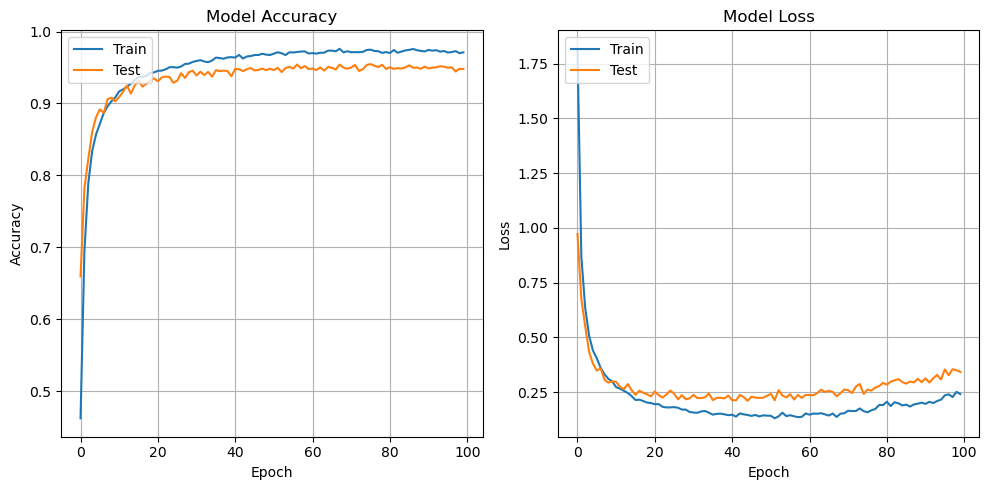

In [16]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.grid(True)
# Turn on the grid

plt.tight_layout()
plt.show()

In [19]:
loss, acc = sa4_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of Adam model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9451 - loss: 0.3535
Restored model, accuracy of Adam model: 94.79%


# **Nadam**

In [20]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate, BatchNormalization
from keras.models import Model
from keras.optimizers import Nadam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import tensorflow as tf

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa10_model = custom_model()
sa10_model.summary()


# Change the optimizer to  Nadam
opt = Nadam()

# Compile the model
sa10_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_26 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_26 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_26[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_26 (Dropout)          │ (None, 180, 128)          │               0 │ activation_26[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_27 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_26[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_27 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_27[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_27 (Dropout)          │ (None, 180, 128)          │               0 │ activation_27[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_13              │ (None, 60, 128)           │               0 │ dropout_27[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_28 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_13[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_28 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_28[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_28 (Dropout)          │ (None, 60, 128)           │               0 │ activation_28[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_29 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_28[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_29 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_29[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_29 (Dropout)          │ (None, 60, 128)           │               0 │ activation_29[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_14              │ (None, 20, 128)           │               0 │ dropout_29[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_24 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model with the new settings
history = sa10_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 151s 443ms/step - accuracy: 0.3714 - loss: 2.9478 - val_accuracy: 0.7129 - val_loss: 0.9019
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 126s 387ms/step - accuracy: 0.7033 - loss: 0.8919 - val_accuracy: 0.7979 - val_loss: 0.6366
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 133s 407ms/step - accuracy: 0.7914 - loss: 0.6406 - val_accuracy: 0.8519 - val_loss: 0.4805
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 133s 407ms/step - accuracy: 0.8364 - loss: 0.5134 - val_accuracy: 0.8610 - val_loss: 0.4402
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 133s 407ms/step - accuracy: 0.8624 - loss: 0.4311 - val_accuracy: 0.8897 - val_loss: 0.3580
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 132s 406ms/step - accuracy: 0.8789 - loss: 0.3863 - val_accuracy: 0.8897 - val_loss: 0.3500
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 132s 405ms/step - accuracy: 0.8939 - loss: 0.3399 - val_accuracy: 0.9028 - val_loss: 0.3203
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 131s 401ms/step - accuracy: 

Epoch 50/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 134s 412ms/step - accuracy: 0.9735 - loss: 0.1374 - val_accuracy: 0.9475 - val_loss: 0.2402
Epoch 51/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 414ms/step - accuracy: 0.9755 - loss: 0.1292 - val_accuracy: 0.9471 - val_loss: 0.2387
Epoch 52/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 414ms/step - accuracy: 0.9730 - loss: 0.1454 - val_accuracy: 0.9448 - val_loss: 0.2609
Epoch 53/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 413ms/step - accuracy: 0.9748 - loss: 0.1343 - val_accuracy: 0.9509 - val_loss: 0.2317
Epoch 54/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 413ms/step - accuracy: 0.9733 - loss: 0.1419 - val_accuracy: 0.9512 - val_loss: 0.2170
Epoch 55/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 413ms/step - accuracy: 0.9763 - loss: 0.1287 - val_accuracy: 0.9505 - val_loss: 0.2310
Epoch 56/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 415ms/step - accuracy: 0.9760 - loss: 0.1323 - val_accuracy: 0.9495 - val_loss: 0.2457
Epoch 57/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 415ms/step - ac

Epoch 99/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 139s 427ms/step - accuracy: 0.9745 - loss: 0.2251 - val_accuracy: 0.9493 - val_loss: 0.3296
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 140s 429ms/step - accuracy: 0.9736 - loss: 0.2217 - val_accuracy: 0.9526 - val_loss: 0.3205


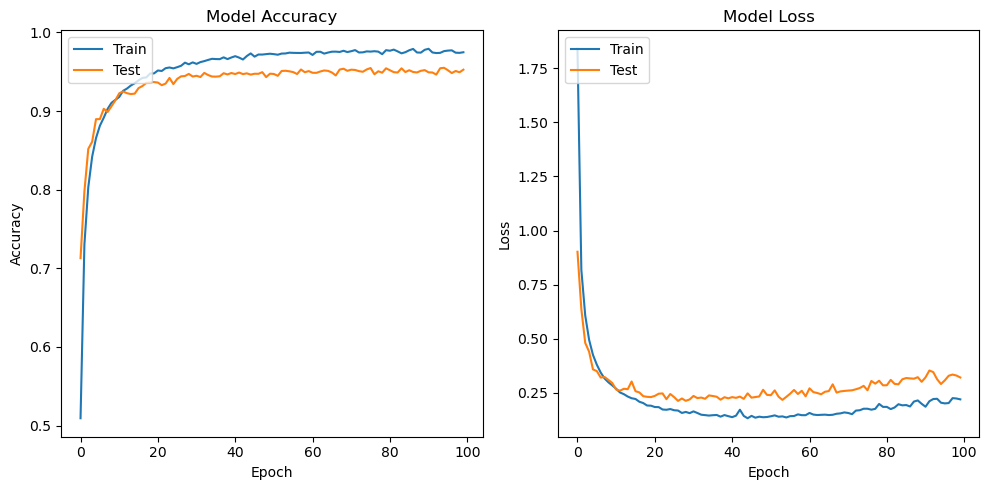

In [23]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')



# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.tight_layout()
plt.show()

In [24]:
loss, acc = sa10_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of Nadam model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9518 - loss: 0.3208
Restored model, accuracy of Nadam model: 95.26%


# RMSprop()

In [25]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2
from keras.optimizers import Nadam

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa3_model = custom_model()
sa3_model.summary()



# Change the optimizer to  RMSprop
opt = RMSprop()

# Compile the model
sa3_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_34 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_34 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_34[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_34 (Dropout)          │ (None, 180, 128)          │               0 │ activation_34[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_35 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_34[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_35 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_35[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_35 (Dropout)          │ (None, 180, 128)          │               0 │ activation_35[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_17              │ (None, 60, 128)           │               0 │ dropout_35[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_36 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_17[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_36 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_36[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_36 (Dropout)          │ (None, 60, 128)           │               0 │ activation_36[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_37 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_36[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_37 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_37[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_37 (Dropout)          │ (None, 60, 128)           │               0 │ activation_37[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_18              │ (None, 20, 128)           │               0 │ dropout_37[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_32 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model with the new settings
history = sa3_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 188s 564ms/step - accuracy: 0.2767 - loss: 2.8556 - val_accuracy: 0.4393 - val_loss: 1.4939
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 176s 539ms/step - accuracy: 0.5585 - loss: 1.2124 - val_accuracy: 0.6744 - val_loss: 0.9053
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 143s 439ms/step - accuracy: 0.6726 - loss: 0.9345 - val_accuracy: 0.6968 - val_loss: 0.8423
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 146s 449ms/step - accuracy: 0.7331 - loss: 0.7926 - val_accuracy: 0.7115 - val_loss: 0.8523
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 145s 444ms/step - accuracy: 0.7730 - loss: 0.6875 - val_accuracy: 0.7500 - val_loss: 0.7411
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 144s 442ms/step - accuracy: 0.8020 - loss: 0.6147 - val_accuracy: 0.8232 - val_loss: 0.5826
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 145s 444ms/step - accuracy: 0.8239 - loss: 0.5507 - val_accuracy: 0.8414 - val_loss: 0.5080
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 146s 447ms/step - accuracy: 

Epoch 50/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 149s 457ms/step - accuracy: 0.9654 - loss: 0.1486 - val_accuracy: 0.9488 - val_loss: 0.2188
Epoch 51/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 151s 463ms/step - accuracy: 0.9671 - loss: 0.1417 - val_accuracy: 0.9475 - val_loss: 0.2193
Epoch 52/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 160s 492ms/step - accuracy: 0.9665 - loss: 0.1435 - val_accuracy: 0.9471 - val_loss: 0.2267
Epoch 53/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 164s 503ms/step - accuracy: 0.9679 - loss: 0.1384 - val_accuracy: 0.9493 - val_loss: 0.2220
Epoch 54/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 154s 472ms/step - accuracy: 0.9700 - loss: 0.1321 - val_accuracy: 0.9483 - val_loss: 0.2175
Epoch 55/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 155s 475ms/step - accuracy: 0.9705 - loss: 0.1359 - val_accuracy: 0.9494 - val_loss: 0.2301
Epoch 56/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 194s 595ms/step - accuracy: 0.9676 - loss: 0.1414 - val_accuracy: 0.9493 - val_loss: 0.2211
Epoch 57/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 188s 576ms/step - ac

Epoch 99/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 160s 492ms/step - accuracy: 0.9789 - loss: 0.1074 - val_accuracy: 0.9524 - val_loss: 0.2269
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 162s 497ms/step - accuracy: 0.9763 - loss: 0.1100 - val_accuracy: 0.9500 - val_loss: 0.2463


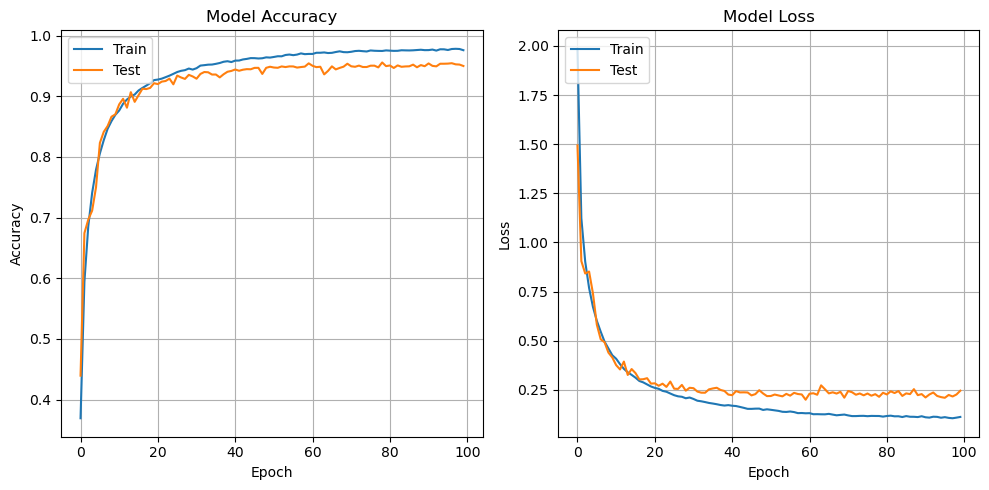

In [27]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
loss, acc = sa3_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of RMSprop model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9518 - loss: 0.2411
Restored model, accuracy of RMSprop model: 95.00%


# **Adamax()**

In [29]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import Adamax
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa1_model = custom_model()
sa1_model.summary()



# Change the optimizer to Adamax
opt = Adamax()

# Compile the model
sa1_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_42 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_42 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_42[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_42 (Dropout)          │ (None, 180, 128)          │               0 │ activation_42[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_43 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_42[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_43 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_43[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_43 (Dropout)          │ (None, 180, 128)          │               0 │ activation_43[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_21              │ (None, 60, 128)           │               0 │ dropout_43[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_44 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_21[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_44 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_44[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_44 (Dropout)          │ (None, 60, 128)           │               0 │ activation_44[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_45 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_44[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_45 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_45[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_45 (Dropout)          │ (None, 60, 128)           │               0 │ activation_45[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_22              │ (None, 20, 128)           │               0 │ dropout_45[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_40 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model with the new settings
history = sa1_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 180s 531ms/step - accuracy: 0.3245 - loss: 3.2969 - val_accuracy: 0.5653 - val_loss: 1.4983
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 173s 532ms/step - accuracy: 0.5954 - loss: 1.3866 - val_accuracy: 0.6594 - val_loss: 1.1753
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 172s 527ms/step - accuracy: 0.6727 - loss: 1.0964 - val_accuracy: 0.7248 - val_loss: 0.9328
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 171s 524ms/step - accuracy: 0.7219 - loss: 0.9321 - val_accuracy: 0.7349 - val_loss: 0.8762
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 167s 511ms/step - accuracy: 0.7567 - loss: 0.8116 - val_accuracy: 0.8049 - val_loss: 0.6909
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 173s 531ms/step - accuracy: 0.7951 - loss: 0.6974 - val_accuracy: 0.8204 - val_loss: 0.6299
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 173s 531ms/step - accuracy: 0.8158 - loss: 0.6326 - val_accuracy: 0.8403 - val_loss: 0.5573
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 172s 528ms/step - accuracy: 

Epoch 50/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 174s 535ms/step - accuracy: 0.9716 - loss: 0.1059 - val_accuracy: 0.9483 - val_loss: 0.1856
Epoch 51/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 175s 536ms/step - accuracy: 0.9712 - loss: 0.1065 - val_accuracy: 0.9519 - val_loss: 0.1814
Epoch 52/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 175s 537ms/step - accuracy: 0.9715 - loss: 0.1014 - val_accuracy: 0.9497 - val_loss: 0.1832
Epoch 53/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 174s 533ms/step - accuracy: 0.9721 - loss: 0.1042 - val_accuracy: 0.9513 - val_loss: 0.1785
Epoch 54/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 175s 536ms/step - accuracy: 0.9726 - loss: 0.0996 - val_accuracy: 0.9507 - val_loss: 0.1880
Epoch 55/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 175s 537ms/step - accuracy: 0.9724 - loss: 0.0991 - val_accuracy: 0.9476 - val_loss: 0.1931
Epoch 56/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 175s 537ms/step - accuracy: 0.9733 - loss: 0.0988 - val_accuracy: 0.9514 - val_loss: 0.1814
Epoch 57/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 176s 540ms/step - ac

Epoch 99/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 191s 586ms/step - accuracy: 0.9882 - loss: 0.0502 - val_accuracy: 0.9592 - val_loss: 0.1740
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 189s 580ms/step - accuracy: 0.9872 - loss: 0.0509 - val_accuracy: 0.9612 - val_loss: 0.1658


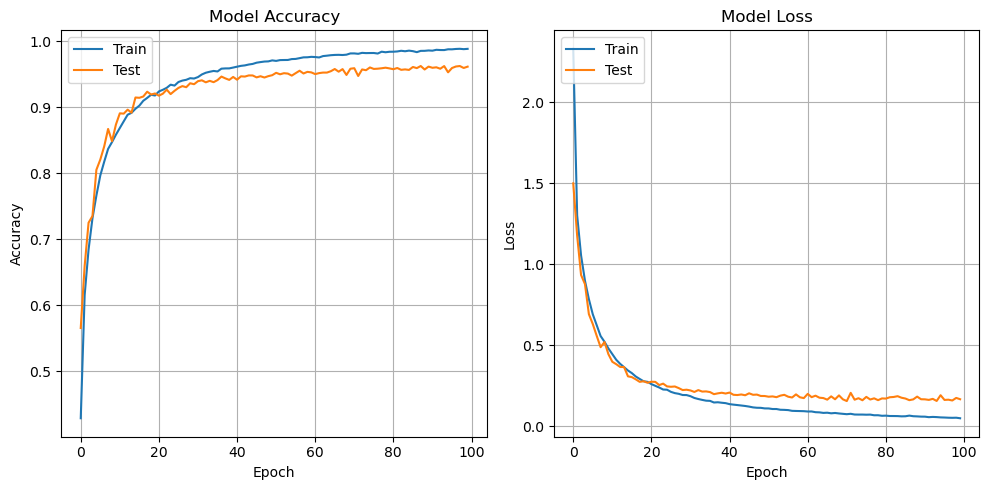

In [31]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
loss, acc = sa1_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of Adamax model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9626 - loss: 0.1667
Restored model, accuracy of Adamax model: 96.12%


# **Adagrad()**

In [33]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import Adagrad
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa6_model = custom_model()
sa6_model.summary()



# Change the optimizer to Adagrad
opt = Adagrad()

# Compile the model
sa6_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_50 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_50 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_50[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_50 (Dropout)          │ (None, 180, 128)          │               0 │ activation_50[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_51 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_50[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_51 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_51[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_51 (Dropout)          │ (None, 180, 128)          │               0 │ activation_51[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_25              │ (None, 60, 128)           │               0 │ dropout_51[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_52 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_25[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_52 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_52[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_52 (Dropout)          │ (None, 60, 128)           │               0 │ activation_52[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_53 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_52[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_53 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_53[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_53 (Dropout)          │ (None, 60, 128)           │               0 │ activation_53[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_26              │ (None, 20, 128)           │               0 │ dropout_53[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_48 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the model with the new settings
history = sa6_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 179s 538ms/step - accuracy: 0.1473 - loss: 6.0716 - val_accuracy: 0.1531 - val_loss: 5.8987
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 174s 533ms/step - accuracy: 0.1702 - loss: 5.8517 - val_accuracy: 0.1865 - val_loss: 5.7218
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 174s 535ms/step - accuracy: 0.1939 - loss: 5.6800 - val_accuracy: 0.2214 - val_loss: 5.5588
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 174s 534ms/step - accuracy: 0.2129 - loss: 5.5211 - val_accuracy: 0.2278 - val_loss: 5.4034
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 175s 536ms/step - accuracy: 0.2253 - loss: 5.3666 - val_accuracy: 0.2593 - val_loss: 5.2491
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 175s 537ms/step - accuracy: 0.2463 - loss: 5.2127 - val_accuracy: 0.2496 - val_loss: 5.0918
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 175s 536ms/step - accuracy: 0.2505 - loss: 5.0550 - val_accuracy: 0.2682 - val_loss: 4.9224
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 174s 534ms/step - accuracy: 

Epoch 50/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 185s 568ms/step - accuracy: 0.6240 - loss: 1.6929 - val_accuracy: 0.6517 - val_loss: 1.6132
Epoch 51/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 186s 570ms/step - accuracy: 0.6344 - loss: 1.6595 - val_accuracy: 0.6700 - val_loss: 1.5690
Epoch 52/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 185s 569ms/step - accuracy: 0.6336 - loss: 1.6302 - val_accuracy: 0.6728 - val_loss: 1.5425
Epoch 53/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 187s 572ms/step - accuracy: 0.6374 - loss: 1.6051 - val_accuracy: 0.6685 - val_loss: 1.5264
Epoch 54/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 187s 573ms/step - accuracy: 0.6384 - loss: 1.5854 - val_accuracy: 0.6691 - val_loss: 1.5074
Epoch 55/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 187s 573ms/step - accuracy: 0.6463 - loss: 1.5495 - val_accuracy: 0.6660 - val_loss: 1.4938
Epoch 56/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 188s 576ms/step - accuracy: 0.6475 - loss: 1.5263 - val_accuracy: 0.6888 - val_loss: 1.4449
Epoch 57/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 187s 574ms/step - ac

Epoch 99/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 205s 628ms/step - accuracy: 0.7229 - loss: 0.9997 - val_accuracy: 0.7581 - val_loss: 0.9256
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 206s 633ms/step - accuracy: 0.7204 - loss: 0.9939 - val_accuracy: 0.7578 - val_loss: 0.9202


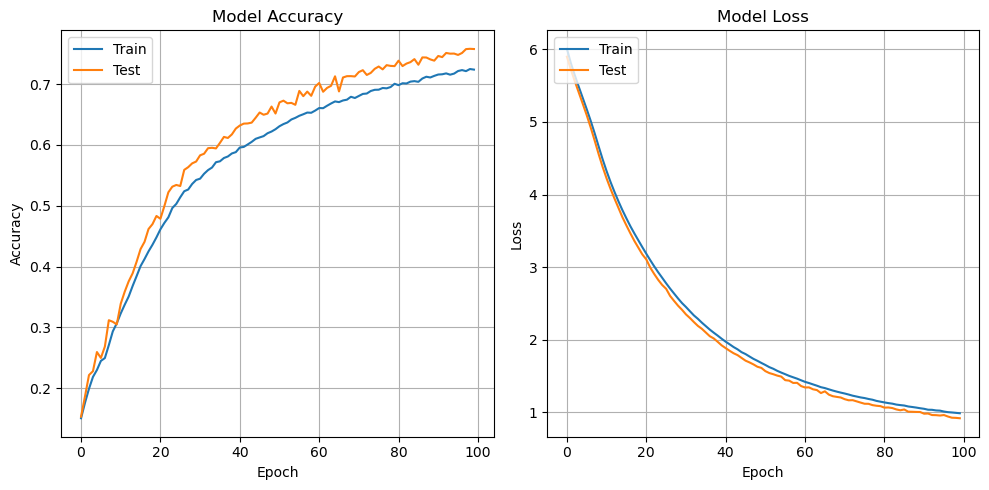

In [35]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
loss, acc = sa6_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of Adagrad model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.7549 - loss: 0.9271
Restored model, accuracy of Adagrad model: 75.78%


# **Adadelta()**

In [37]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa7_model = custom_model()
sa7_model.summary()


# Change the optimizer to Adadelta
opt = Adadelta()

# Compile the model
sa7_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_58 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_58 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_58[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_58 (Dropout)          │ (None, 180, 128)          │               0 │ activation_58[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_59 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_58[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_59 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_59[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_59 (Dropout)          │ (None, 180, 128)          │               0 │ activation_59[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_29              │ (None, 60, 128)           │               0 │ dropout_59[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_60 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_29[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_60 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_60[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_60 (Dropout)          │ (None, 60, 128)           │               0 │ activation_60[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_61 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_60[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_61 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_61[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_61 (Dropout)          │ (None, 60, 128)           │               0 │ activation_61[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_30              │ (None, 20, 128)           │               0 │ dropout_61[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_56 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the model with the new settings
history = sa7_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 253s 759ms/step - accuracy: 0.1340 - loss: 6.1601 - val_accuracy: 0.1408 - val_loss: 6.1077
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 248s 760ms/step - accuracy: 0.1366 - loss: 6.0937 - val_accuracy: 0.1378 - val_loss: 6.0457
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 248s 760ms/step - accuracy: 0.1380 - loss: 6.0309 - val_accuracy: 0.1595 - val_loss: 5.9868
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 248s 761ms/step - accuracy: 0.1391 - loss: 5.9732 - val_accuracy: 0.1861 - val_loss: 5.9308
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 250s 768ms/step - accuracy: 0.1425 - loss: 5.9176 - val_accuracy: 0.1948 - val_loss: 5.8771
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 249s 764ms/step - accuracy: 0.1463 - loss: 5.8642 - val_accuracy: 0.1724 - val_loss: 5.8253
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 249s 763ms/step - accuracy: 0.1538 - loss: 5.8132 - val_accuracy: 0.1685 - val_loss: 5.7751
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 248s 762ms/step - accuracy: 

Epoch 50/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 265s 813ms/step - accuracy: 0.2844 - loss: 4.1343 - val_accuracy: 0.2871 - val_loss: 4.0953
Epoch 51/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 267s 818ms/step - accuracy: 0.2853 - loss: 4.0950 - val_accuracy: 0.2828 - val_loss: 4.0585
Epoch 52/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 266s 816ms/step - accuracy: 0.2884 - loss: 4.0584 - val_accuracy: 0.2823 - val_loss: 4.0225
Epoch 53/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 265s 814ms/step - accuracy: 0.2879 - loss: 4.0239 - val_accuracy: 0.2843 - val_loss: 3.9877
Epoch 54/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 264s 810ms/step - accuracy: 0.2907 - loss: 3.9907 - val_accuracy: 0.2872 - val_loss: 3.9535
Epoch 55/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 266s 817ms/step - accuracy: 0.2921 - loss: 3.9582 - val_accuracy: 0.2876 - val_loss: 3.9211
Epoch 56/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 266s 815ms/step - accuracy: 0.2941 - loss: 3.9214 - val_accuracy: 0.2935 - val_loss: 3.8877
Epoch 57/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 264s 811ms/step - ac

Epoch 99/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 288s 884ms/step - accuracy: 0.3885 - loss: 2.9438 - val_accuracy: 0.4033 - val_loss: 2.8945
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 288s 884ms/step - accuracy: 0.3931 - loss: 2.9294 - val_accuracy: 0.3993 - val_loss: 2.8815


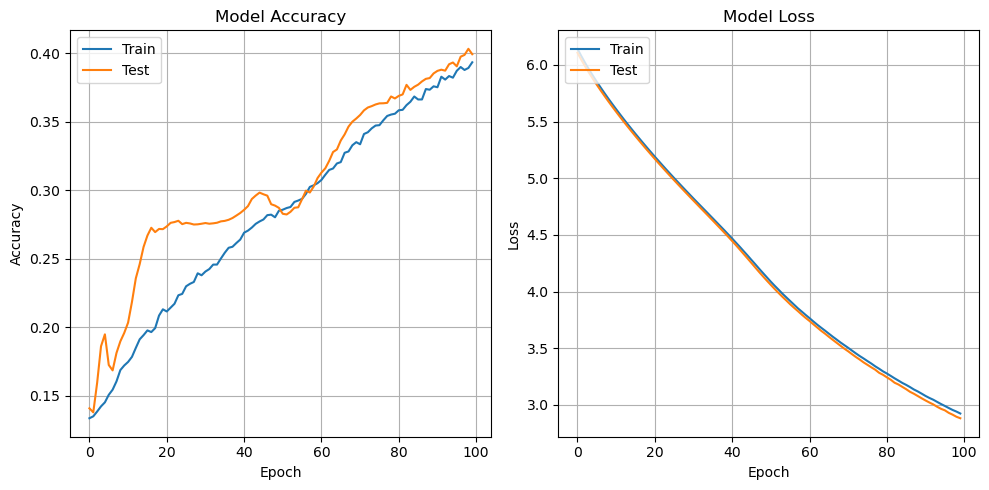

In [39]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
loss, acc = sa7_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of Adadelta model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 70s 160ms/step - accuracy: 0.4016 - loss: 2.8885
Restored model, accuracy of Adadelta model: 39.93%


# **SGD()**

In [41]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa8_model = custom_model()
sa8_model.summary()


# Change the optimizer to SGD
opt = SGD()

# Compile the model
sa8_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_66 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_66 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_66[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_66 (Dropout)          │ (None, 180, 128)          │               0 │ activation_66[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_67 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_66[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_67 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_67[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_67 (Dropout)          │ (None, 180, 128)          │               0 │ activation_67[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_33              │ (None, 60, 128)           │               0 │ dropout_67[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_68 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_33[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_68 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_68[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_68 (Dropout)          │ (None, 60, 128)           │               0 │ activation_68[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_69 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_68[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_69 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_69[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_69 (Dropout)          │ (None, 60, 128)           │               0 │ activation_69[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_34              │ (None, 20, 128)           │               0 │ dropout_69[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_64 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the model with the new settings
history = sa8_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.1561 - loss: 5.9803 - val_accuracy: 0.2436 - val_loss: 5.5429
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.2279 - loss: 5.4178 - val_accuracy: 0.2443 - val_loss: 5.0394
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.2646 - loss: 4.8999 - val_accuracy: 0.3230 - val_loss: 4.4443
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.3218 - loss: 4.3401 - val_accuracy: 0.3670 - val_loss: 3.9674
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.3616 - loss: 3.9046 - val_accuracy: 0.3981 - val_loss: 3.6084
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.4055 - loss: 3.5333 - val_accuracy: 0.4402 - val_loss: 3.2792
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.4387 - loss: 3.2112 - val_accuracy: 0.4838 - val_loss: 2.9446
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.4720 - loss: 2.9313 - 

326/326 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.8969 - loss: 0.3427 - val_accuracy: 0.8994 - val_loss: 0.3384
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.9014 - loss: 0.3371 - val_accuracy: 0.9087 - val_loss: 0.3183


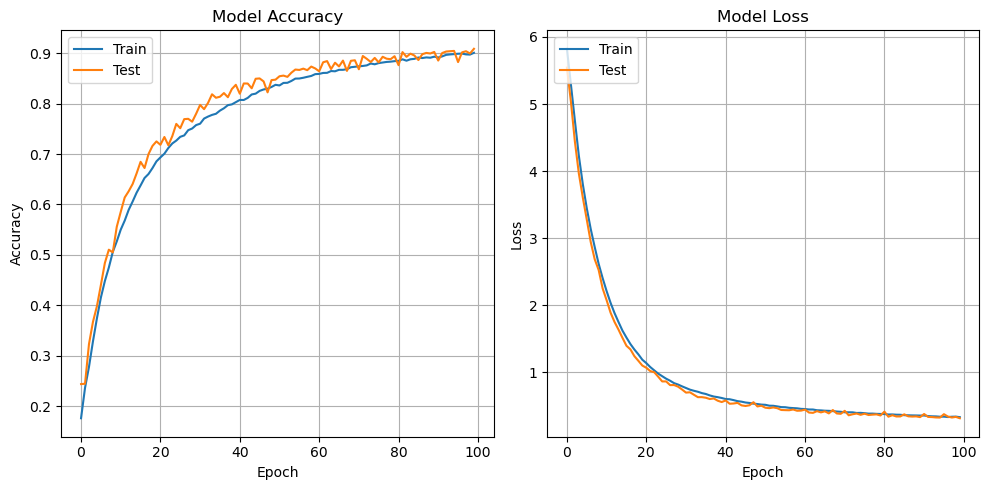

In [43]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
loss, acc = sa8_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of SGD model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 70s 160ms/step - accuracy: 0.9093 - loss: 0.3183
Restored model, accuracy of SGD model: 90.87%
